## Importing the relevant libraries

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, gc, joblib
warnings.filterwarnings('ignore')
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from scipy.stats import probplot
from sklearn.linear_model import LogisticRegression, Lasso, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import ADASYN
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif, RFE, SequentialFeatureSelector
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Loading the dataset

In [2]:
df = pd.read_csv('Application_Data.csv')
df.head()

Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0       5008806          M                1             1               0   
1       5008808          F                0             1               0   
2       5008809          F                0             1               0   
3       5008810          F                0             1               0   
4       5008811          F                0             1               0   

   Total_Income                                        Income_Type  \
0        112500  Working                                       ...   
1        270000  Commercial associate                          ...   
2        270000  Commercial associate                          ...   
3        270000  Commercial associate                          ...   
4        270000  Commercial associate                          ...   

                                      Education_Type  \
0  Secondary / secondary special                 ...   
1  Secondary / secondary special                 ...   
2  Secondary / secondary special                 ...   
3  Secondary / secondary special                 ...   
4  Secondary / secondary special                 ...   

                                       Family_Status  \
0  Married                                       ...   
1  Single / not married                          ...   
2  Single / not married                          ...   
3  Single / not married                          ...   
4  Single / not married                          ...   

                                        Housing_Type  ...  Owned_Work_Phone  \
0  House / apartment                             ...  ...                 0   
1  House / apartment                             ...  ...                 0   
2  House / apartment                             ...  ...                 0   
3  House / apartment                             ...  ...                 0   
4  House / apartment                             ...  ...                 0   

   Owned_Phone  Owned_Email  \
0            0            0   
1            1            1   
2            1            1   
3            1            1   
4            1            1   

                                           Job_Title Total_Family_Members  \
0  Security staff                                ...                    2   
1  Sales staff                                   ...                    1   
2  Sales staff                                   ...                    1   
3  Sales staff                                   ...                    1   
4  Sales staff                                   ...                    1   

   Applicant_Age  Years_of_Working  Total_Bad_Debt  Total_Good_Debt  Status  
0             59                 4               0               30       1  
1             53                 9               0                5       1  
2             53                 9               0                5       1  
3             53                 9               0               27       1  
4             53                 9               0               39       1  

[5 rows x 21 columns]

In [3]:
df.shape

(25128, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [5]:
df.describe()

Applicant_ID     Owned_Car  Owned_Realty  Total_Children  Total_Income  \
count  2.512800e+04  25128.000000  25128.000000    25128.000000  2.512800e+04   
mean   5.078835e+06      0.418378      0.654927        0.509472  1.948365e+05   
std    4.194378e+04      0.493303      0.475402        0.762937  1.045211e+05   
min    5.008806e+06      0.000000      0.000000        0.000000  2.700000e+04   
25%    5.042226e+06      0.000000      0.000000        0.000000  1.350000e+05   
50%    5.079004e+06      0.000000      1.000000        0.000000  1.800000e+05   
75%    5.115603e+06      1.000000      1.000000        1.000000  2.250000e+05   
max    5.150487e+06      1.000000      1.000000        5.000000  1.575000e+06   

       Owned_Mobile_Phone  Owned_Work_Phone   Owned_Phone   Owned_Email  \
count             25128.0      25128.000000  25128.000000  25128.000000   
mean                  1.0          0.273758      0.292741      0.100684   
std                   0.0          0.445895      0.455030      0.300916   
min                   1.0          0.000000      0.000000      0.000000   
25%                   1.0          0.000000      0.000000      0.000000   
50%                   1.0          0.000000      0.000000      0.000000   
75%                   1.0          1.000000      1.000000      0.000000   
max                   1.0          1.000000      1.000000      1.000000   

       Total_Family_Members  Applicant_Age  Years_of_Working  Total_Bad_Debt  \
count          25128.000000   25128.000000      25128.000000    25128.000000   
mean               2.291309      40.995503          7.690903        0.333095   
std                0.928871       9.552832          6.415007        1.569448   
min                1.000000      21.000000          1.000000        0.000000   
25%                2.000000      33.000000          3.000000        0.000000   
50%                2.000000      40.000000          6.000000        0.000000   
75%                3.000000      48.000000         10.000000        0.000000   
max                7.000000      68.000000         44.000000       49.000000   

       Total_Good_Debt        Status  
count     25128.000000  25128.000000  
mean         21.057545      0.995185  
std          14.735347      0.069227  
min           1.000000      0.000000  
25%           9.000000      1.000000  
50%          18.000000      1.000000  
75%          31.000000      1.000000  
max          61.000000      1.000000

In [6]:
df.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [11]:
df.drop(df.columns[df.nunique() == 1][0],axis=1,inplace=True)

## Exploratory Data Analysis

Skewness of Applicant_ID: 0.055135529370843976
Kurtosis of Applicant_ID: -1.216680537780328


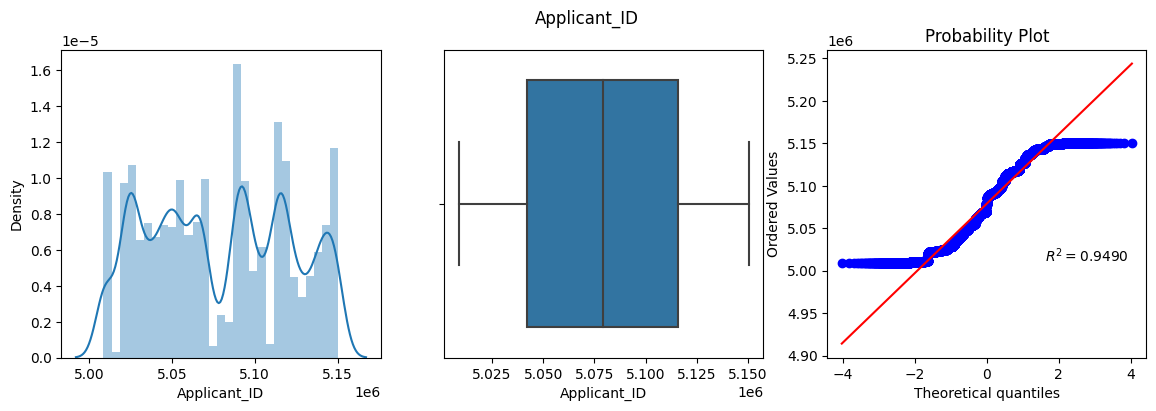

Skewness of Owned_Car: 0.3309472983422363
Kurtosis of Owned_Car: -1.8906243715503783


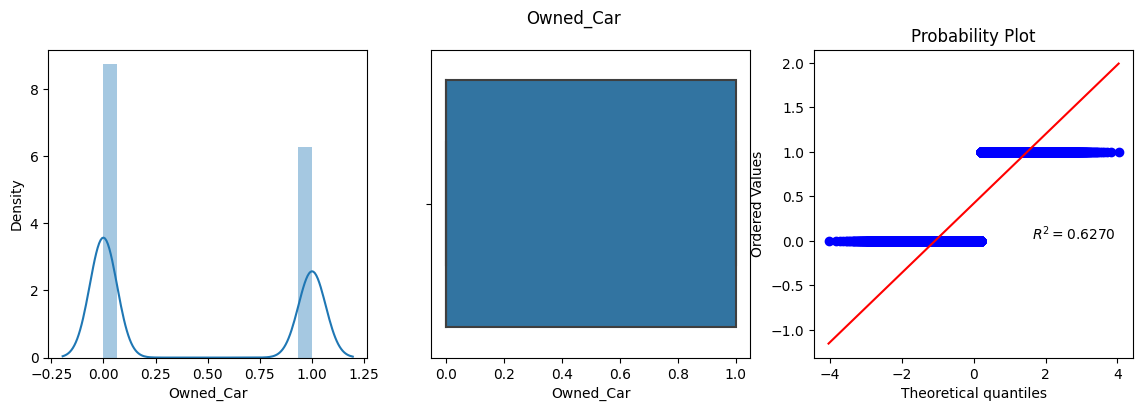

Skewness of Owned_Realty: -0.6518240762415578
Kurtosis of Owned_Realty: -1.5752507580921022


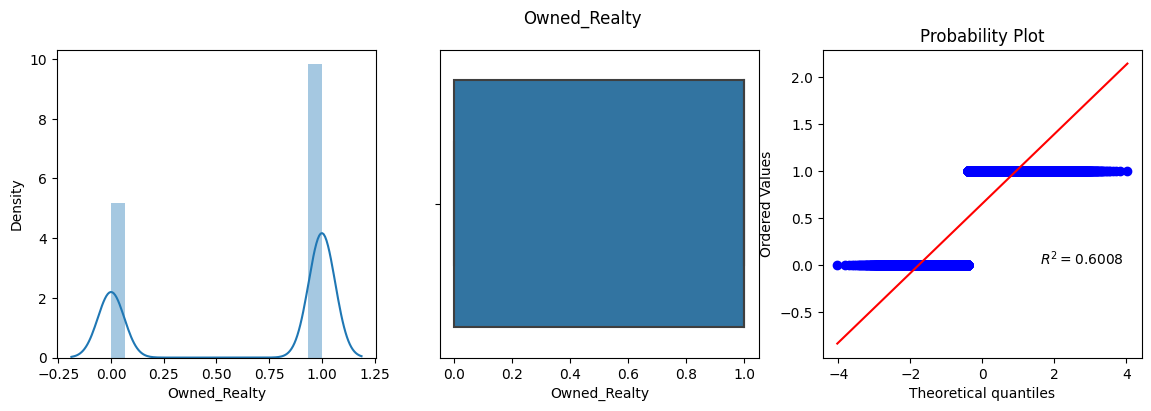

Skewness of Total_Children: 1.4772750155469205
Kurtosis of Total_Children: 2.0061118025602385


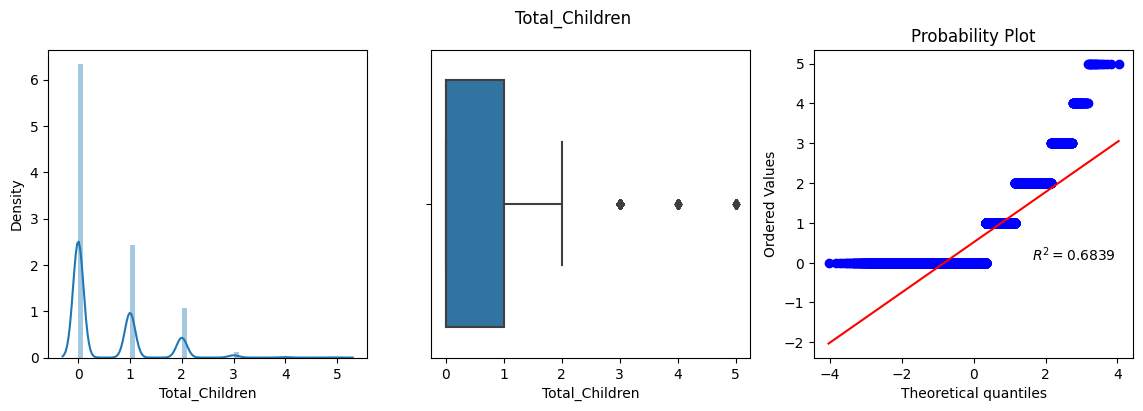

Skewness of Total_Income: 2.964037810898012
Kurtosis of Total_Income: 20.45120363499683


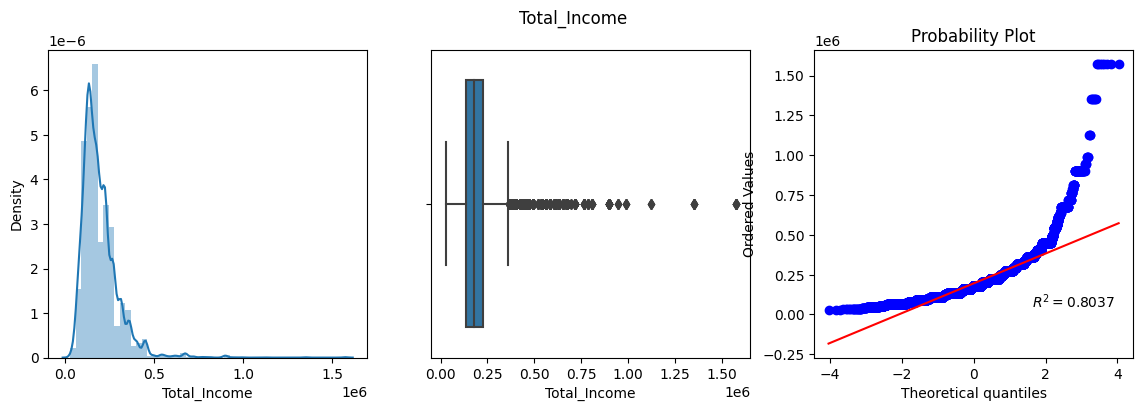

Skewness of Owned_Work_Phone: 1.0148554784818
Kurtosis of Owned_Work_Phone: -0.9701455804299215


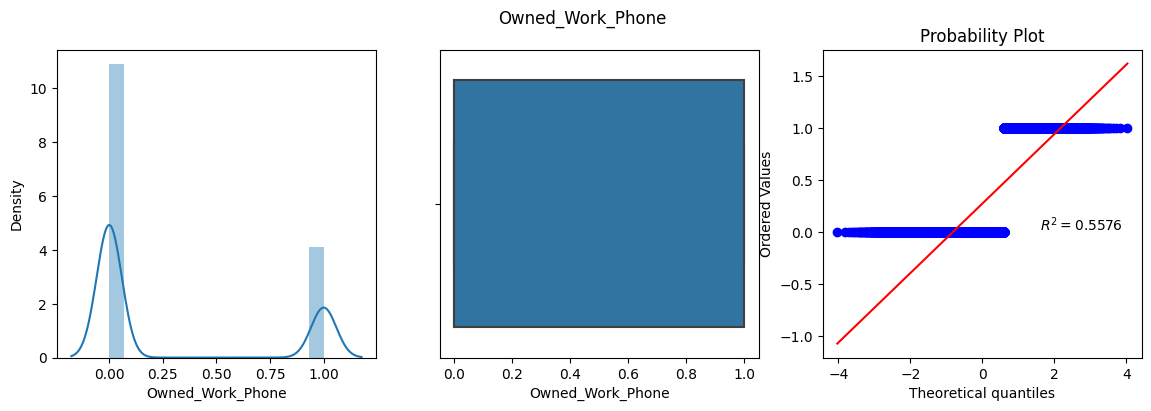

Skewness of Owned_Phone: 0.91104092159702
Kurtosis of Owned_Phone: -1.1700975764866877


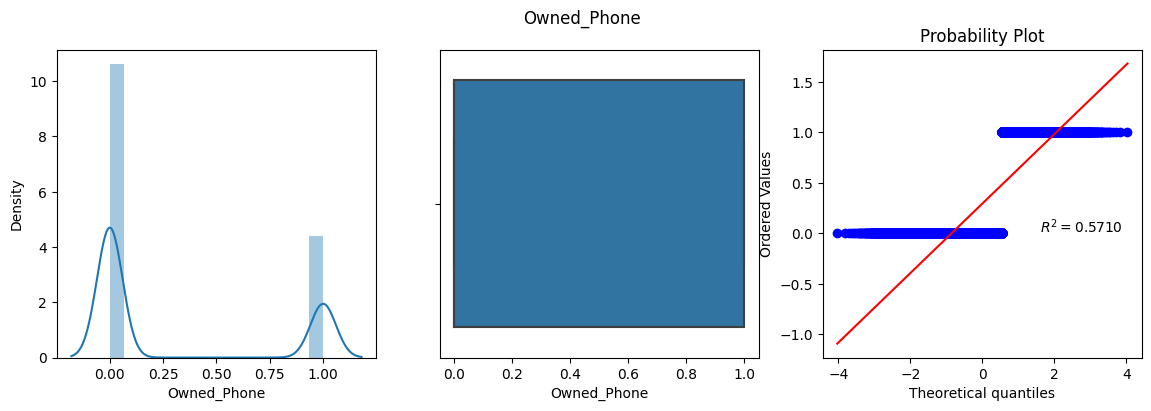

Skewness of Owned_Email: 2.6542067893840953
Kurtosis of Owned_Email: 5.045215235704062


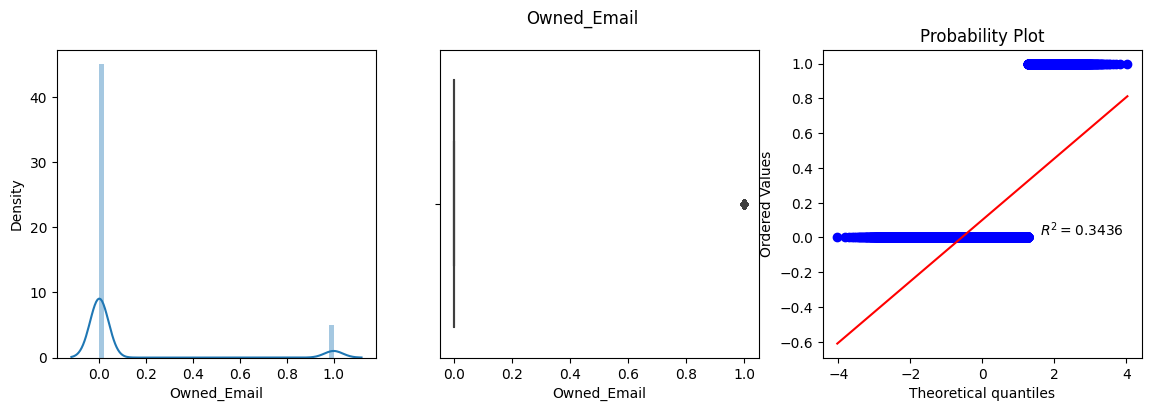

Skewness of Total_Family_Members: 0.7844887442337911
Kurtosis of Total_Family_Members: 0.75574803569299


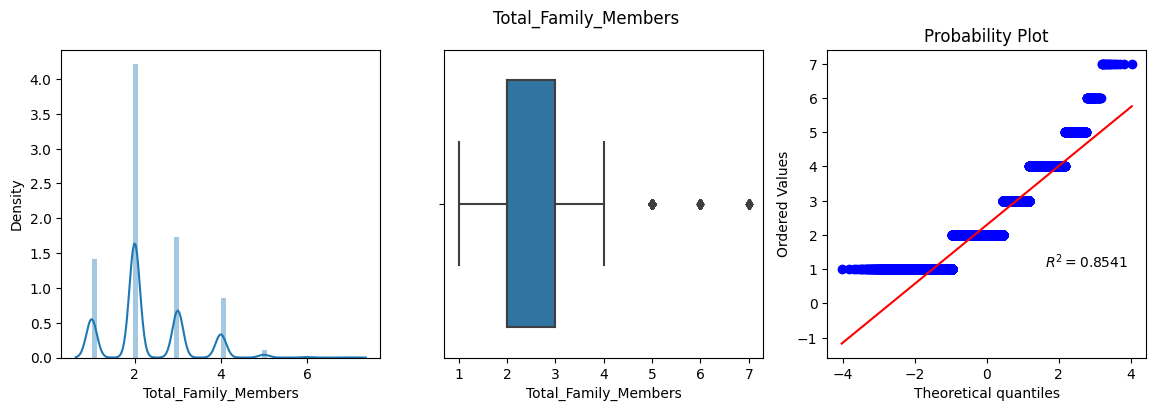

Skewness of Applicant_Age: 0.27145447040373916
Kurtosis of Applicant_Age: -0.7488972324886034


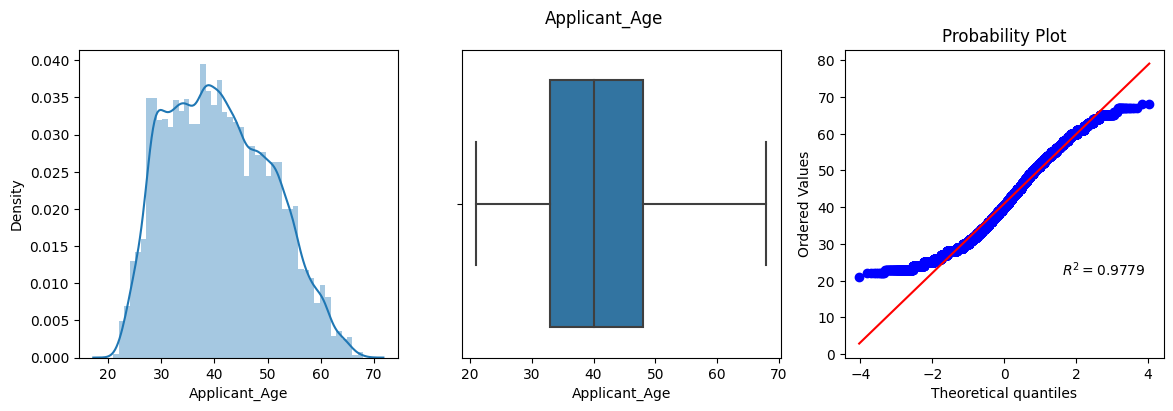

Skewness of Years_of_Working: 1.7242349362023368
Kurtosis of Years_of_Working: 3.580535822965504


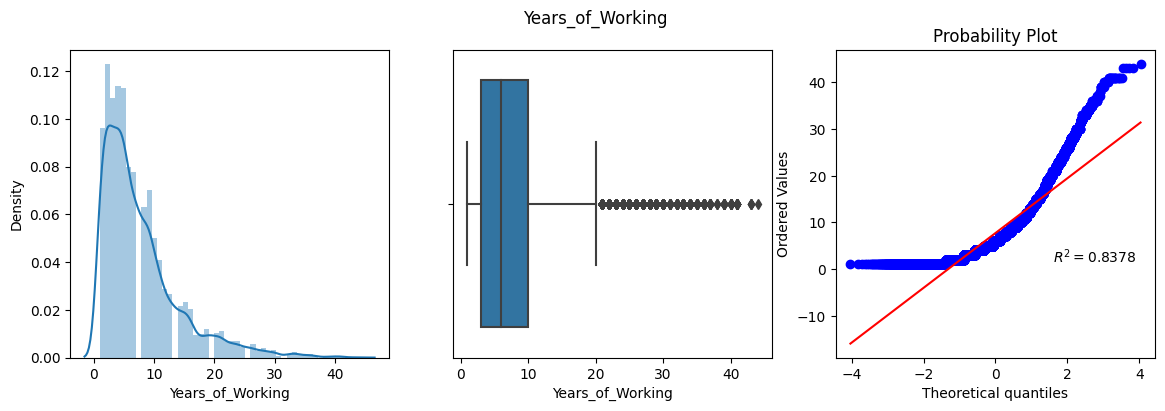

Skewness of Total_Bad_Debt: 12.432799215282186
Kurtosis of Total_Bad_Debt: 250.21761745884922


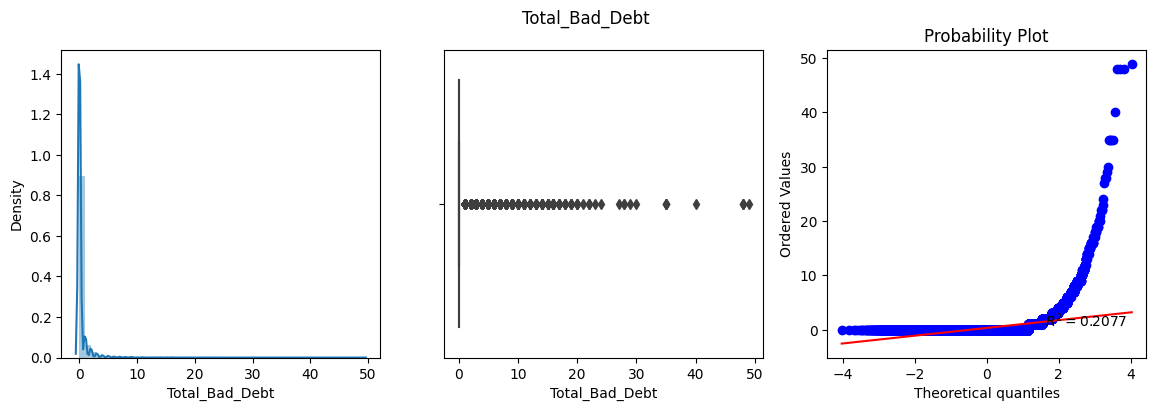

Skewness of Total_Good_Debt: 0.7382906800171972
Kurtosis of Total_Good_Debt: -0.3519465062784275


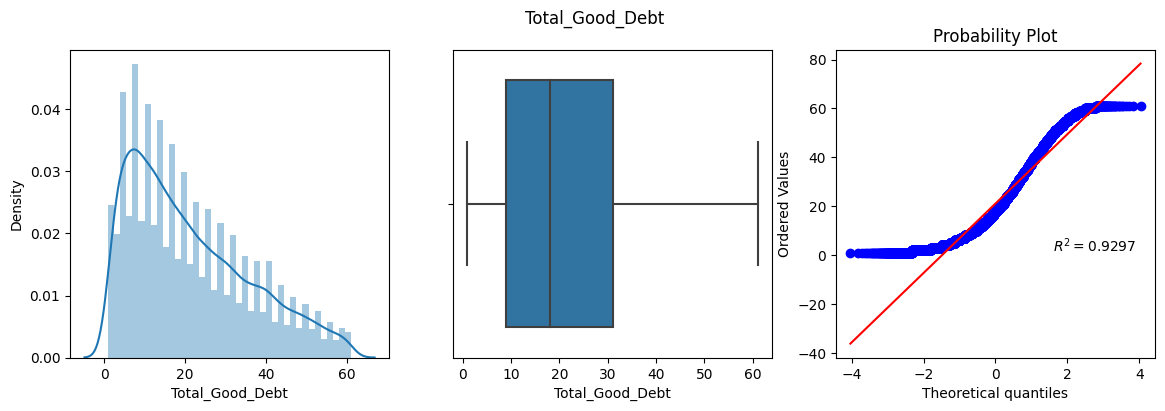

Skewness of Status: -14.307295290381374
Kurtosis of Status: 202.71483309749533


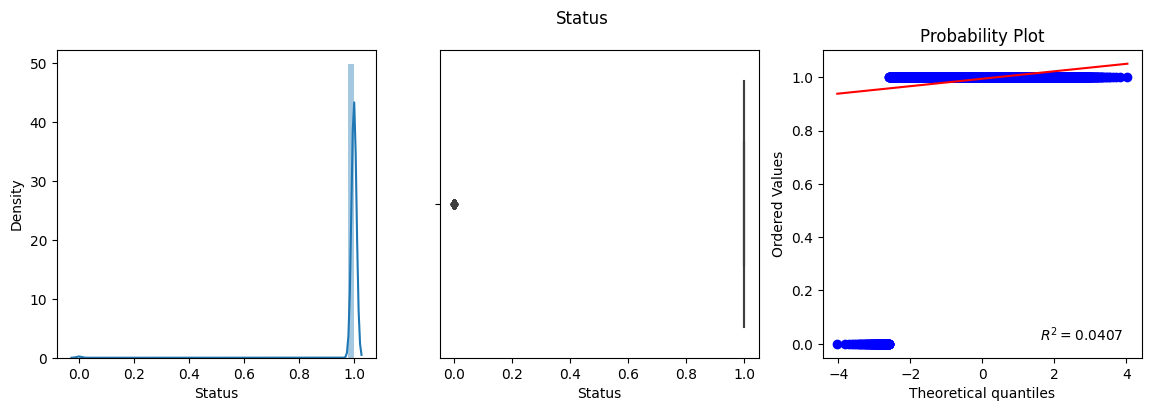

In [12]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect()

In [13]:
skewed_cols = ['Total_Children','Total_Income','Total_Family_Members','Years_of_Working','Total_Bad_Debt']

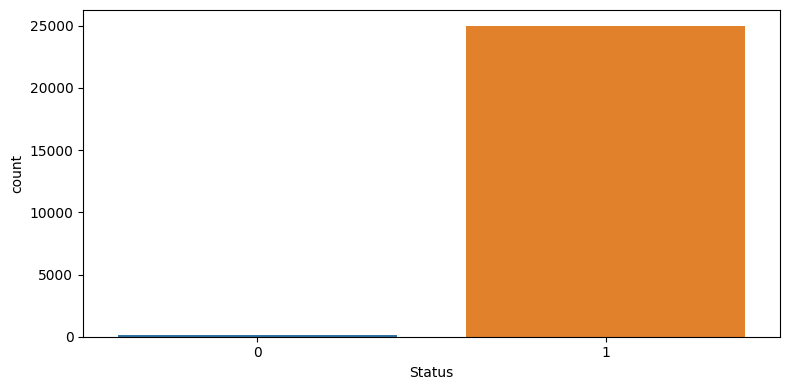

In [15]:
plt.figure(figsize=(8,4))
fig = sns.countplot(df['Status'])
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

There is a massive imbalance between the target label classes so this imbalance needs to be rectified before modeling.

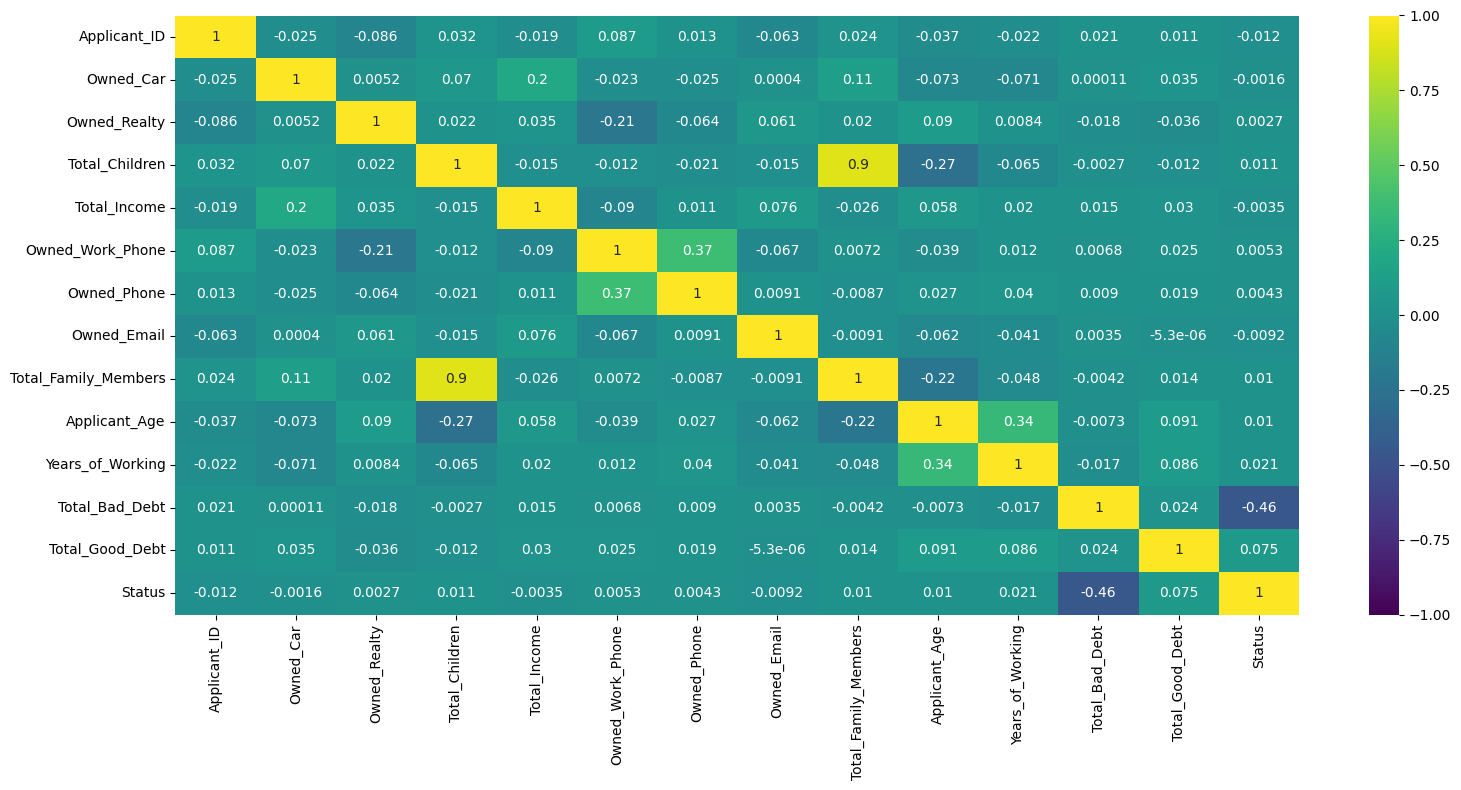

In [16]:
plt.figure(figsize=(16,8))
fig = sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0)
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

<Figure size 1600x800 with 0 Axes>

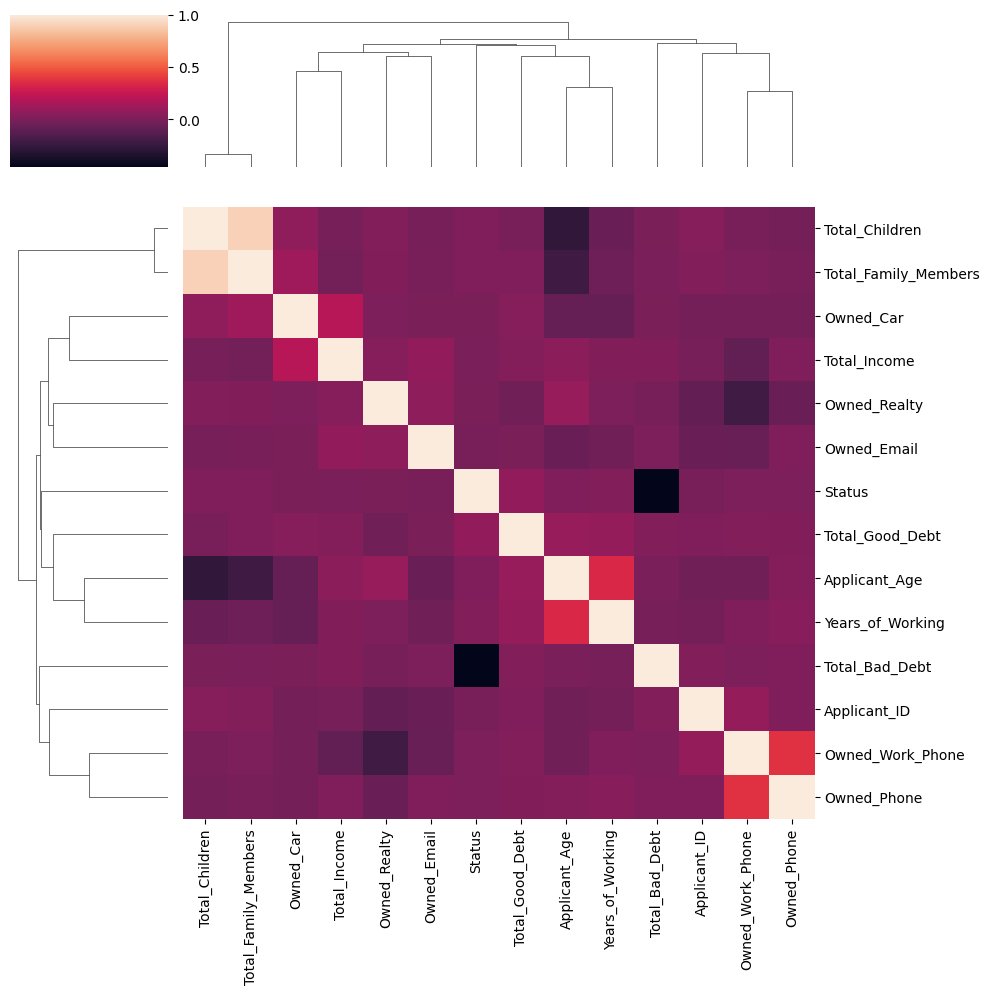

In [17]:
plt.figure(figsize=(16,8))
fig = sns.clustermap(df.corr())
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

## Feature Engineering

### Feature Transformation

In [18]:
def apply_transform(transformer,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f"{col} Before Transform")
    plt.show()
    col_tf = transformer.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f"{col} After Transform")
    plt.show()
    gc.collect();

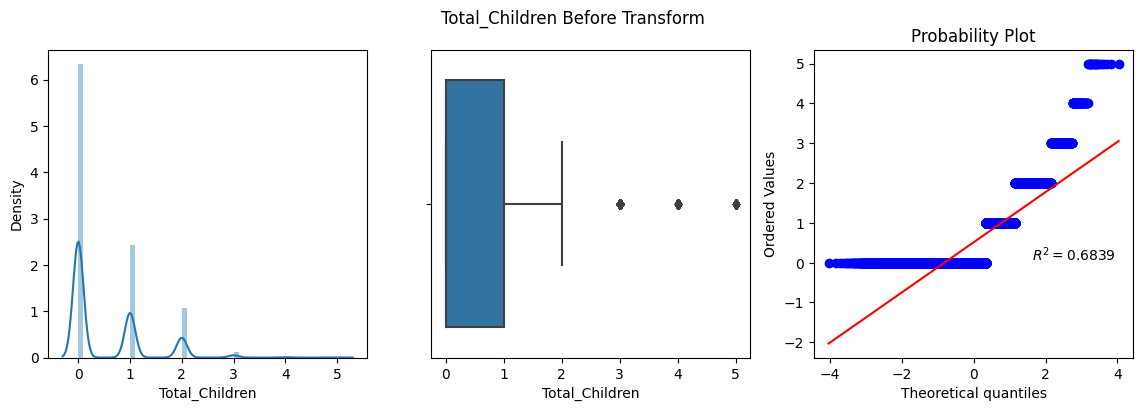

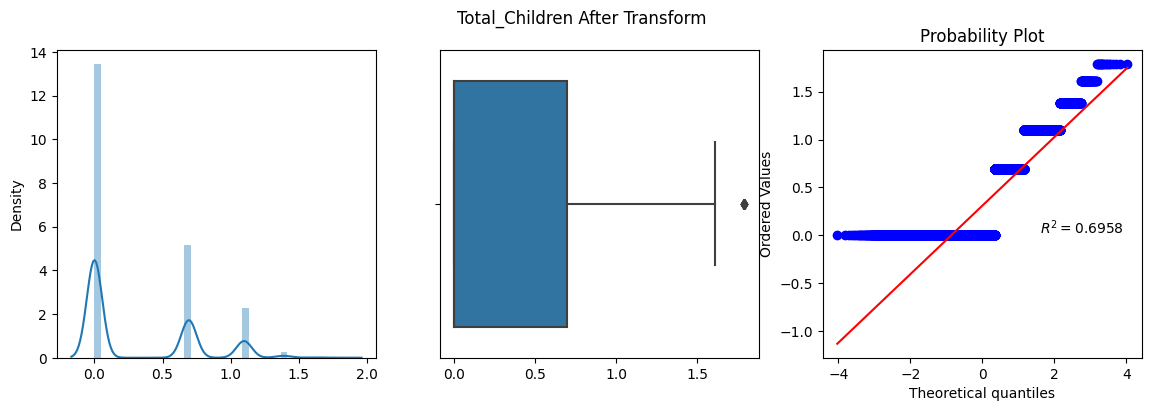

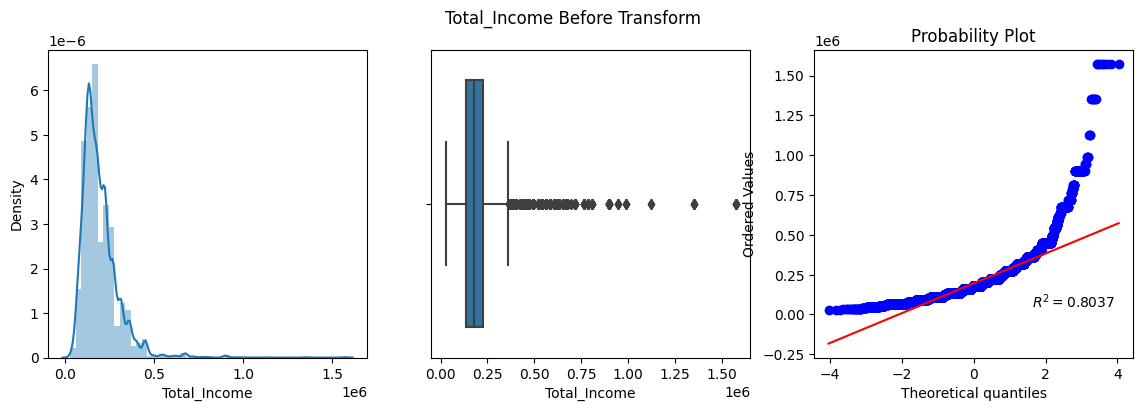

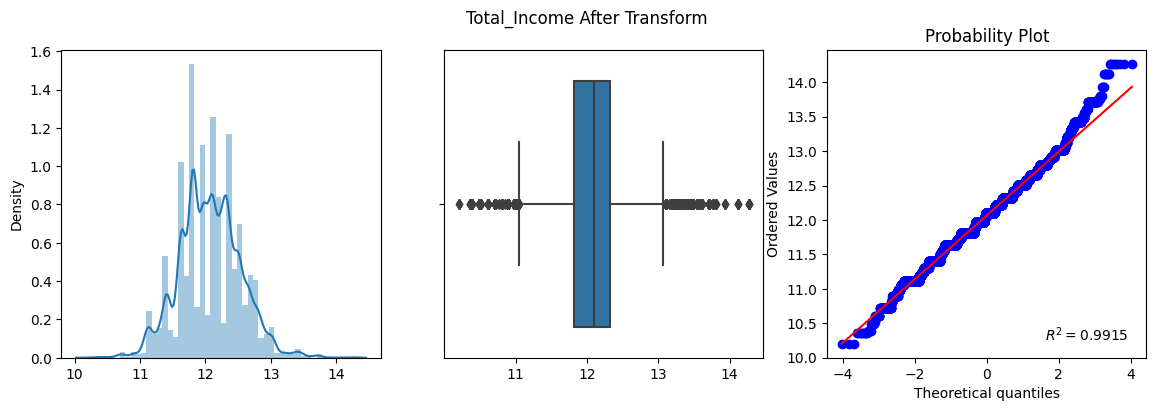

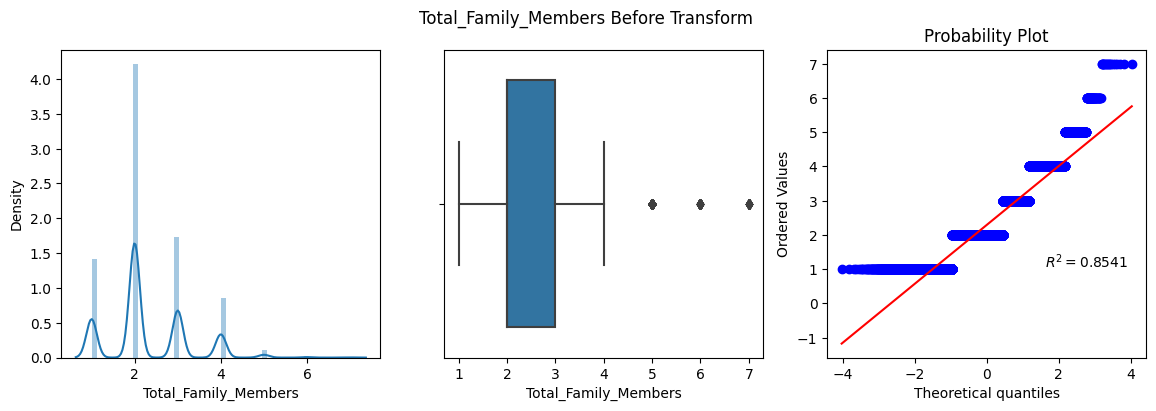

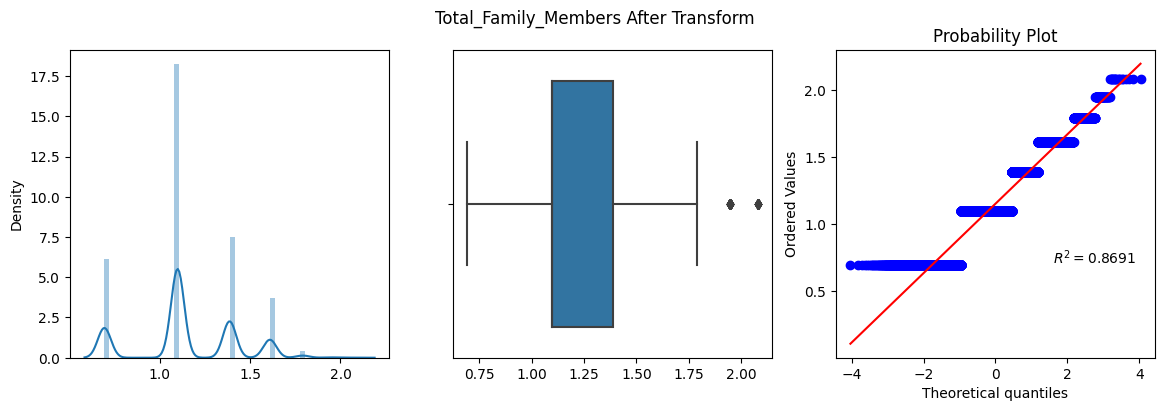

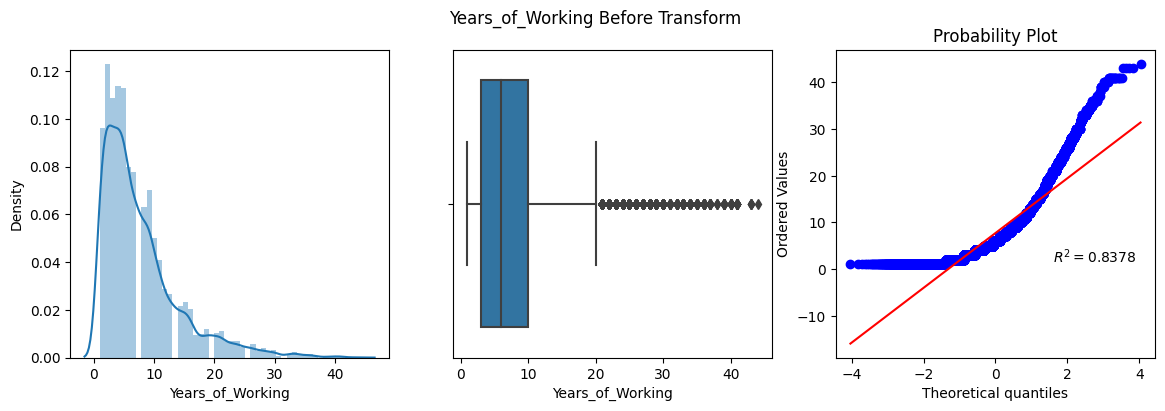

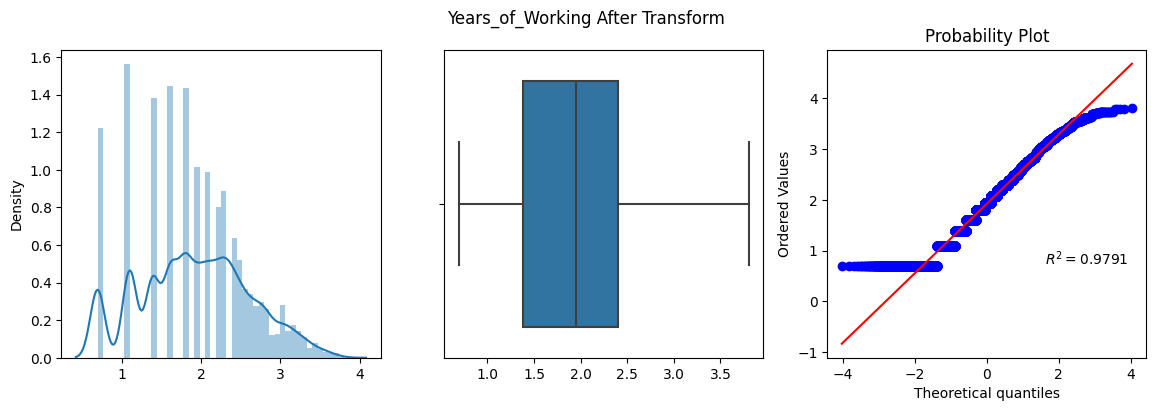

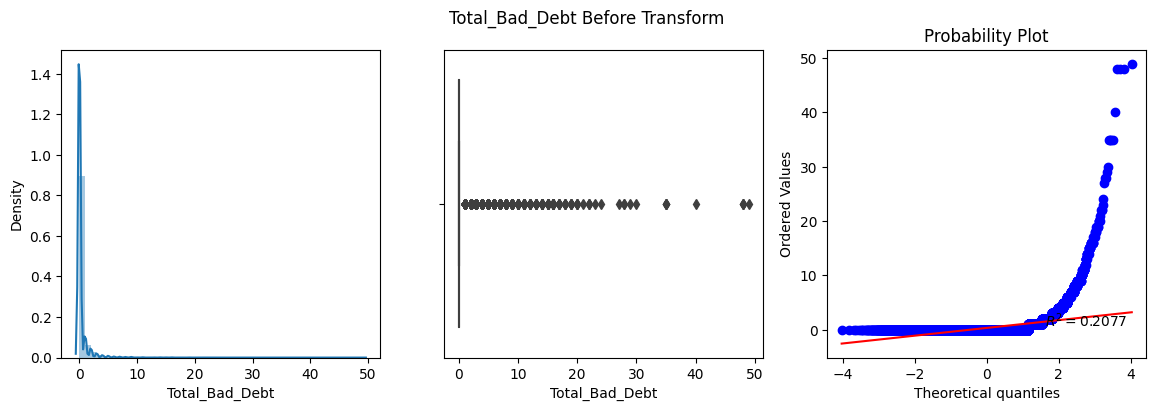

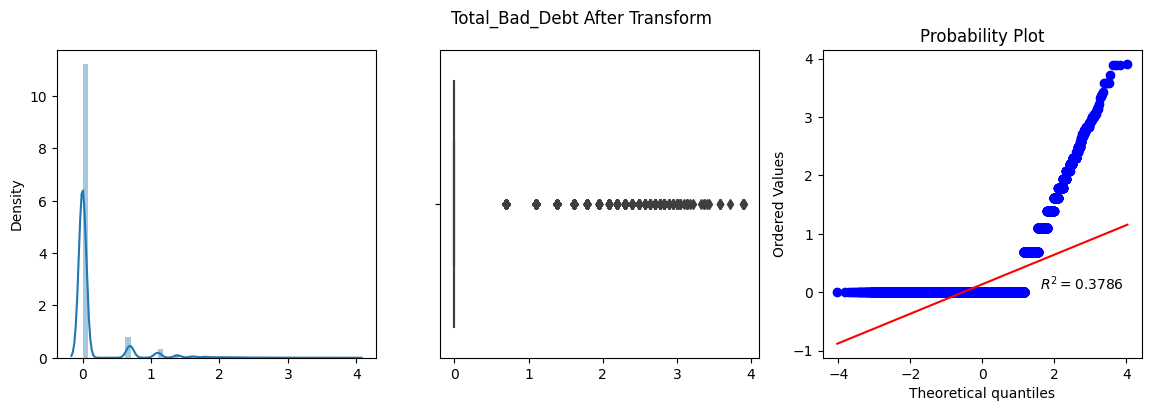

In [19]:
# Log Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.log1p),col)

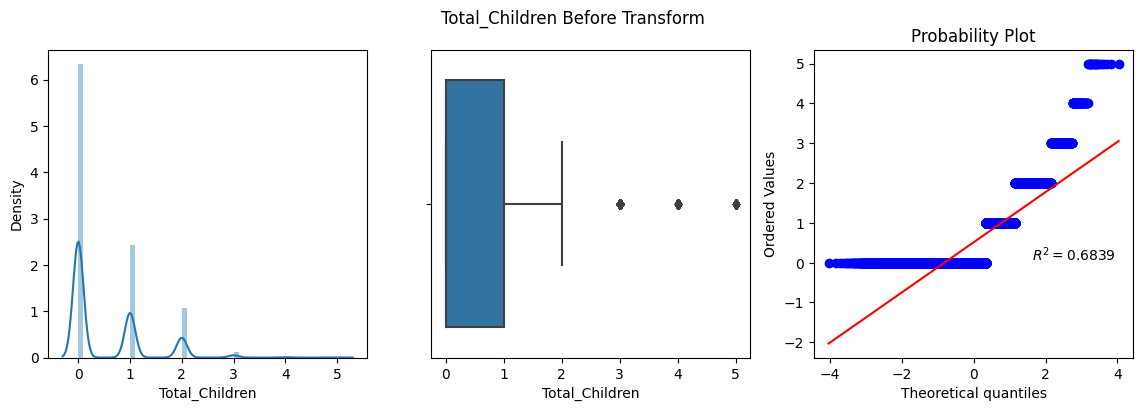

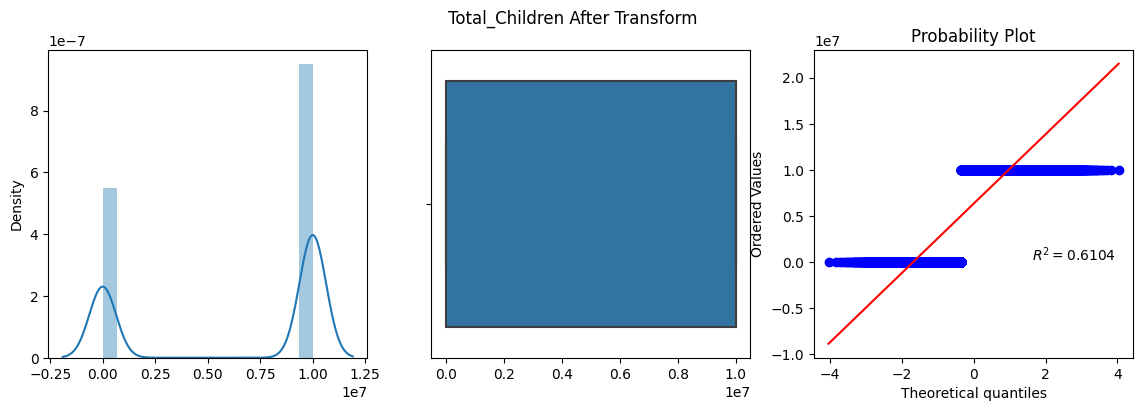

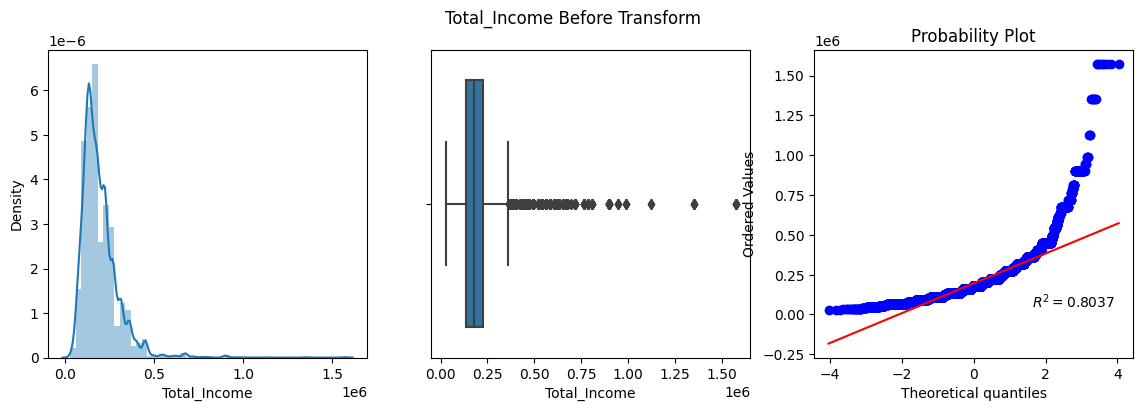

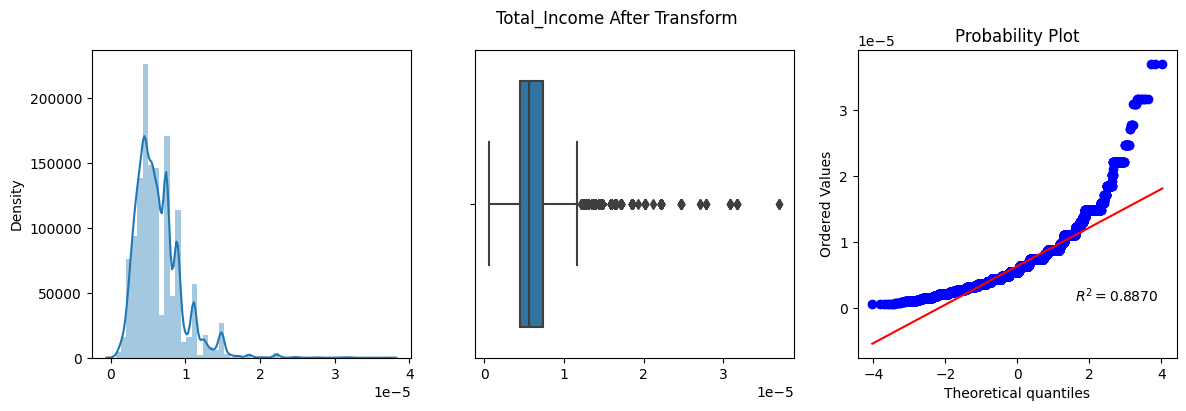

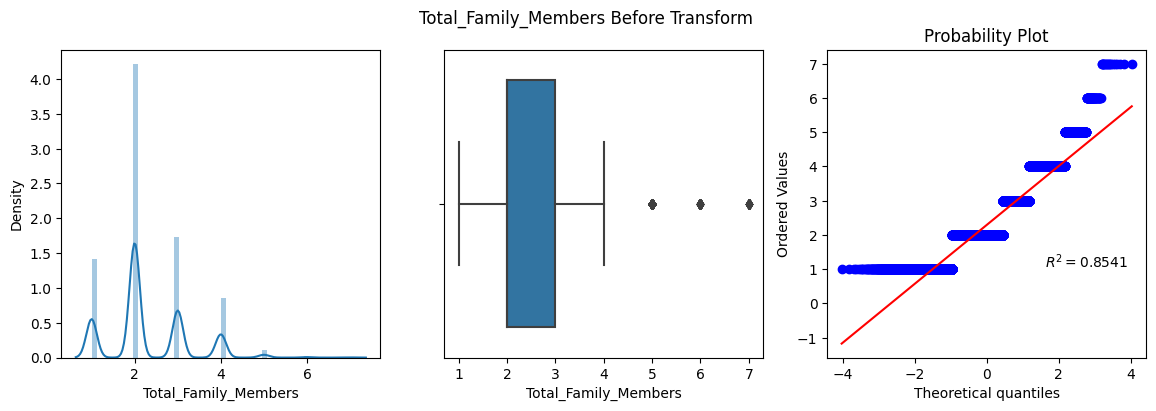

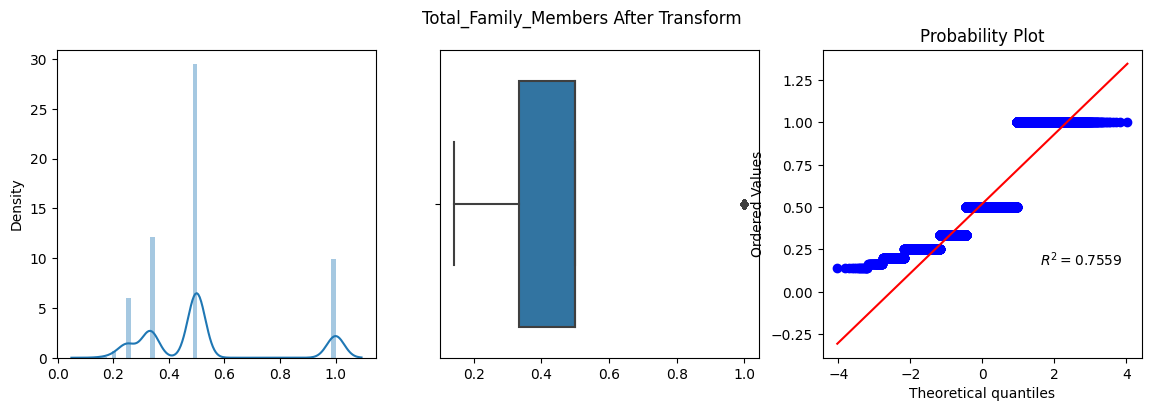

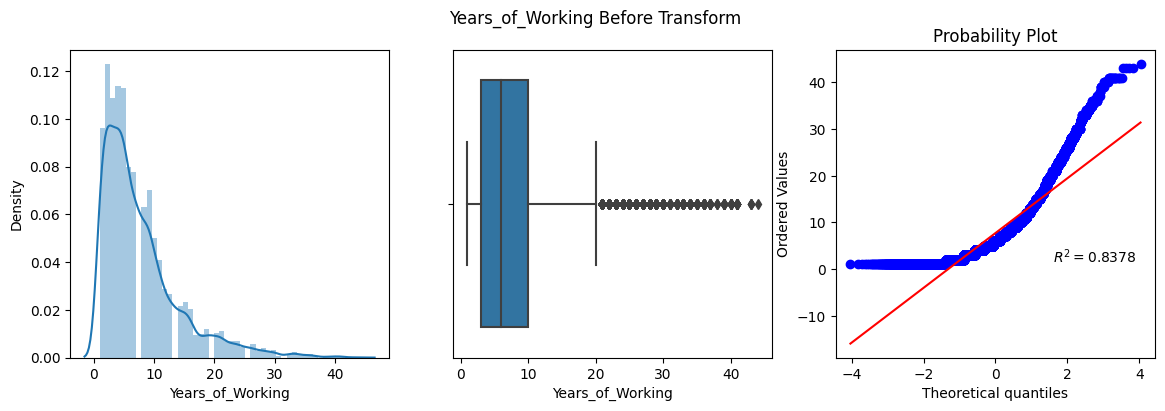

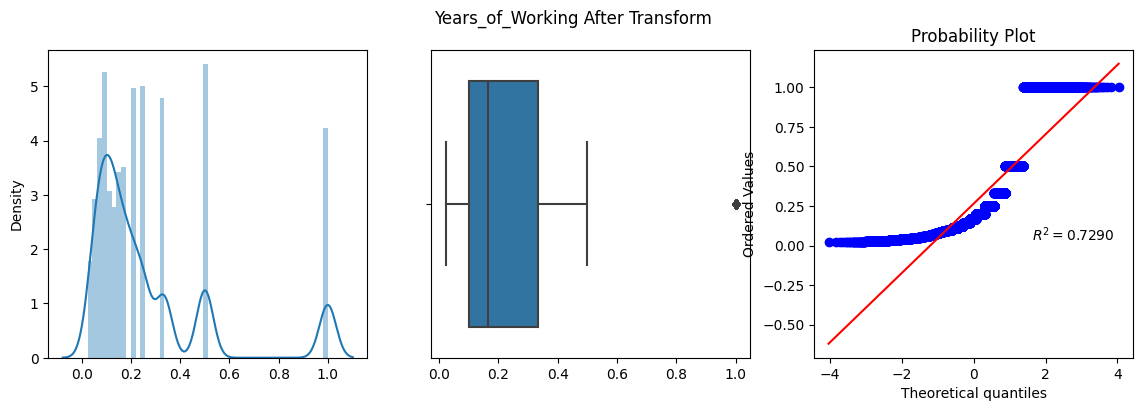

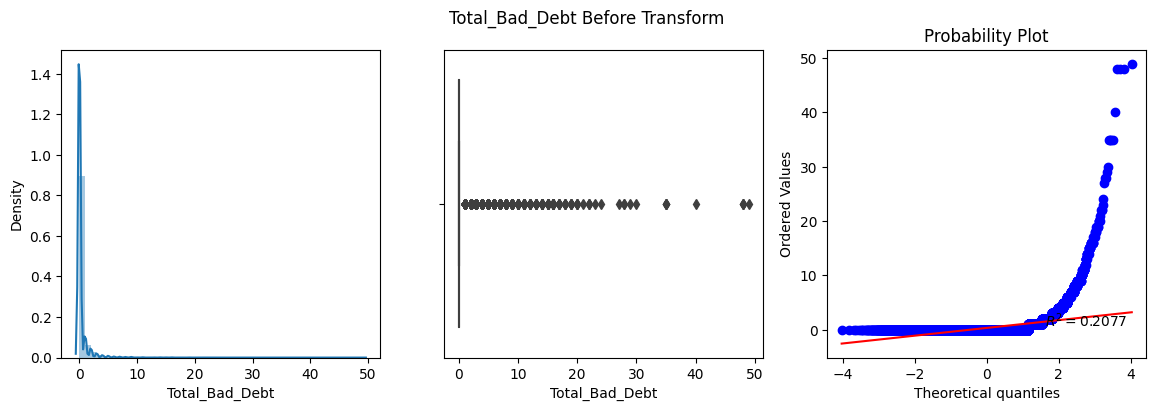

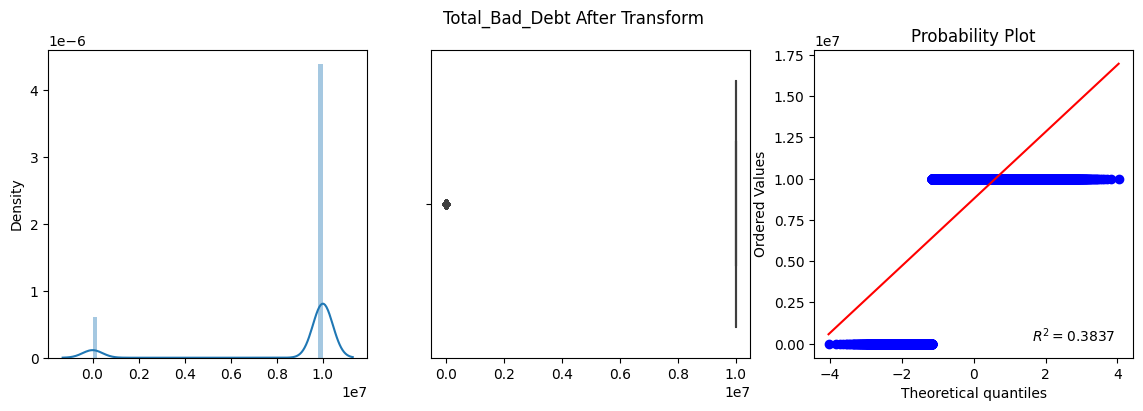

In [20]:
# Reciprocal Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: 1/(x+0.0000001)),col)

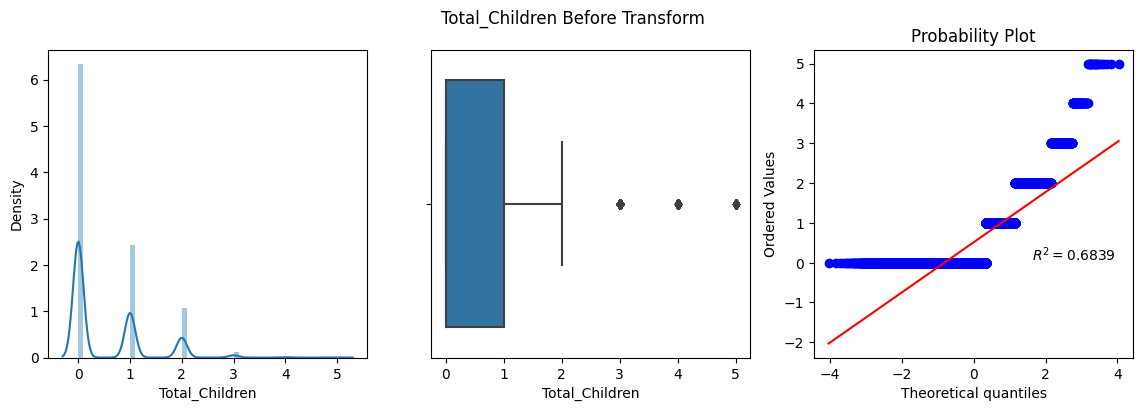

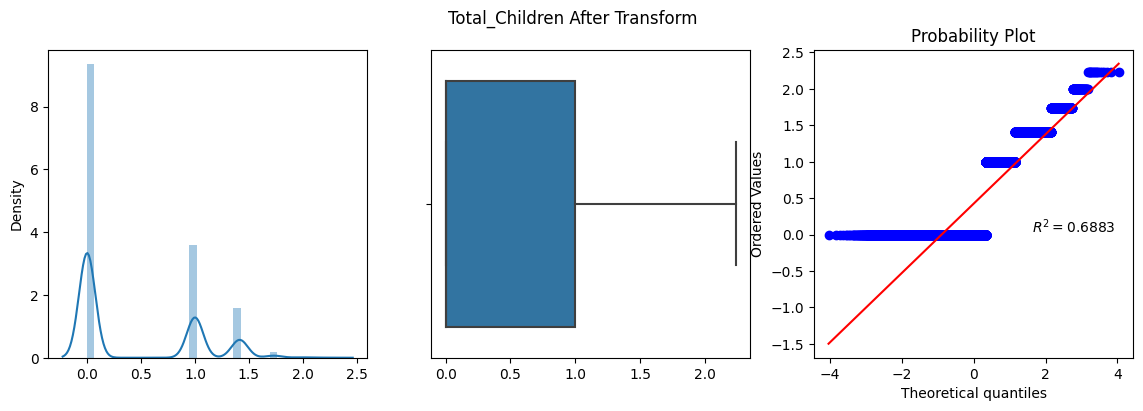

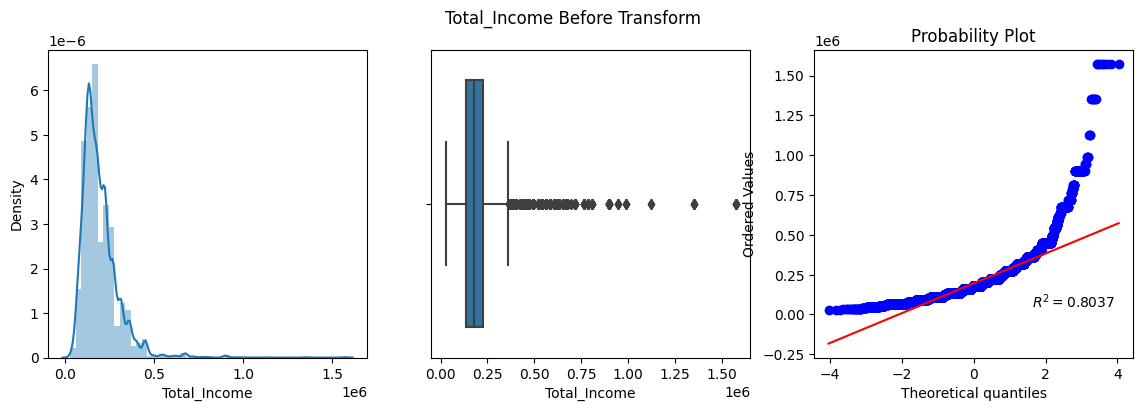

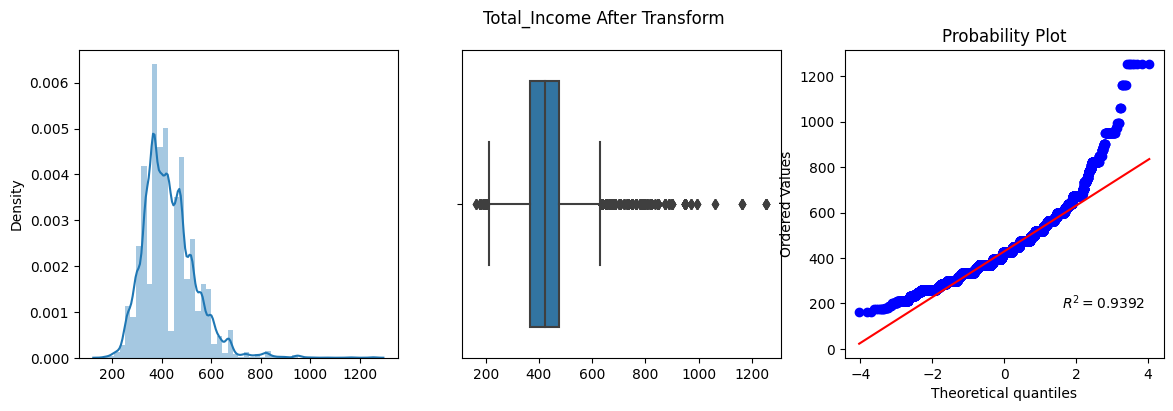

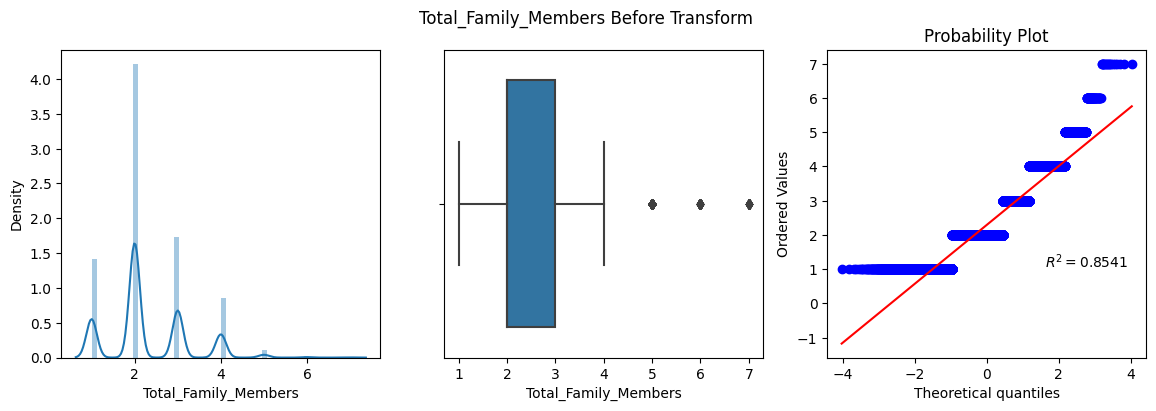

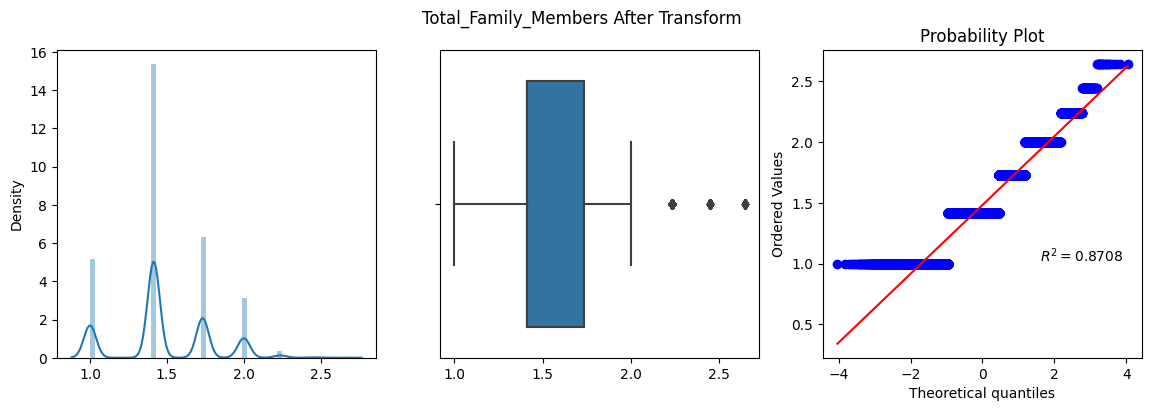

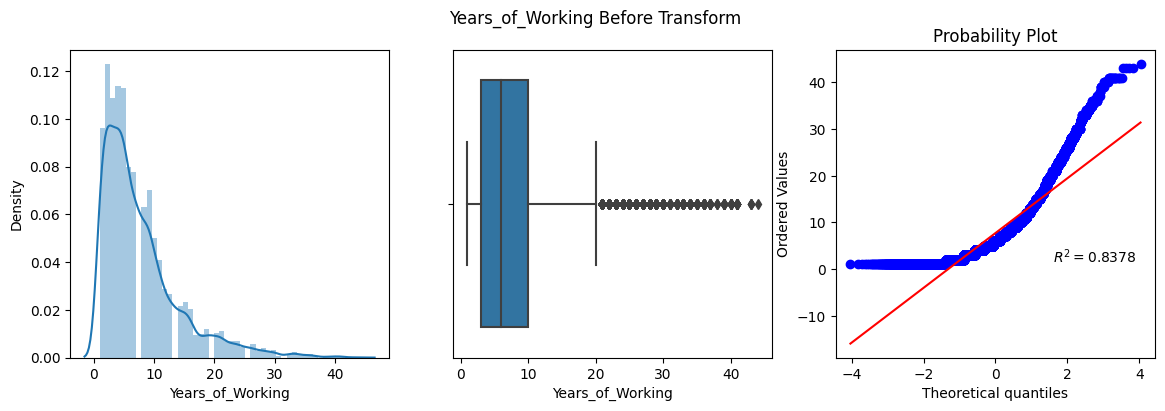

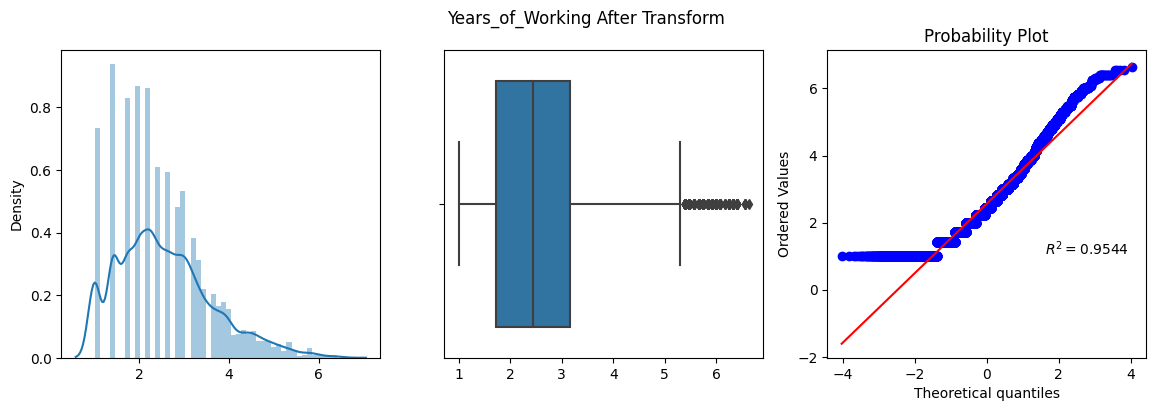

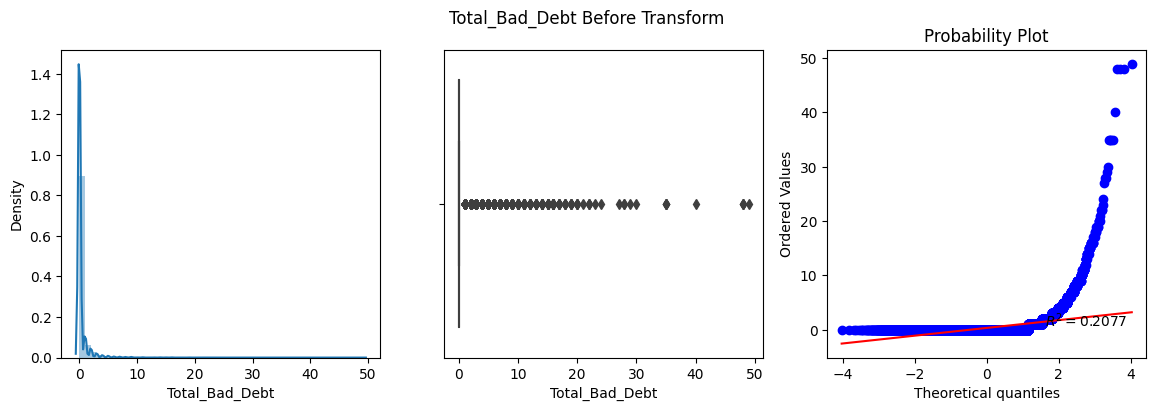

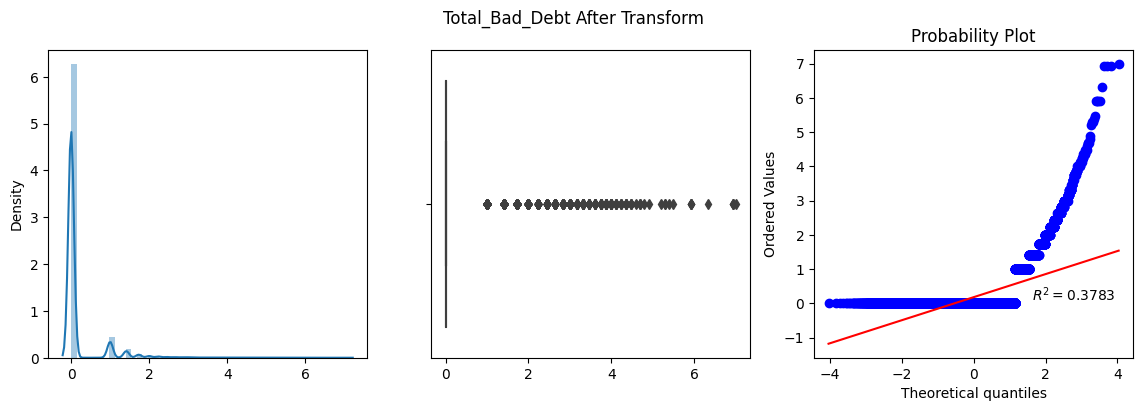

In [22]:
# Square Root Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.sqrt),col)

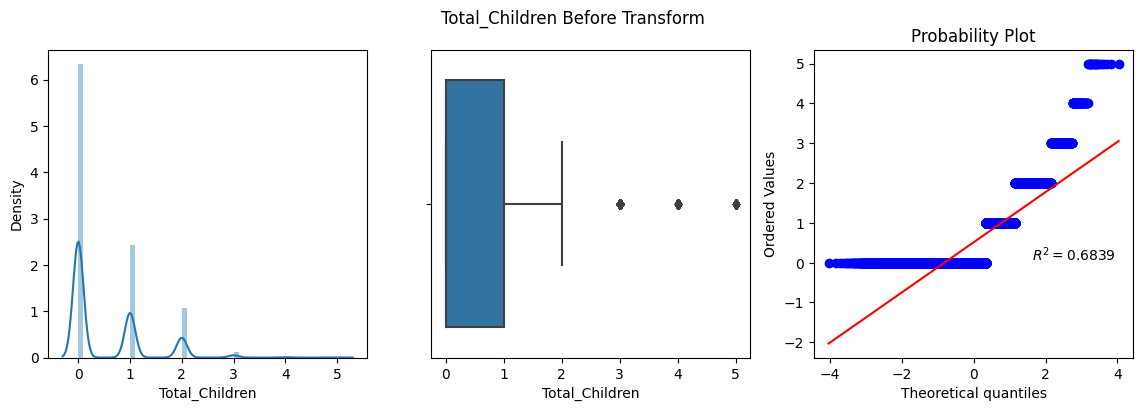

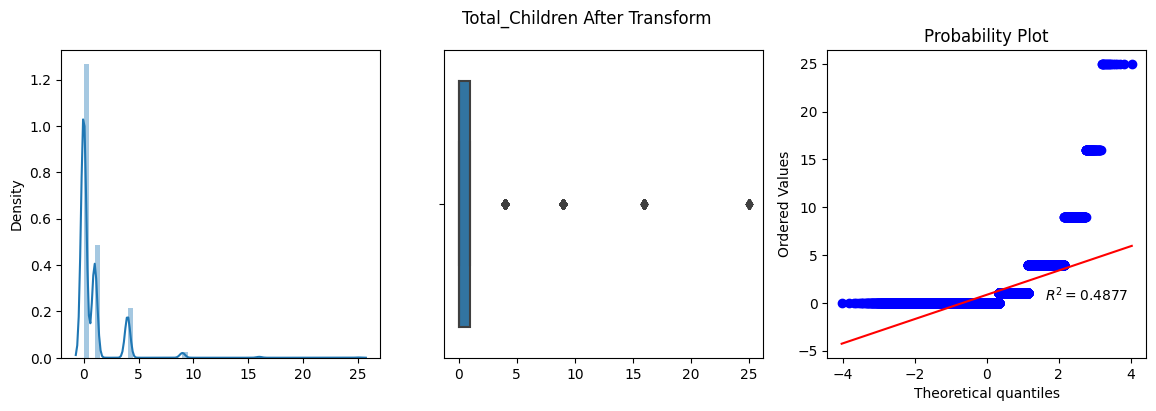

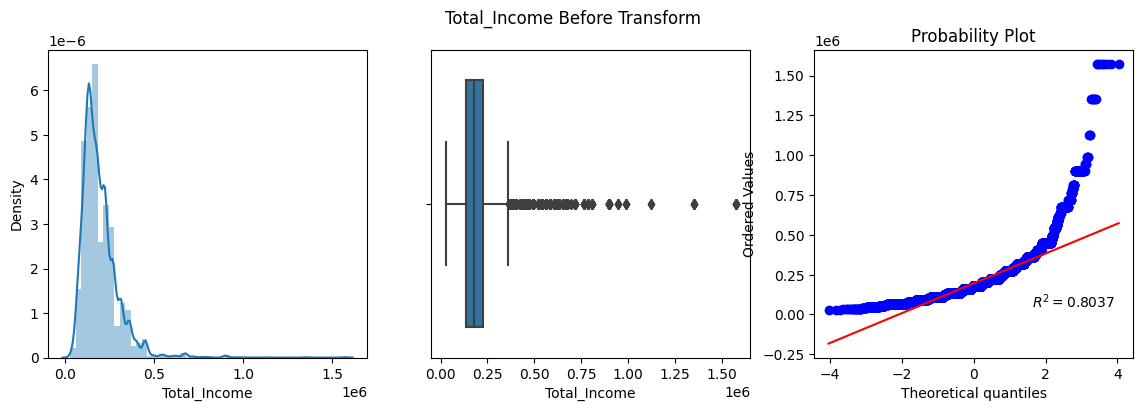

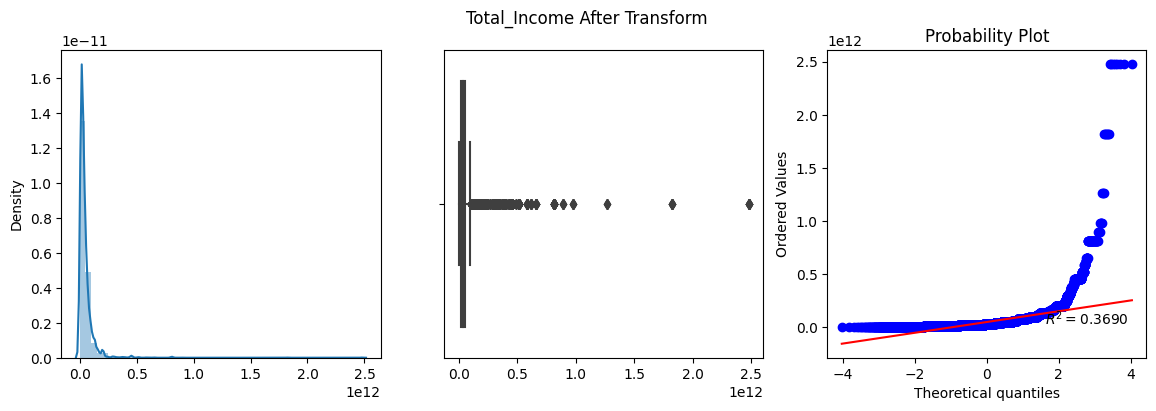

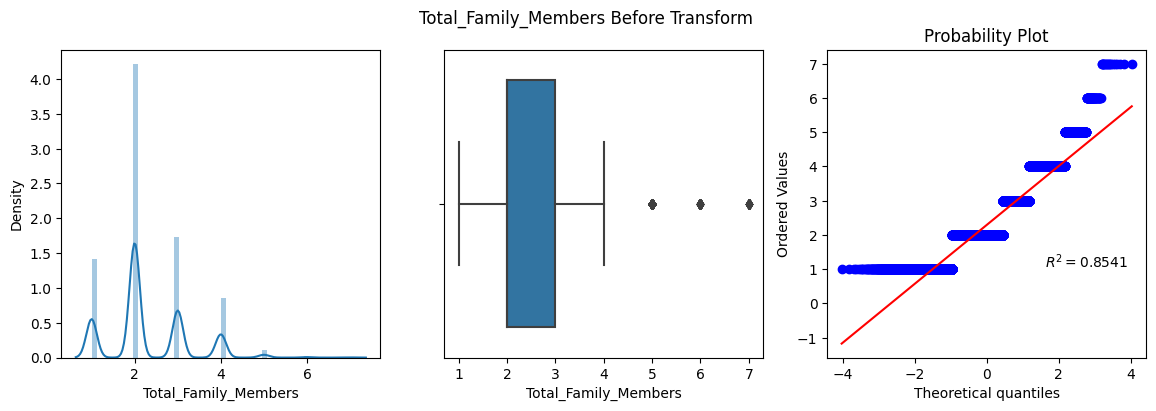

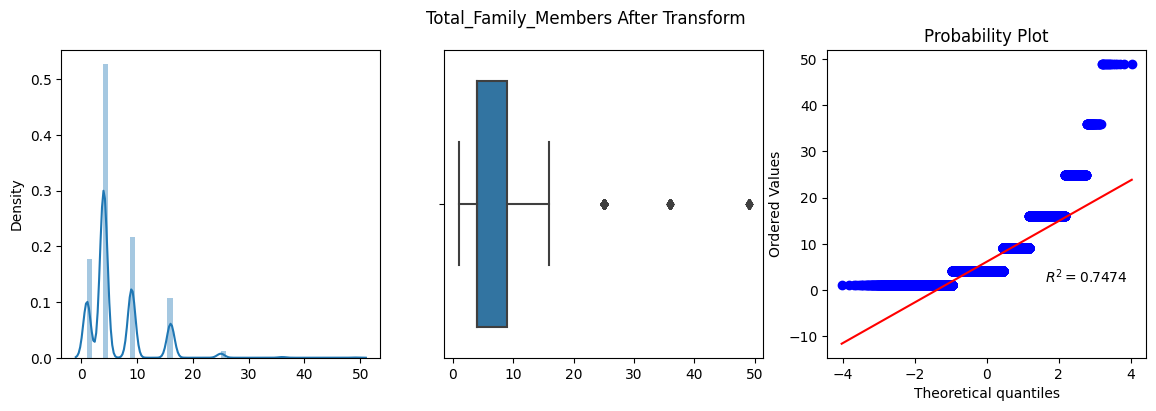

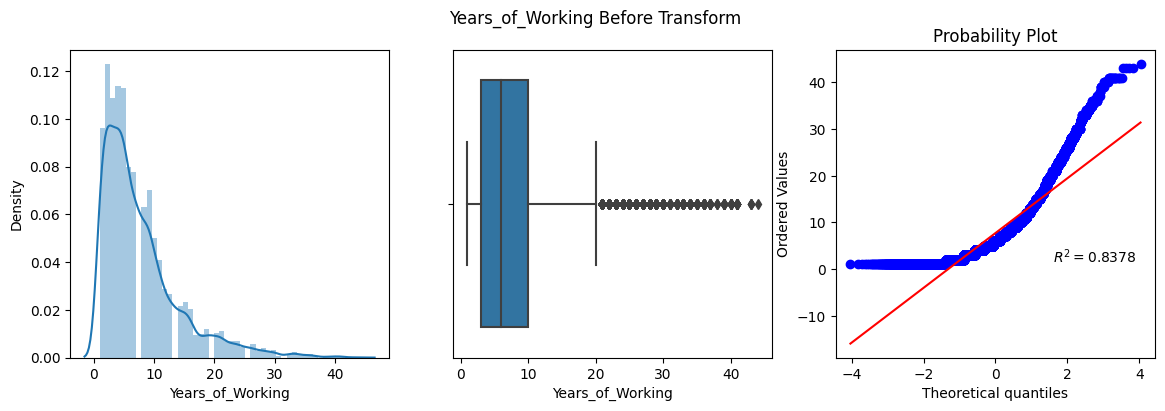

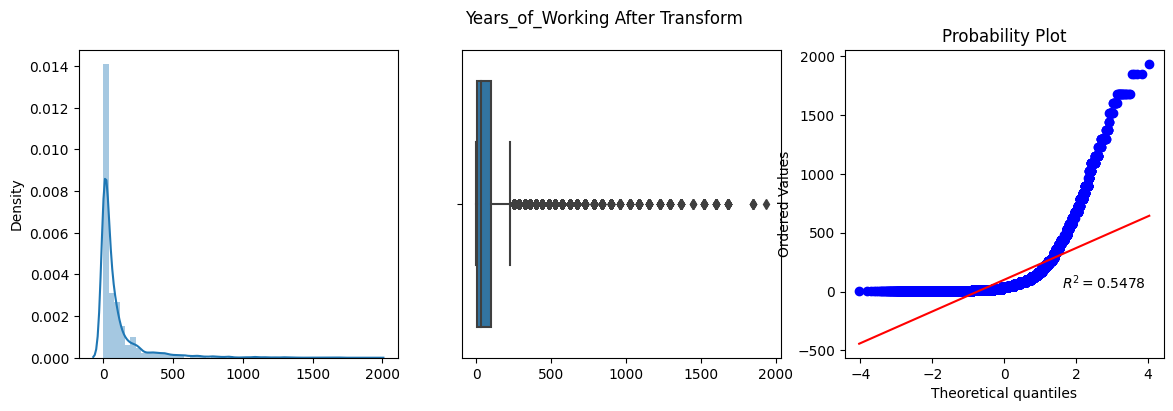

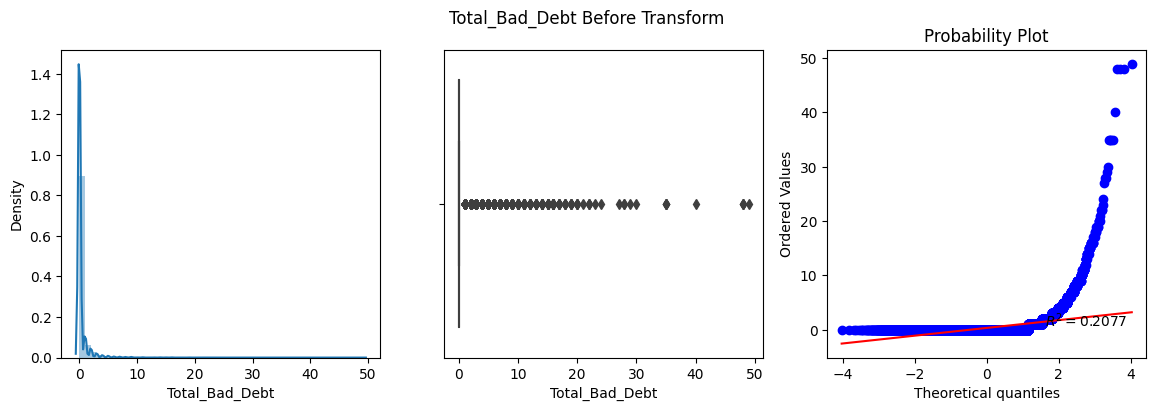

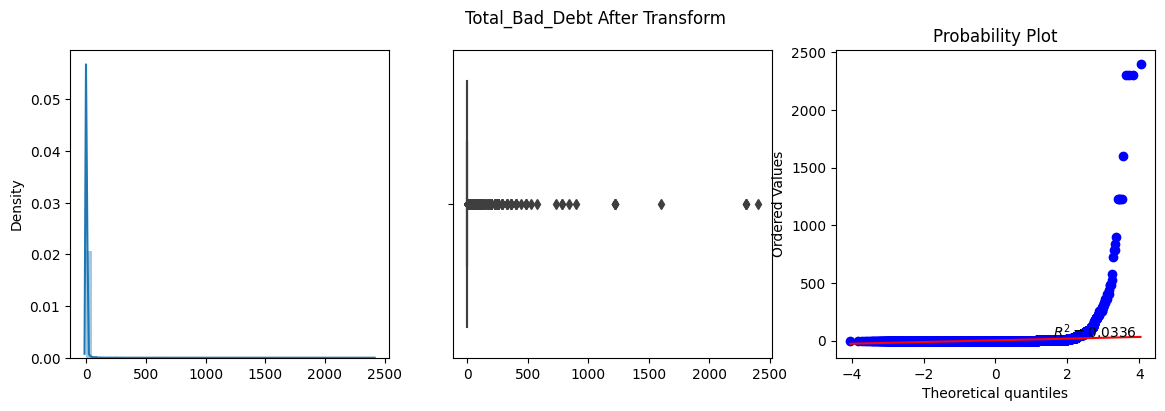

In [23]:
# Square Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.square),col)

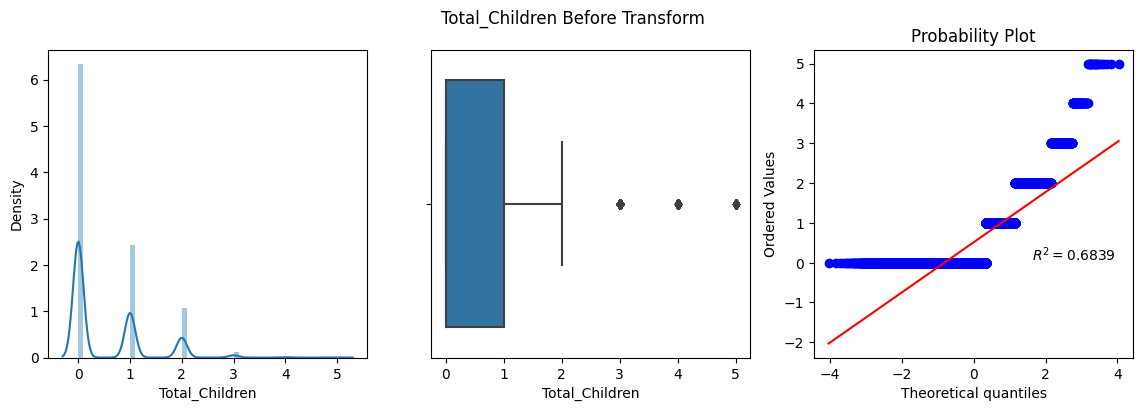

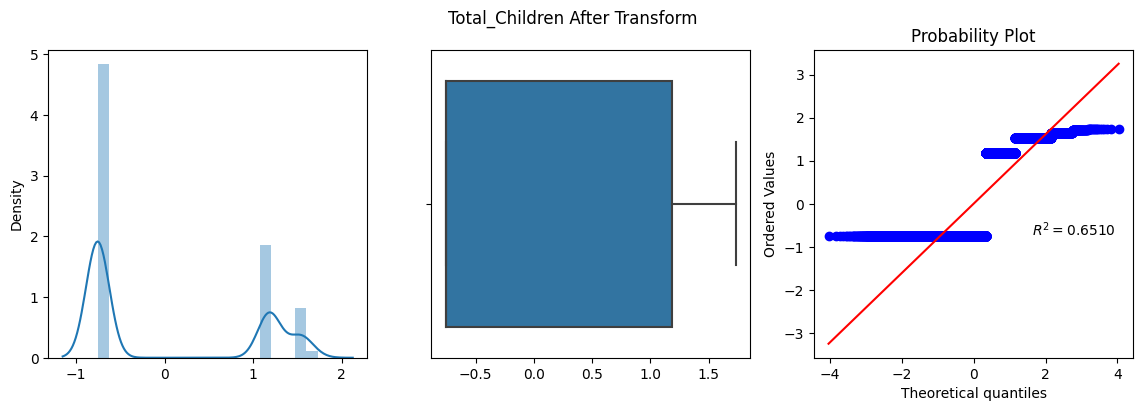

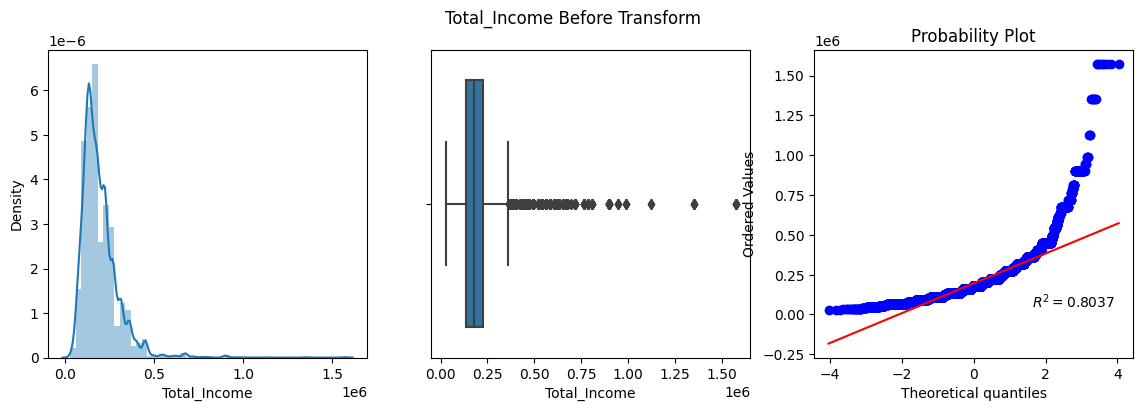

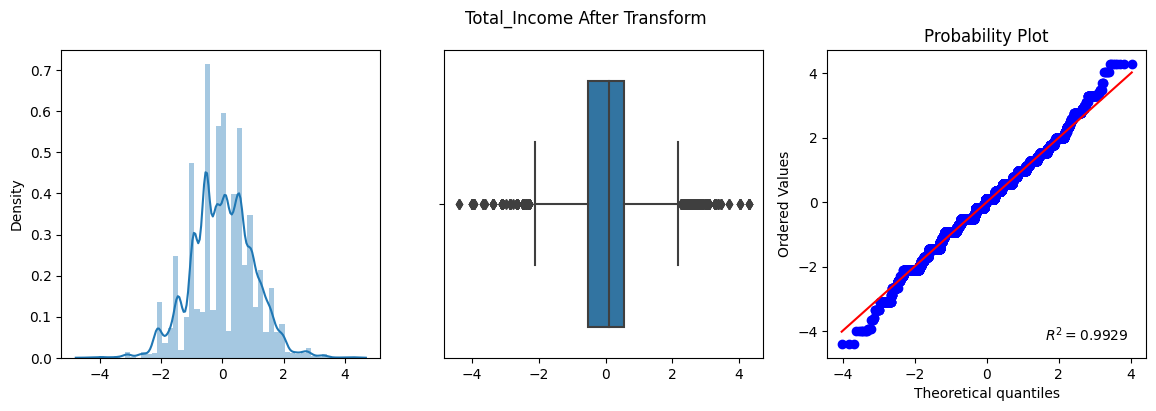

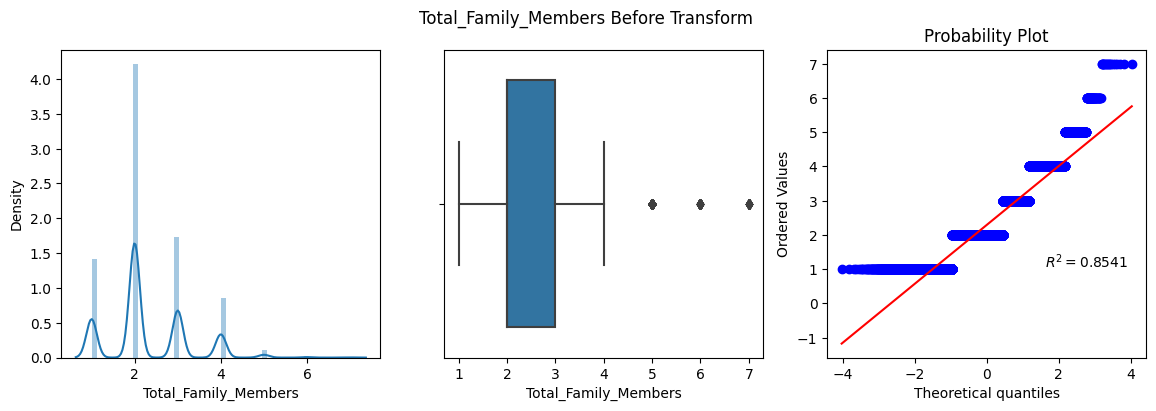

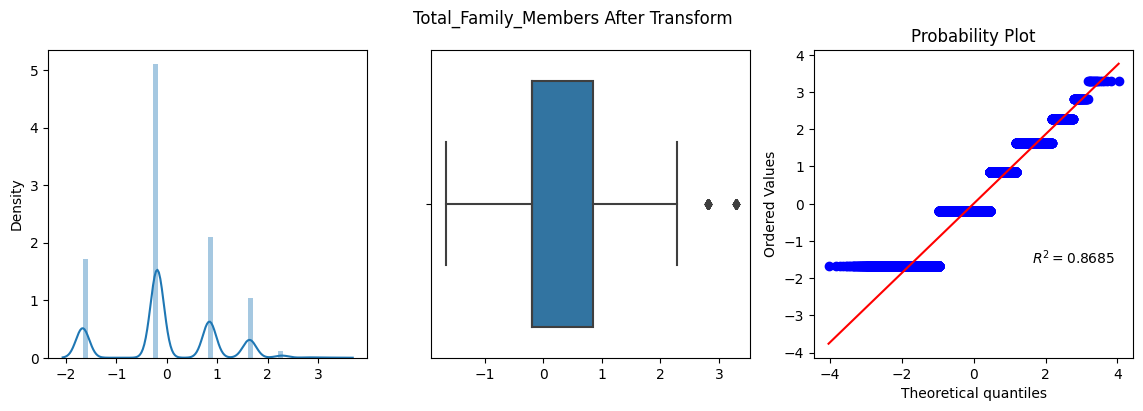

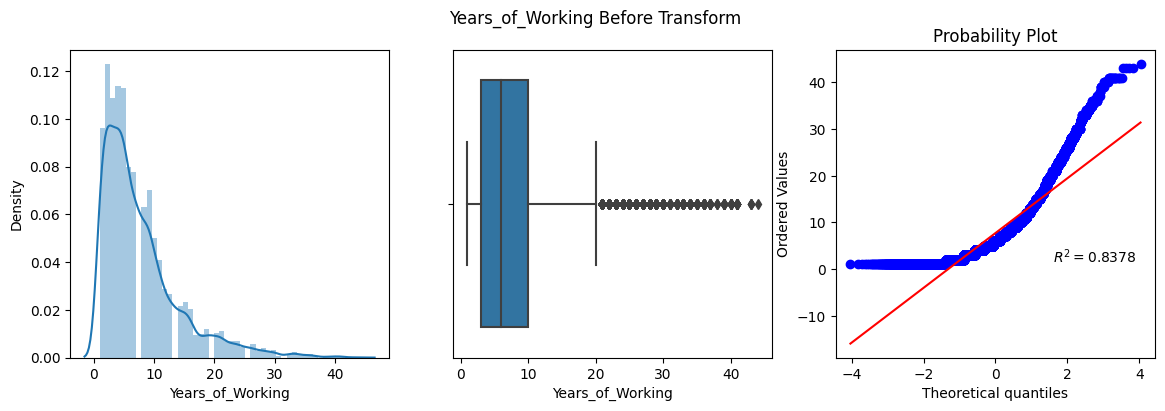

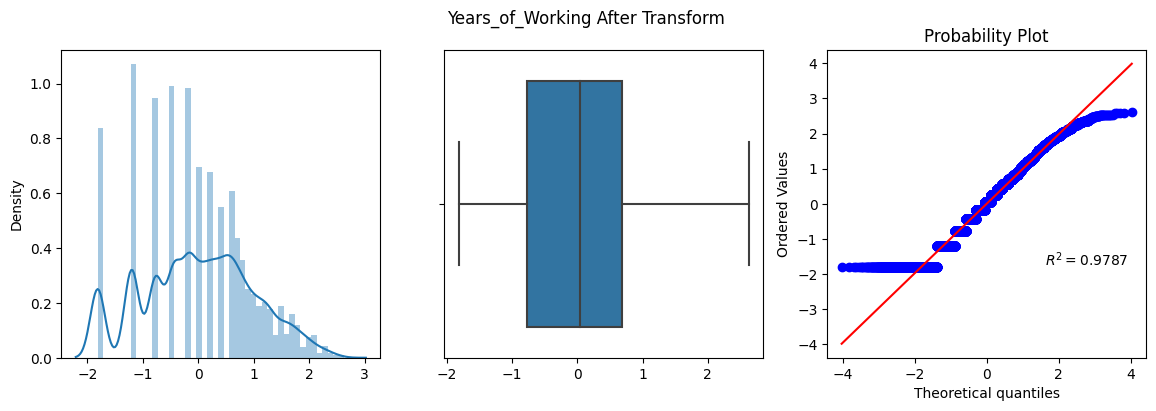

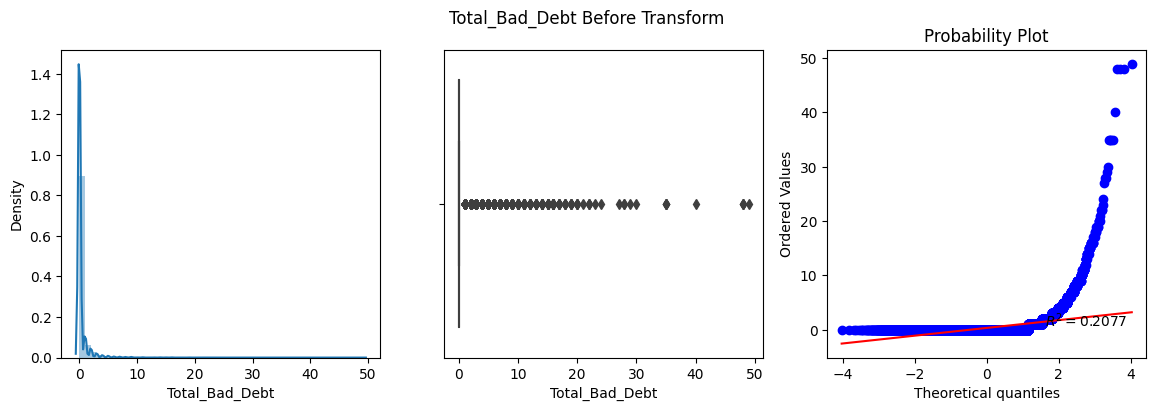

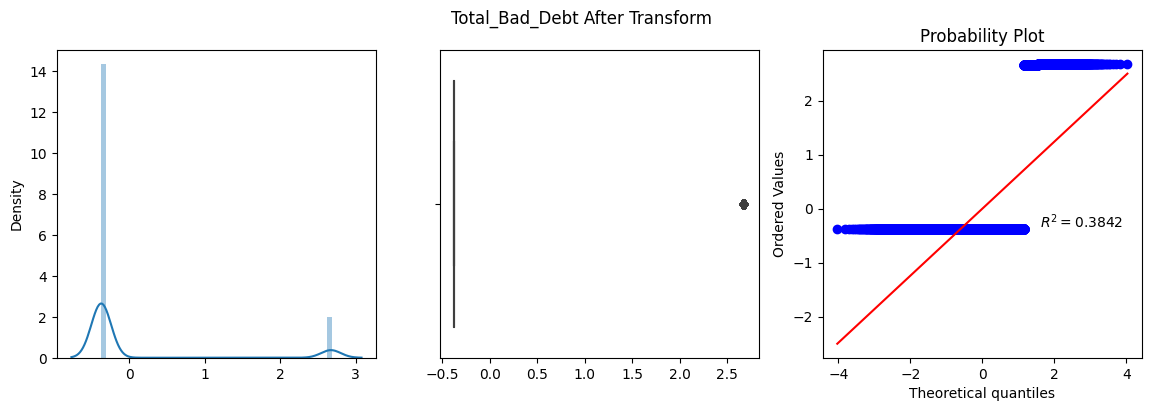

In [24]:
# Power Transform
for col in skewed_cols:
    apply_transform(PowerTransformer(),col)

Log Transform: Years_of_Working <br>
Sqrt Transform: Total_Children, Total_Family_Members <br>
Square Transform: None <br>
Reciprocal Transform: None <br>
Power Transform: Total_Income, Total_Bad_Debt

### Outlier Treatment

In [25]:
def impute_outliers(data,col):
    winsorizer = Winsorizer(capping_method='iqr',fold=1.5,tail='both')
    fig = sns.boxplot(winsorizer.fit_transform(data[[col]]).values)
    plt.title(f"Box Plot of {col} after Outlier Removal")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect()

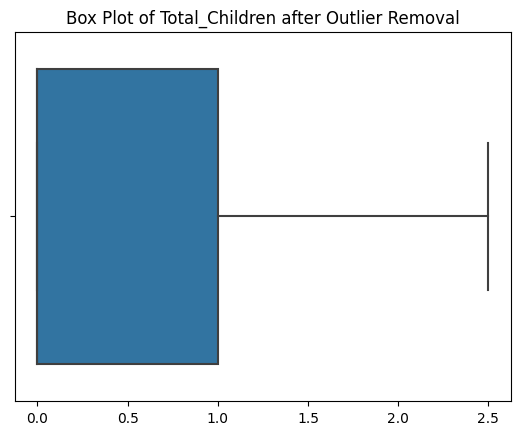

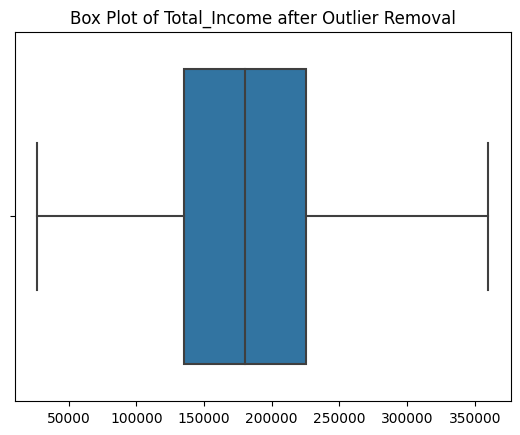

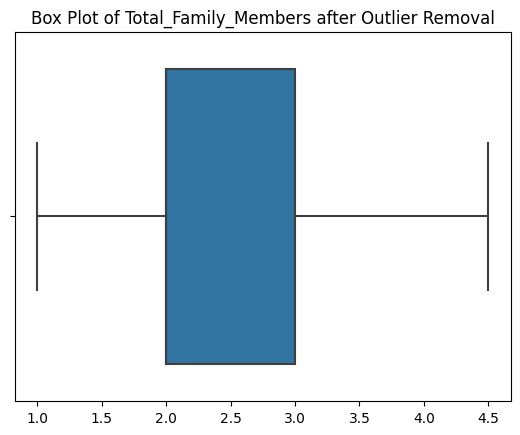

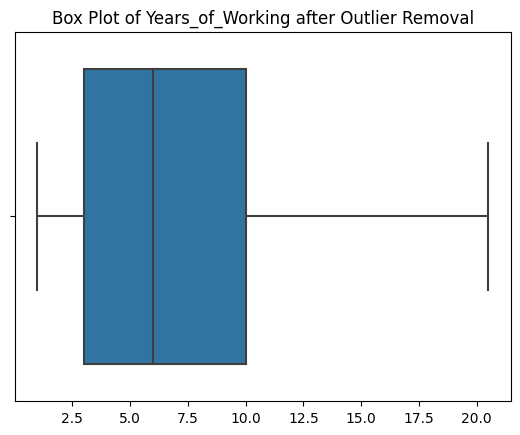

In [30]:
for col in ['Total_Children','Total_Income','Total_Family_Members','Years_of_Working']:
    impute_outliers(df,col)

In [29]:
winsorizer = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

for col in ['Total_Children','Total_Income','Total_Family_Members','Years_of_Working']:
    df[col] = winsorizer.fit_transform(df[[col]])

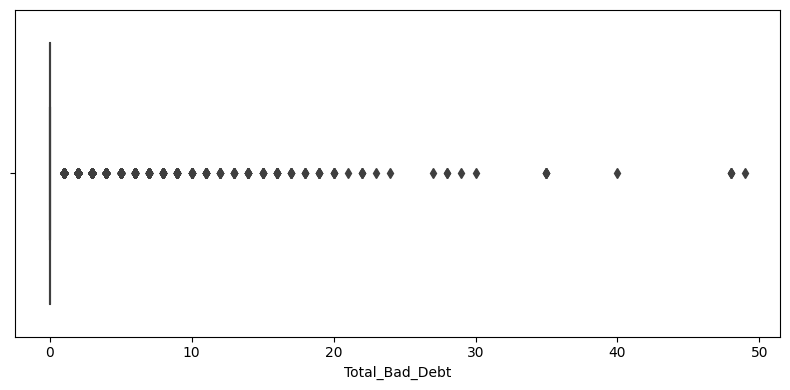

In [31]:
plt.figure(figsize=(8,4))
fig = sns.boxplot(df['Total_Bad_Debt'])
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

In [32]:
lower_limit, upper_limit = df['Total_Bad_Debt'].quantile([0.25,0.75])
IQR = upper_limit - lower_limit
lower_whisker = lower_limit - 1.5 * IQR
upper_whisker = upper_limit + 1.5 * IQR
df['Total_Bad_Debt'] = np.where(df['Total_Bad_Debt']<lower_whisker,lower_whisker,np.where(df['Total_Bad_Debt']>upper_whisker,upper_whisker,df['Total_Bad_Debt']))

In [34]:
df['Total_Bad_Debt'].value_counts()

0.0    25128
Name: Total_Bad_Debt, dtype: int64

In [35]:
# Since the feature "Total_Bad_Debt" has very low variance, I'm dropping it..
df.drop('Total_Bad_Debt',axis=1,inplace=True)

### Categorical Encoding

In [36]:
df.select_dtypes(object).columns

Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Job_Title'],
      dtype='object')

In [37]:
df['Applicant_Gender'].value_counts() # One Hot

F          15627
M           9501
Name: Applicant_Gender, dtype: int64

In [38]:
df['Income_Type'].value_counts() # One Hot

Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: Income_Type, dtype: int64

In [39]:
df['Education_Type'].value_counts() # Ordinal

Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
Name: Education_Type, dtype: int64

In [40]:
df['Family_Status'].value_counts() # One Hot 

Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow                                                   580
Name: Family_Status, dtype: int64

In [41]:
df['Housing_Type'].value_counts() # One Hot

House / apartment                                     22096
With parents                                           1430
Municipal apartment                                     812
Rented apartment                                        439
Office apartment                                        199
Co-op apartment                                         152
Name: Housing_Type, dtype: int64

In [42]:
df['Job_Title'].value_counts() # One Hot

Laborers                                              6211
Core staff                                            3591
Sales staff                                           3485
Managers                                              3012
Drivers                                               2135
High skill tech staff                                 1383
Accountants                                           1241
Medicine staff                                        1207
Cooking staff                                          655
Security staff                                         592
Cleaning staff                                         549
Private service staff                                  344
Low-skill Laborers                                     175
Waiters/barmen staff                                   173
Secretaries                                            151
HR staff                                                85
Realty agents                                           

In [43]:
def onehotencode(data: pd.DataFrame,col: str) -> pd.DataFrame:
    encoder = OneHotEncoder(drop='first',sparse_output=False,max_categories=10)
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_data = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
    return encoded_data

In [44]:
onehotencode_cols = ['Applicant_Gender','Income_Type','Family_Status','Housing_Type','Job_Title']

for col in onehotencode_cols:
    encoded_data = onehotencode(df,col)
    df = pd.concat([df,encoded_data],axis=1)
    df.drop(col,axis=1,inplace=True)

In [48]:
df.columns = df.columns.str.strip()

In [49]:
def ordinal_encode(data: pd.DataFrame, col: str) -> pd.Series:
    encoder = OrdinalEncoder(categories=[['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']])
    data[col] = encoder.fit_transform(data[[col]])
    data[col] = data[col].astype(np.int64)
    return data[col]

In [50]:
df['Education_Type'] = ordinal_encode(df,'Education_Type')

In [51]:
def label_encode(data: pd.DataFrame, col: str) -> pd.Series:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    data[col] = data[col].astype(np.int64)
    label_mapping = dict()
    
    for idx, label in enumerate(encoder.classes_):
        label_mapping[idx] = label
        
    return label_mapping, data[col]

In [52]:
label_mapping, df['Status'] = label_encode(df,'Status')

In [53]:
label_mapping

{0: 0, 1: 1}

In [55]:
gc.collect()

0

### Feature Splitting

In [119]:
X = df.drop('Status',axis=1)
y = df['Status']

### Balancing out the imbalanced target classes

In [120]:
smote = ADASYN()
X, y = smote.fit_resample(X, y)

In [121]:
print("Composition of the target classes:", Counter(y))

Composition of the target classes: Counter({0: 25017, 1: 25007})


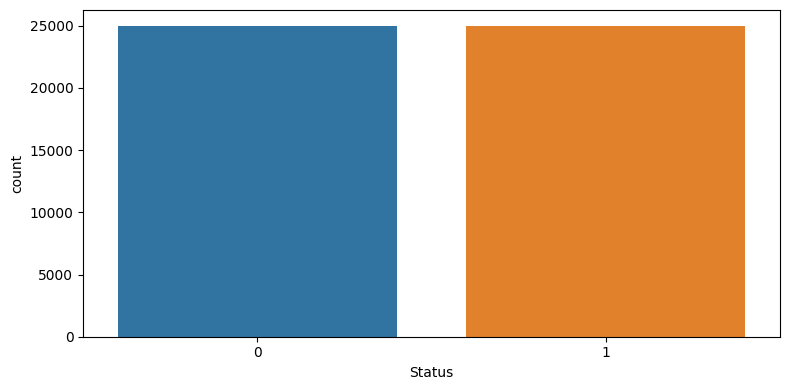

In [122]:
plt.figure(figsize=(8,4))
fig = sns.countplot(y)
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

### Performing train-test-split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=64)

### Feature Selection

In [126]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('duplicate',DropDuplicateFeatures()),
    ('correlated',DropCorrelatedFeatures())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [127]:
X_train.shape, X_test.shape

((35016, 35), (15008, 35))

In [128]:
kbest = SelectKBest(k=10,score_func=f_classif)
kbest.fit(X_train,y_train)

SelectKBest()

In [129]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['Owned_Car', 'Owned_Realty', 'Owned_Work_Phone', 'Owned_Phone',
       'Owned_Email', 'Years_of_Working', 'Total_Good_Debt',
       'Applicant_Gender_M', 'Income_Type_Pensioner',
       'Job_Title_infrequent_sklearn'], dtype=object)

In [130]:
perc = SelectPercentile(percentile=40,score_func=f_classif)
perc.fit(X_train,y_train)

SelectPercentile(percentile=40)

In [131]:
selected_features = perc.get_feature_names_out()
selected_features

array(['Owned_Car', 'Owned_Realty', 'Education_Type', 'Owned_Work_Phone',
       'Owned_Phone', 'Owned_Email', 'Applicant_Age', 'Years_of_Working',
       'Total_Good_Debt', 'Applicant_Gender_M', 'Income_Type_Pensioner',
       'Housing_Type_Office apartment', 'Job_Title_Laborers',
       'Job_Title_infrequent_sklearn'], dtype=object)

In [132]:
lasso = SelectFromModel(estimator=Lasso(),max_features=10)
lasso.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(), max_features=10)

In [133]:
selected_features = lasso.get_feature_names_out()
selected_features

array(['Total_Good_Debt'], dtype=object)

In [134]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=10,step=2,verbose=3)
rfe.fit(X_train,y_train)

Fitting estimator with 35 features.
Fitting estimator with 33 features.
Fitting estimator with 31 features.
Fitting estimator with 29 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=2,
    verbose=3)

In [135]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['Applicant_ID', 'Total_Children', 'Total_Income',
       'Years_of_Working', 'Total_Good_Debt', 'Applicant_Gender_M',
       'Income_Type_Working', 'Family_Status_Married',
       'Job_Title_Laborers', 'Job_Title_infrequent_sklearn'], dtype=object)

In [136]:
sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(),n_features_to_select=10,direction='forward',cv=4)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=4, estimator=RandomForestClassifier(),
                          n_features_to_select=10)

In [137]:
selected_features = sfs.get_feature_names_out()
selected_features

array(['Applicant_ID', 'Total_Income', 'Education_Type', 'Applicant_Age',
       'Years_of_Working', 'Total_Good_Debt', 'Applicant_Gender_M',
       'Income_Type_Working', 'Family_Status_Married',
       'Housing_Type_Municipal apartment'], dtype=object)

In [138]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [139]:
def plot_feature_importances(feat_imp_type):
    feat_imps = xgb.get_booster().get_score(importance_type=feat_imp_type)
    keys = list(feat_imps.keys())
    values = list(feat_imps.values())
    feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance", ascending=False).reset_index()
    feat_imps_df.rename({'index': 'Feature'},axis=1,inplace=True)
    plt.figure(figsize=(12,8))
    fig = sns.barplot(x='Importance',y='Feature',data=feat_imps_df,orient='horizontal',palette='viridis')
    plt.title(f"{feat_imp_type.title()} Feature Importance")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect();

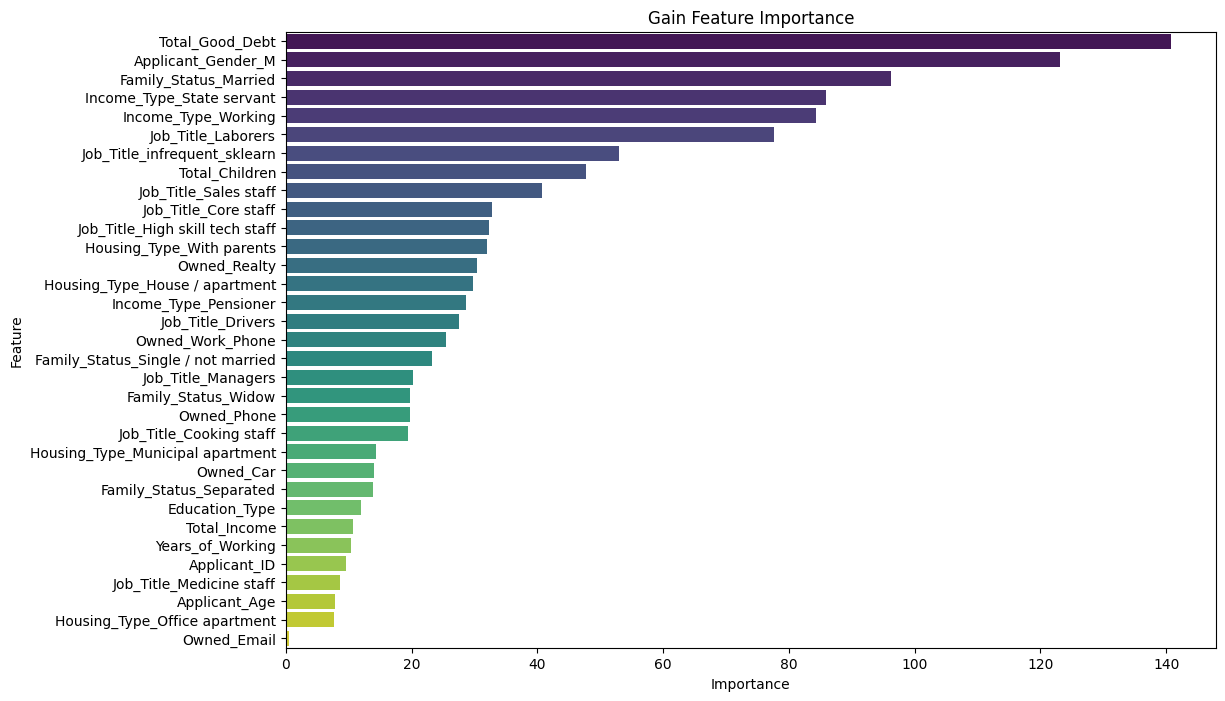

In [140]:
plot_feature_importances('gain')

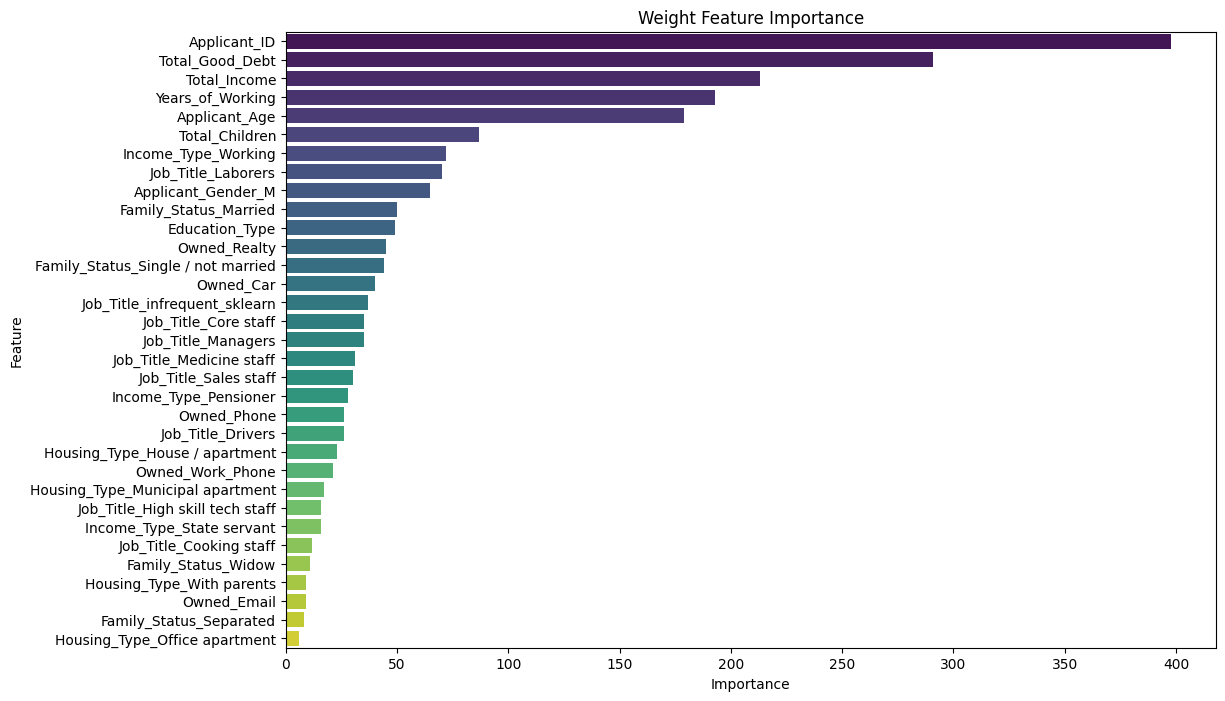

In [141]:
plot_feature_importances('weight')

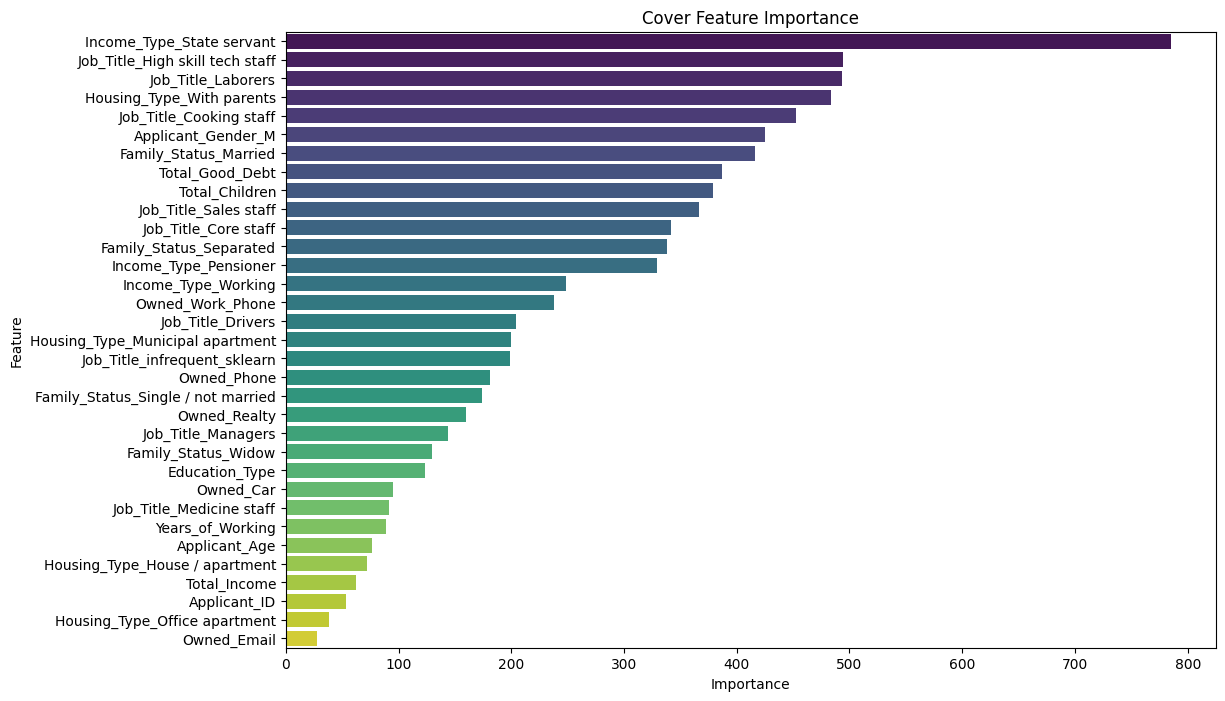

In [142]:
plot_feature_importances('cover')

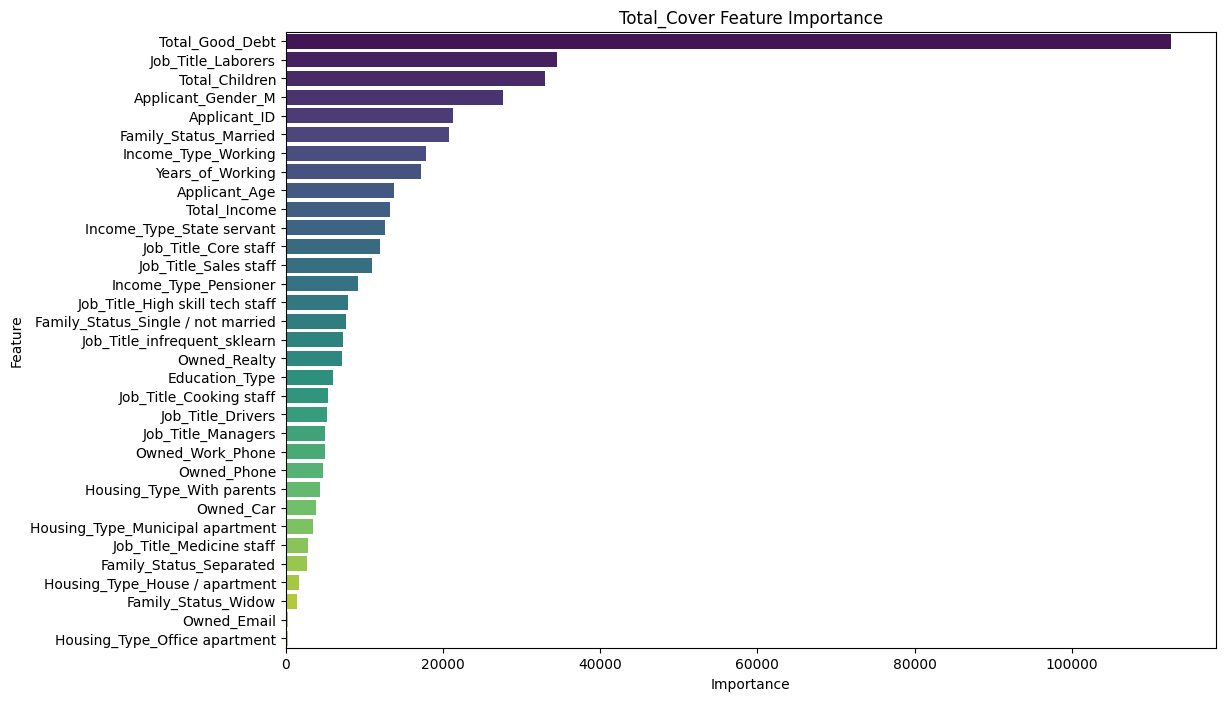

In [143]:
plot_feature_importances('total_cover')

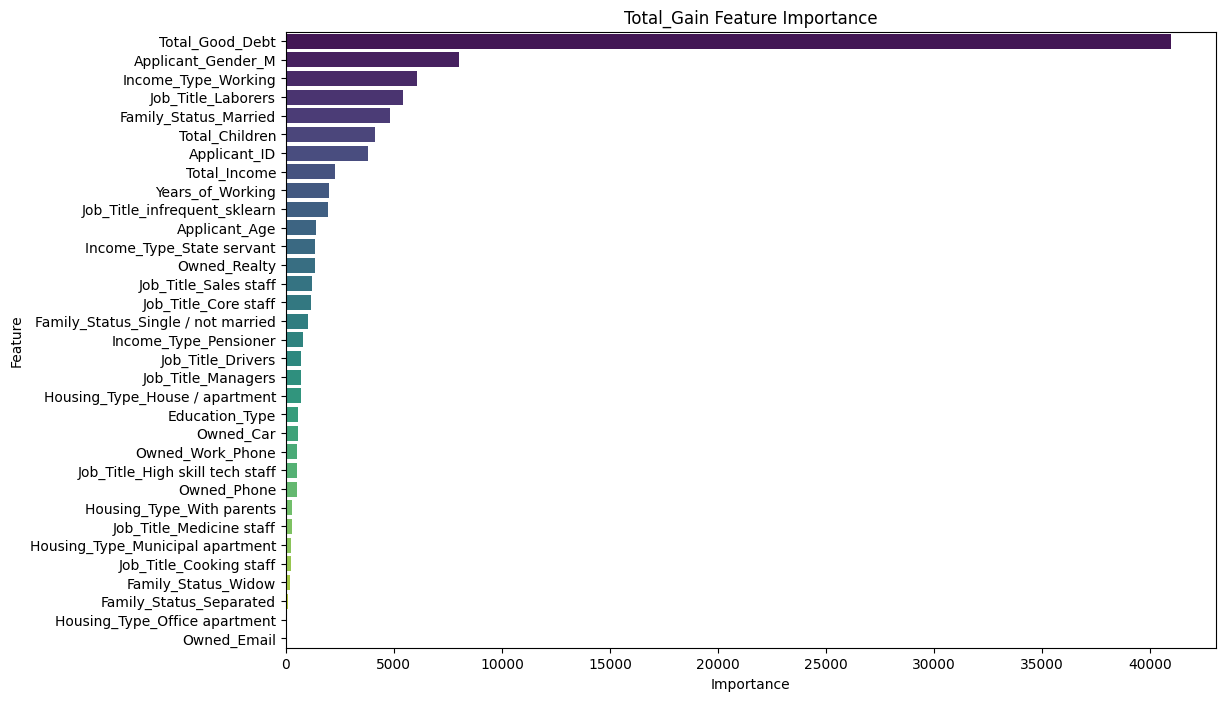

In [144]:
plot_feature_importances('total_gain')

In [145]:
final_selected_features = ['Total_Good_Debt','Applicant_Gender_M','Income_Type_Working','Job_Title_Laborers','Family_Status_Married','Total_Income','Total_Children','Years_of_Working','Applicant_Age','Income_Type_State servant']
len(final_selected_features)

10

In [160]:
final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [161]:
gc.collect()

7295

Log Transform: Years_of_Working <br>
Sqrt Transform: Total_Children, Total_Family_Members <br>
Square Transform: None <br>
Reciprocal Transform: None <br>
Power Transform: Total_Income, Total_Bad_Debt

In [162]:
transformer = ColumnTransformer(transformers=[
    ('log_transform',FunctionTransformer(np.log1p),['Years_of_Working']),
    ('sqrt_transform',FunctionTransformer(np.sqrt),['Total_Children']),
    ('power_transform',PowerTransformer(),['Total_Income'])
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('log_transform',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Years_of_Working']),
                                ('sqrt_transform',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['Total_Children']),
                                ('power_transform', PowerTransformer(),
                                 ['Total_Income'])])

In [163]:
final_X_train = transformer.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=final_selected_features)
final_X_test = transformer.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=final_selected_features)
final_X_train.head()

Total_Good_Debt  Applicant_Gender_M  Income_Type_Working  \
0         1.694178            0.000000             1.065703   
1         1.761951            0.420103            -0.537492   
2         1.467382            1.150769             1.670709   
3         2.424955            1.000000            -0.194709   
4         2.286746            0.000000             0.628322   

   Job_Title_Laborers  Family_Status_Married  Total_Income  Total_Children  \
0                 2.0               1.000000      0.000000        0.000000   
1                 1.0               0.176487      0.176487        0.000000   
2                 4.0               1.000000      0.000000        0.000000   
3                 3.0               0.698274      0.698274        0.301726   
4                 2.0               0.960713      1.000000        0.000000   

   Years_of_Working  Applicant_Age  Income_Type_State servant  
0          0.000000           42.0                        0.0  
1          1.000000           44.0                        0.0  
2          1.000000           36.0                        0.0  
3          1.000000           32.0                        0.0  
4          0.960713           55.0                        0.0

In [164]:
final_X_test.head()

Total_Good_Debt  Applicant_Gender_M  Income_Type_Working  \
0         1.248656             0.69689            -0.933185   
1         2.197225             1.00000            -0.194709   
2         3.044522             0.00000            -0.194709   
3         1.892929             0.00000            -0.537492   
4         2.639057             0.00000             0.108460   

   Job_Title_Laborers  Family_Status_Married  Total_Income  Total_Children  \
0                13.0                    1.0      0.485656        0.000000   
1                38.0                    0.0      0.000000        0.000000   
2                 3.0                    0.0      0.000000        0.000000   
3                 1.0                    0.0      1.000000        0.727758   
4                24.0                    1.0      1.000000        1.000000   

   Years_of_Working  Applicant_Age  Income_Type_State servant  
0          1.000000           50.0                        0.0  
1          1.000000           38.0                        0.0  
2          1.000000           51.0                        1.0  
3          0.272242           33.0                        0.0  
4          1.000000           47.0                        0.0

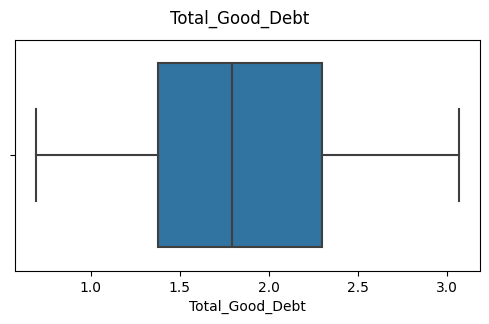

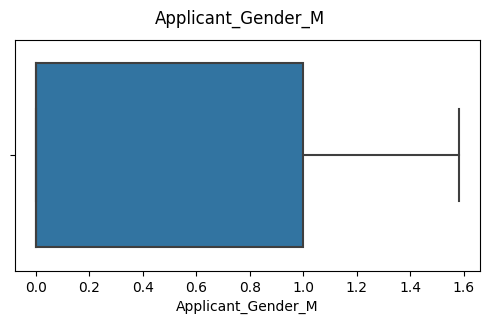

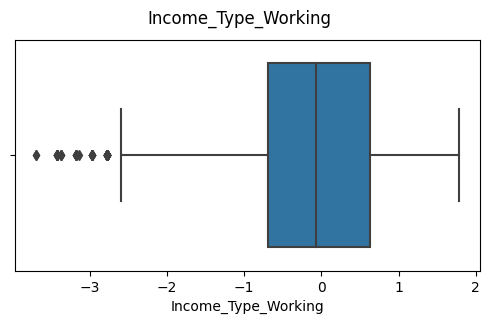

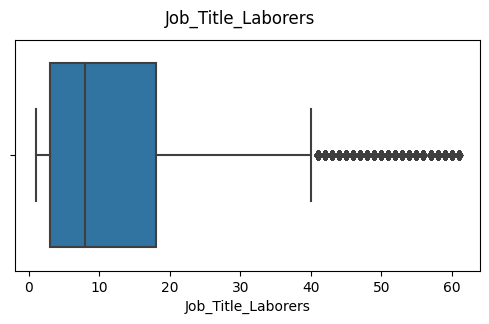

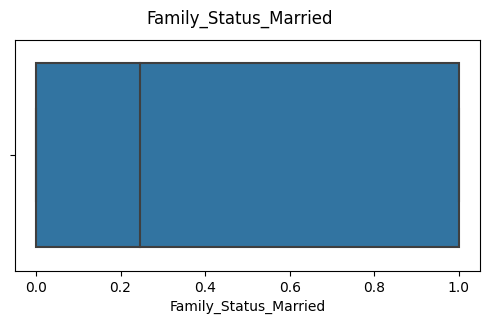

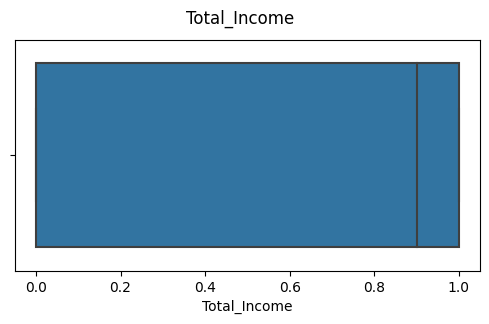

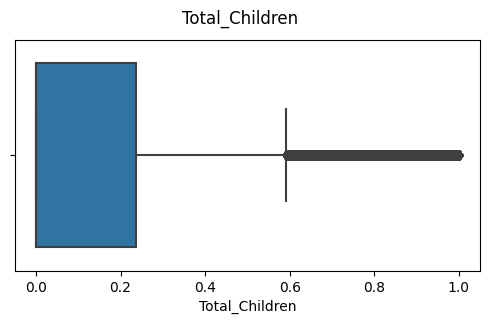

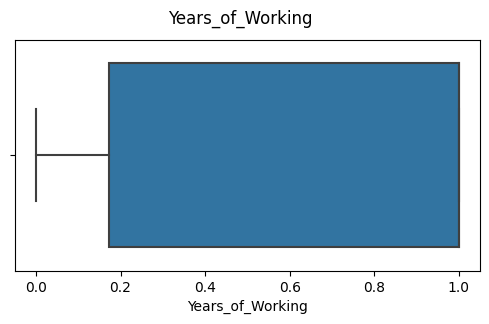

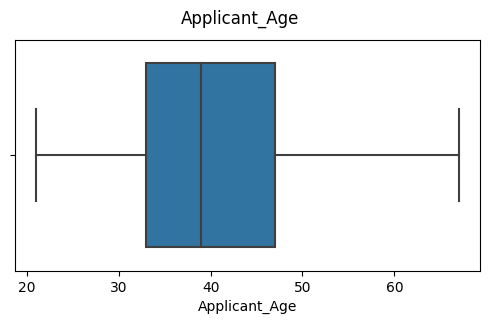

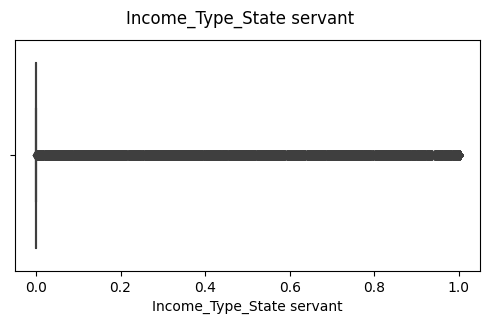

In [167]:
for col in final_X_train.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(final_X_train[col])
    plt.suptitle(col)
    plt.show()

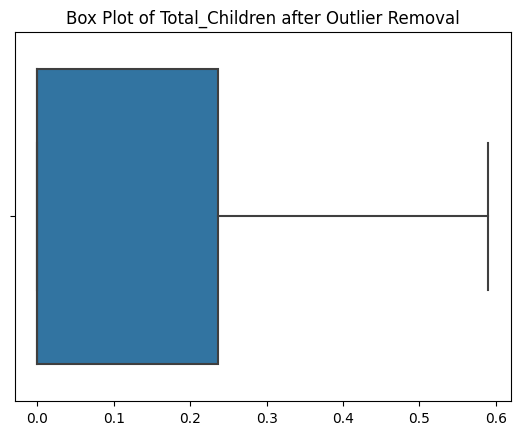

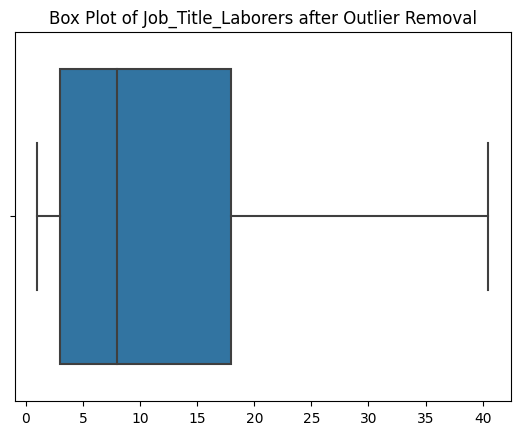

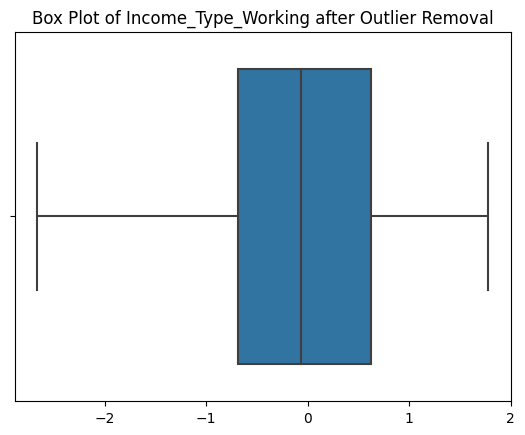

In [168]:
outlier_cols = ['Total_Children','Job_Title_Laborers','Income_Type_Working']

for col in outlier_cols:
    impute_outliers(final_X_train,col)

In [169]:
winsorizer = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

for col in outlier_cols:
    final_X_train[col] = winsorizer.fit_transform(final_X_train[[col]])
    final_X_test[col] = winsorizer.transform(final_X_test[[col]])

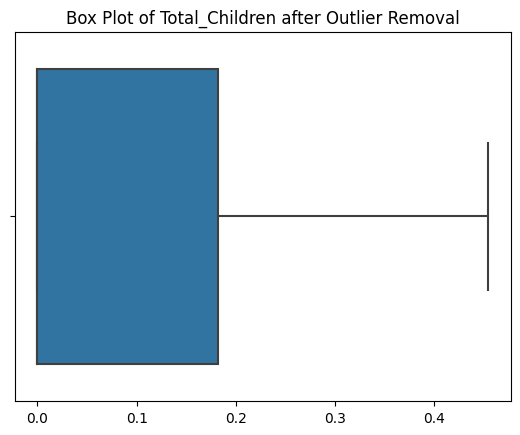

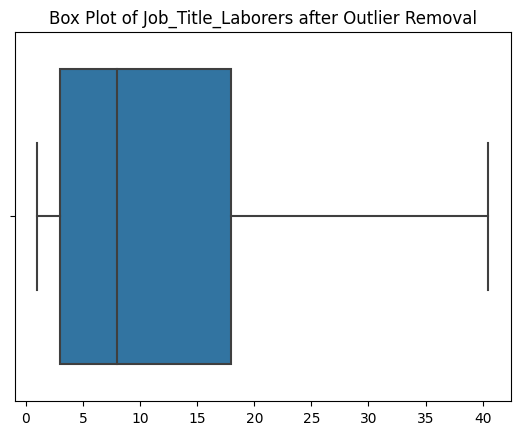

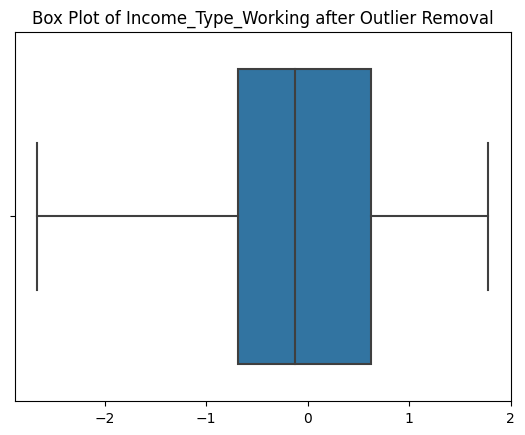

In [170]:
for col in outlier_cols:
    impute_outliers(final_X_test,col)

### Feature Scaling

In [171]:
scaler = StandardScaler()
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=final_selected_features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=final_selected_features)
final_X_train.head()

Total_Good_Debt  Applicant_Gender_M  Income_Type_Working  \
0        -0.195133           -0.817734             1.066935   
1        -0.086274            0.002429            -0.538984   
2        -0.559415            1.428899             1.672969   
3         0.978654            1.134554            -0.195618   
4         0.756659           -0.817734             0.628812   

   Job_Title_Laborers  Family_Status_Married  Total_Income  Total_Children  \
0           -0.861051               1.195992     -1.295071       -0.586742   
1           -0.943732              -0.587060     -0.906060       -0.586742   
2           -0.695689               1.195992     -1.295071       -0.586742   
3           -0.778370               0.542703      0.244060        0.656601   
4           -0.861051               1.110929      0.909121       -0.586742   

   Years_of_Working  Applicant_Age  Income_Type_State servant  
0         -1.598093       0.224016                  -0.291762  
1          0.742813       0.446955                  -0.291762  
2          0.742813      -0.444803                  -0.291762  
3          0.742813      -0.890683                  -0.291762  
4          0.650846       1.673123                  -0.291762

In [172]:
final_X_test.head()

Total_Good_Debt  Applicant_Gender_M  Income_Type_Working  \
0        -0.910736            0.542797            -0.935349   
1         0.612869            1.134554            -0.195618   
2         1.973812           -0.817734            -0.195618   
3         0.124105           -0.817734            -0.538984   
4         1.322548           -0.817734             0.108066   

   Job_Title_Laborers  Family_Status_Married  Total_Income  Total_Children  \
0            0.048440               1.195992     -0.224592       -0.586742   
1            2.115463              -0.969186     -1.295071       -0.586742   
2           -0.778370              -0.969186     -1.295071       -0.586742   
3           -0.943732              -0.969186      0.909121        1.845592   
4            0.957930               1.195992      0.909121        1.845592   

   Years_of_Working  Applicant_Age  Income_Type_State servant  
0          0.742813       1.115774                  -0.291762  
1          0.742813      -0.221864                  -0.291762  
2          0.742813       1.227244                   3.884068  
3         -0.960799      -0.779213                  -0.291762  
4          0.742813       0.781365                  -0.291762

## Model Training & Evaluation

In [173]:
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [174]:
def train_and_evaluate_model(model):
    model.fit(final_X_train,y_train)
    y_pred = model.predict(final_X_test)
    print("Classification Report:")
    print(classification_report(y_test,y_pred))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    PrecisionRecallDisplay.from_predictions(y_test,y_pred)
    RocCurveDisplay.from_predictions(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    recall = recall_score(y_test,y_pred,average='macro')
    f1 = f1_score(y_test,y_pred,average='macro')
    roc_auc = roc_auc_score(y_test,y_pred,average='macro')
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model)
    gc.collect()

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      7468
           1       0.88      0.77      0.82      7540

    accuracy                           0.83     15008
   macro avg       0.83      0.83      0.83     15008
weighted avg       0.84      0.83      0.83     15008

--------------------------------------------------


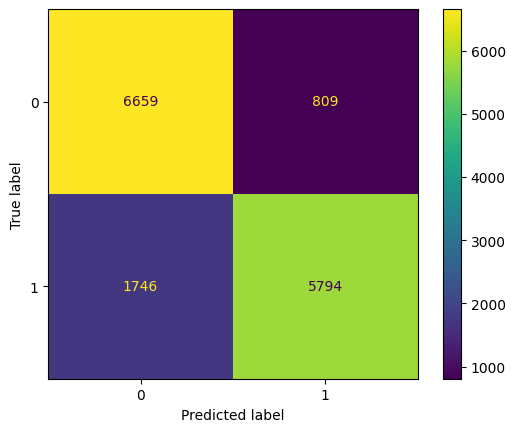

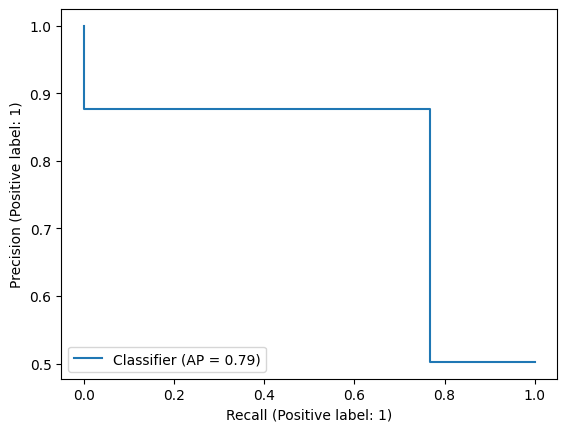

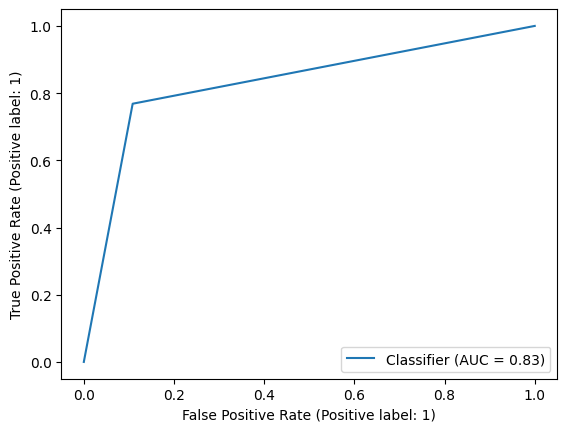

In [175]:
train_and_evaluate_model(LogisticRegression())

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      7468
           1       0.87      0.71      0.78      7540

    accuracy                           0.80     15008
   macro avg       0.81      0.80      0.80     15008
weighted avg       0.81      0.80      0.80     15008

--------------------------------------------------


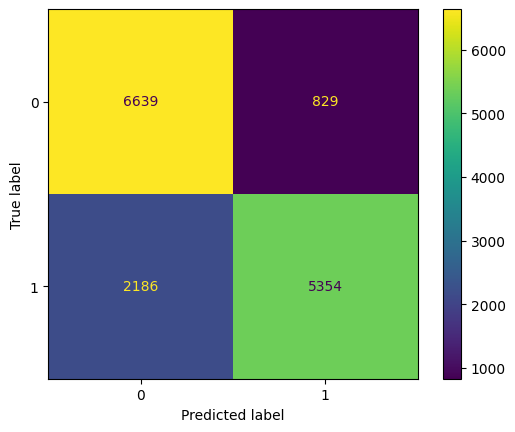

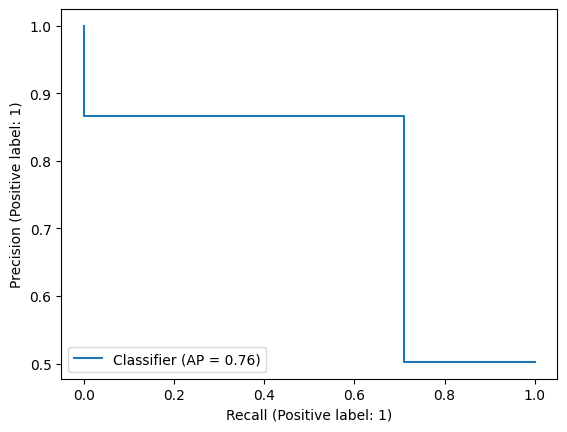

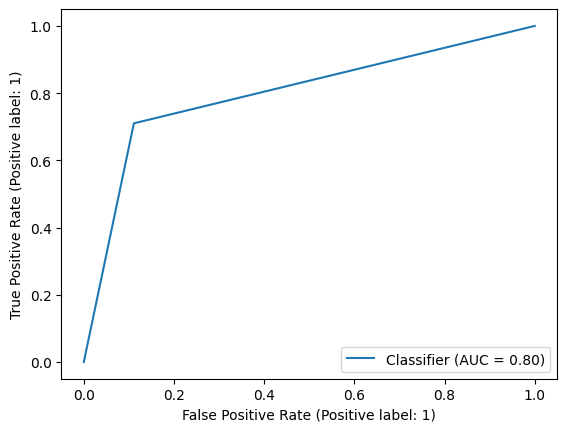

In [176]:
train_and_evaluate_model(PassiveAggressiveClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      7468
           1       0.94      0.68      0.79      7540

    accuracy                           0.81     15008
   macro avg       0.84      0.82      0.81     15008
weighted avg       0.84      0.81      0.81     15008

--------------------------------------------------


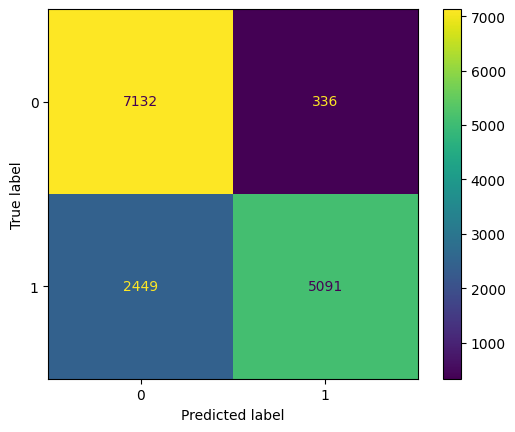

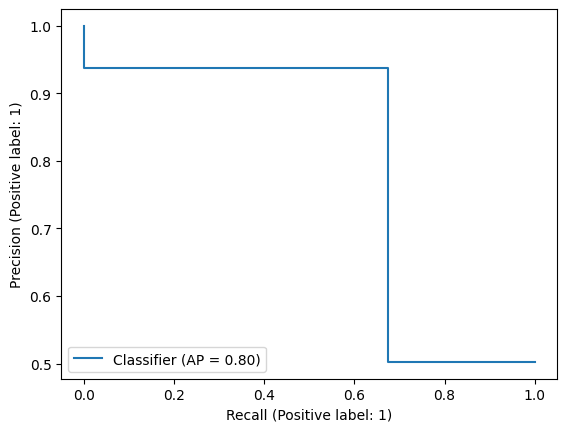

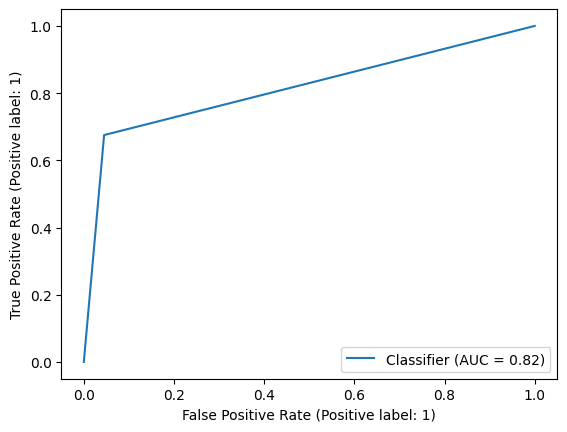

In [177]:
train_and_evaluate_model(RidgeClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      7468
           1       0.84      0.78      0.81      7540

    accuracy                           0.82     15008
   macro avg       0.82      0.82      0.81     15008
weighted avg       0.82      0.82      0.81     15008

--------------------------------------------------


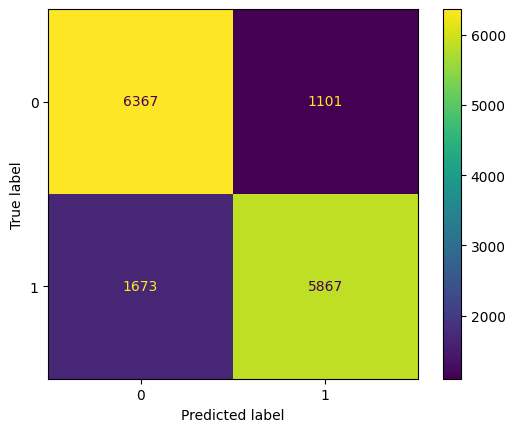

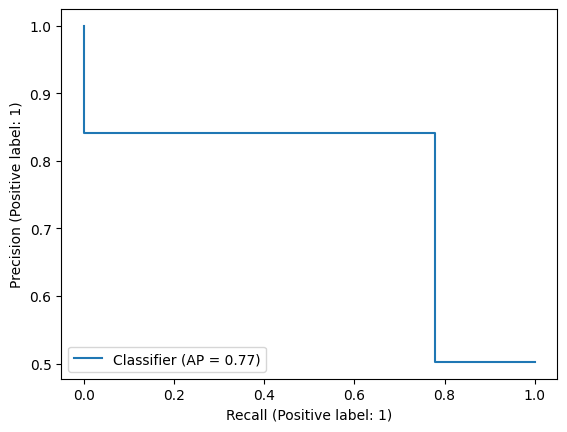

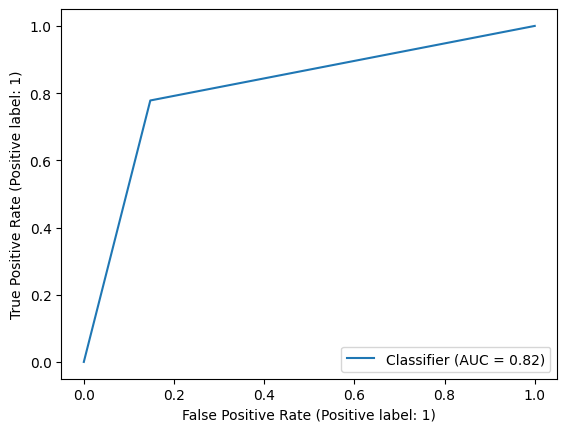

In [178]:
train_and_evaluate_model(SGDClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7468
           1       1.00      0.98      0.99      7540

    accuracy                           0.99     15008
   macro avg       0.99      0.99      0.99     15008
weighted avg       0.99      0.99      0.99     15008

--------------------------------------------------


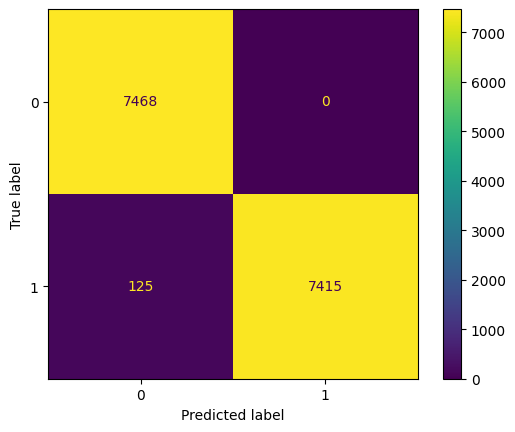

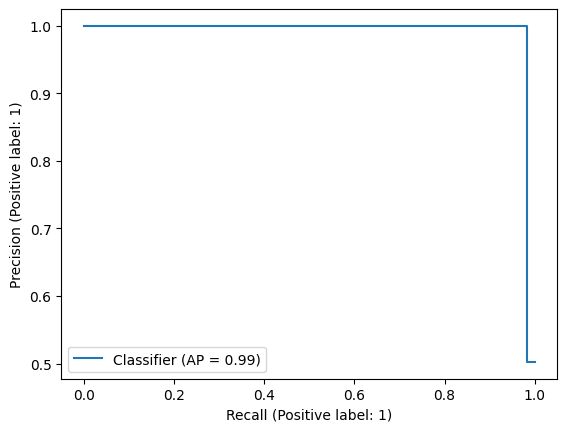

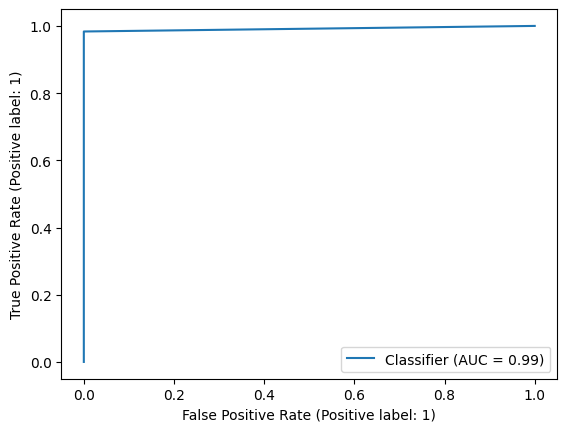

In [179]:
train_and_evaluate_model(KNeighborsClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7468
           1       0.98      0.96      0.97      7540

    accuracy                           0.97     15008
   macro avg       0.97      0.97      0.97     15008
weighted avg       0.97      0.97      0.97     15008

--------------------------------------------------


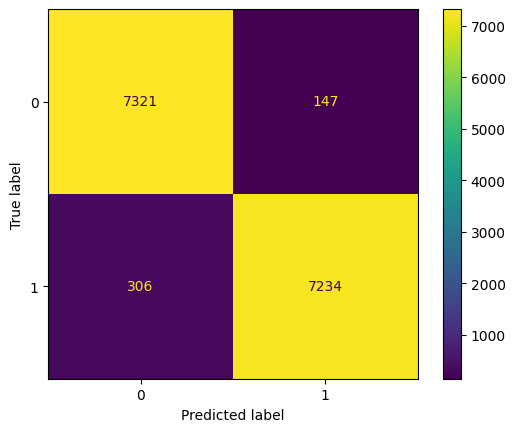

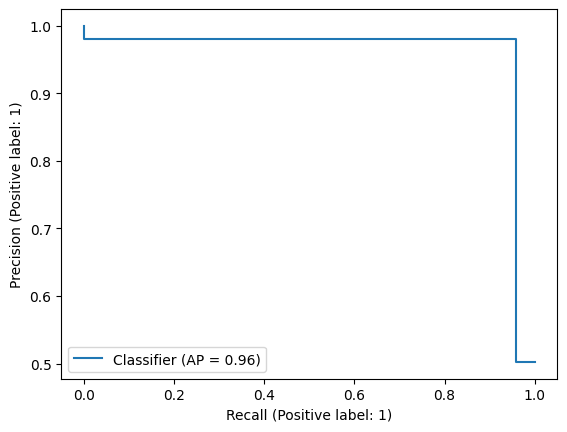

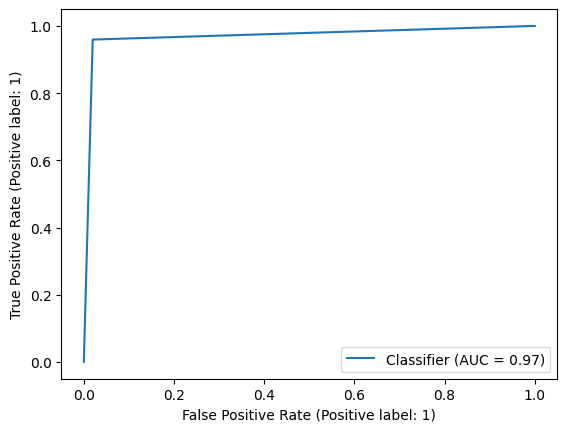

In [181]:
train_and_evaluate_model(SVC())

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7468
           1       0.95      0.81      0.87      7540

    accuracy                           0.88     15008
   macro avg       0.89      0.88      0.88     15008
weighted avg       0.89      0.88      0.88     15008

--------------------------------------------------


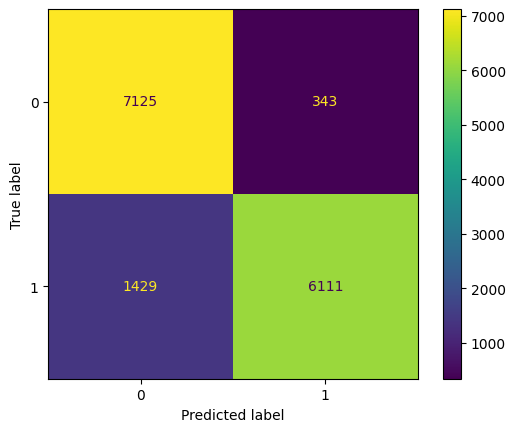

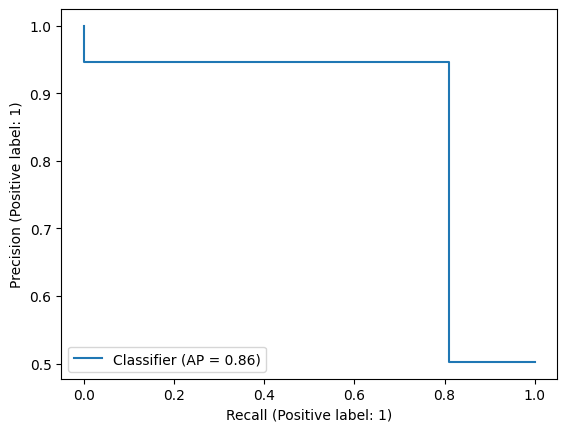

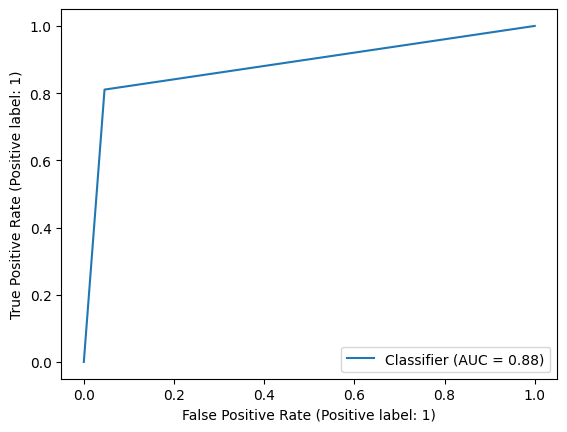

In [182]:
train_and_evaluate_model(NuSVC())

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      7468
           1       0.89      0.76      0.82      7540

    accuracy                           0.83     15008
   macro avg       0.84      0.83      0.83     15008
weighted avg       0.84      0.83      0.83     15008

--------------------------------------------------


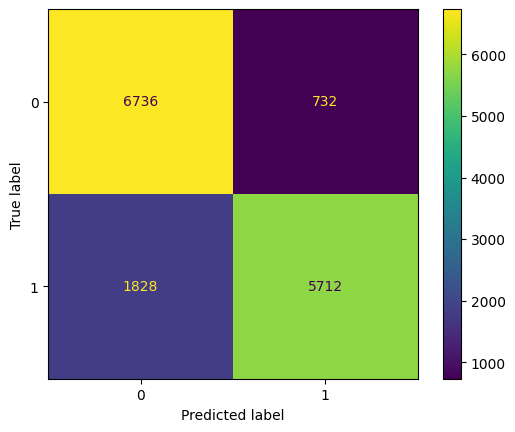

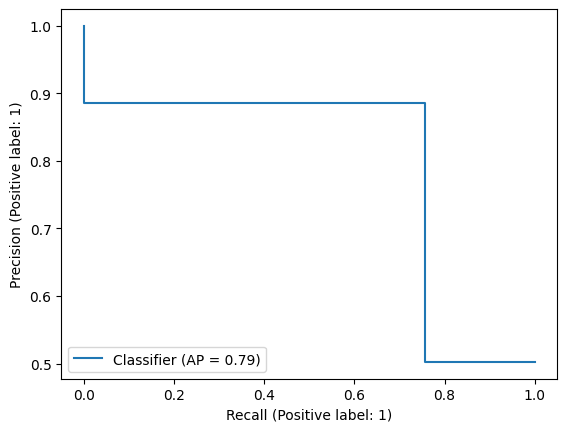

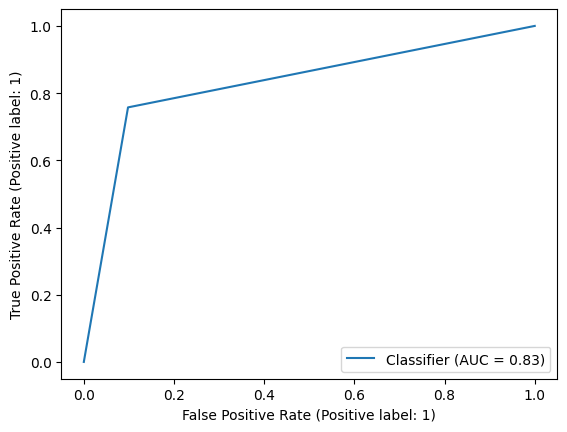

In [183]:
train_and_evaluate_model(LinearSVC())

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7468
           1       0.87      0.69      0.77      7540

    accuracy                           0.79     15008
   macro avg       0.81      0.79      0.79     15008
weighted avg       0.81      0.79      0.79     15008

--------------------------------------------------


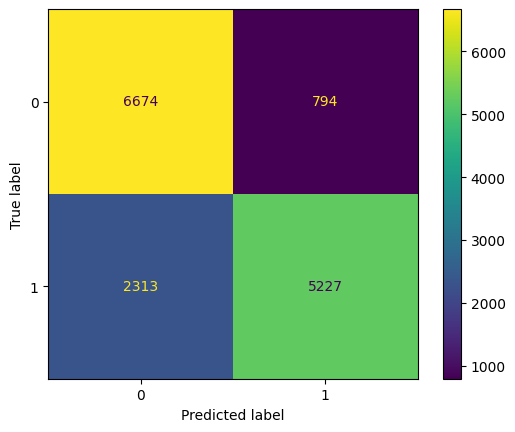

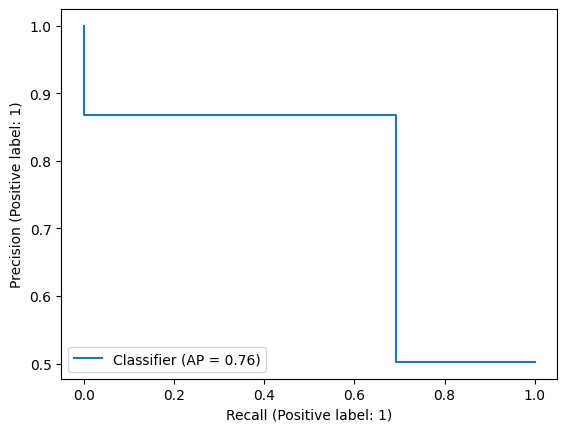

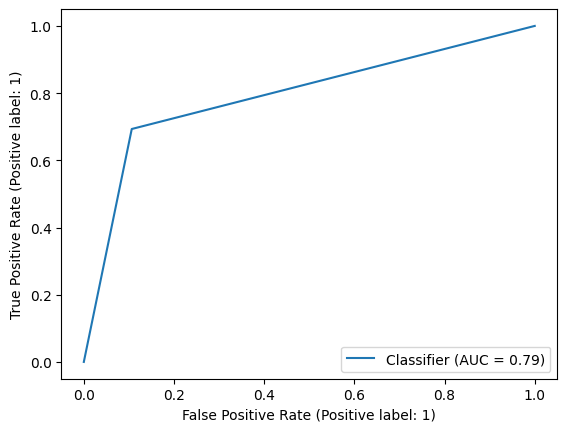

In [184]:
train_and_evaluate_model(GaussianNB())

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      7468
           1       0.88      0.67      0.76      7540

    accuracy                           0.79     15008
   macro avg       0.81      0.79      0.79     15008
weighted avg       0.81      0.79      0.79     15008

--------------------------------------------------


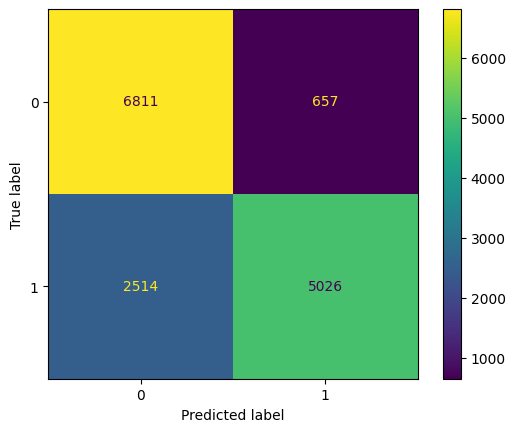

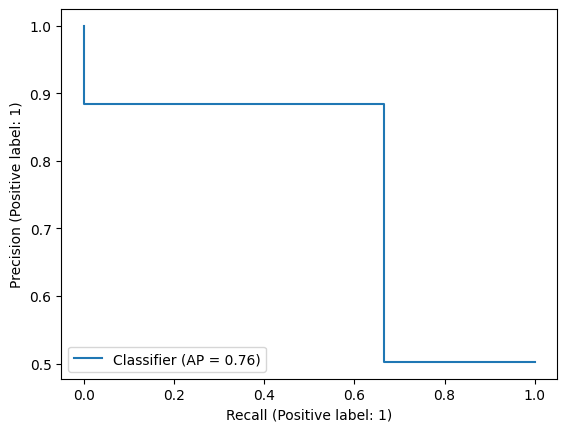

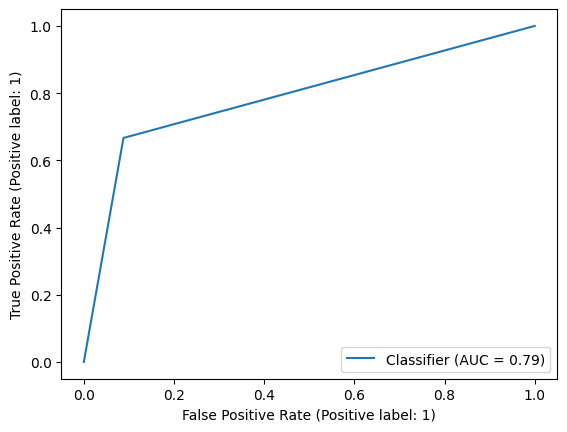

In [185]:
train_and_evaluate_model(BernoulliNB())

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7468
           1       1.00      0.99      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


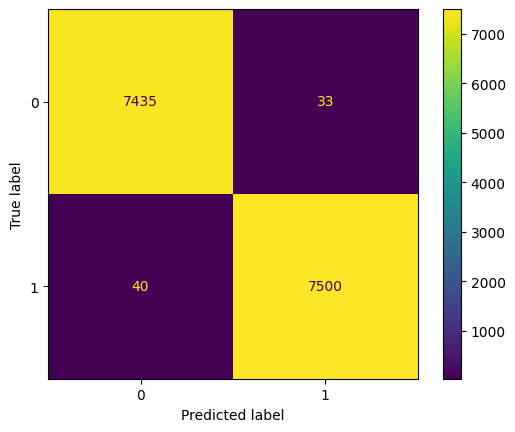

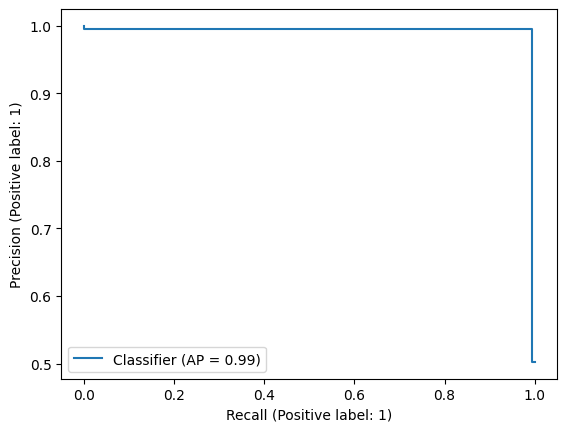

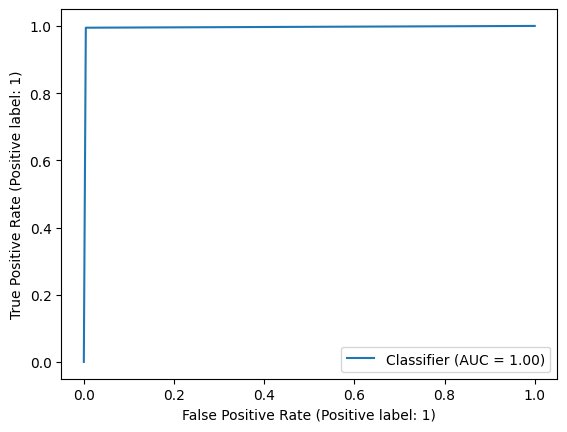

In [186]:
train_and_evaluate_model(DecisionTreeClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7468
           1       0.99      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


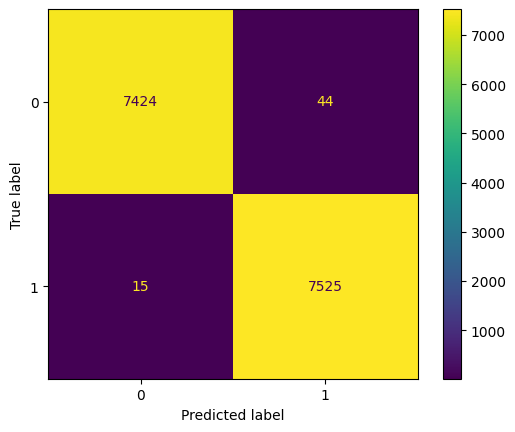

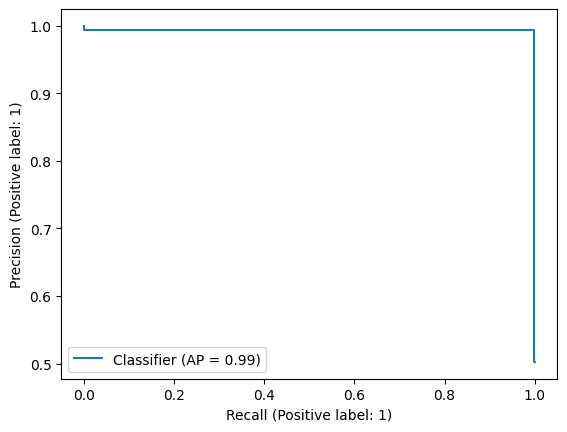

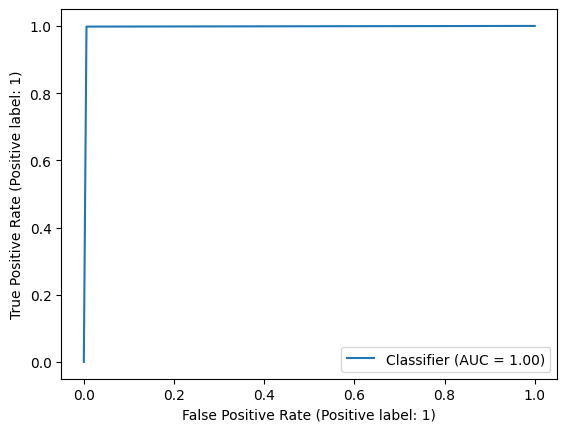

In [187]:
train_and_evaluate_model(RandomForestClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


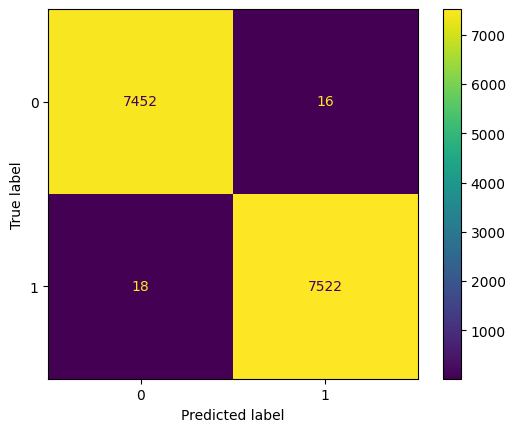

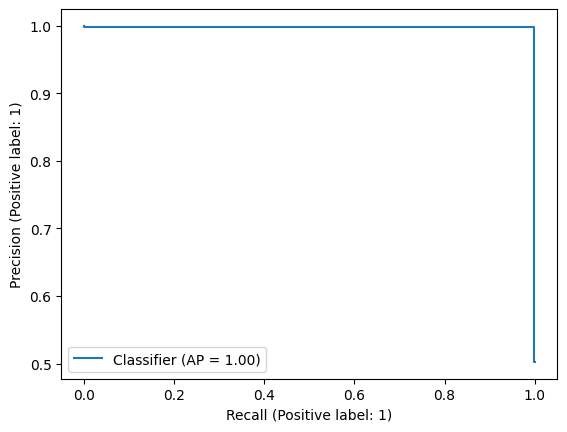

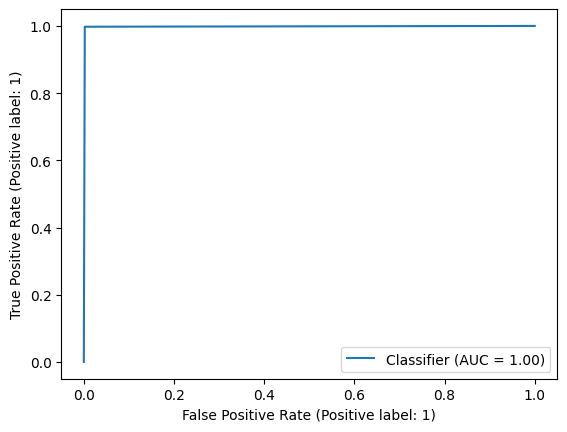

In [188]:
train_and_evaluate_model(ExtraTreesClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


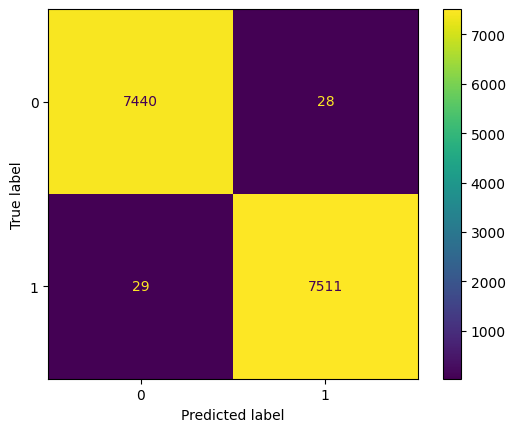

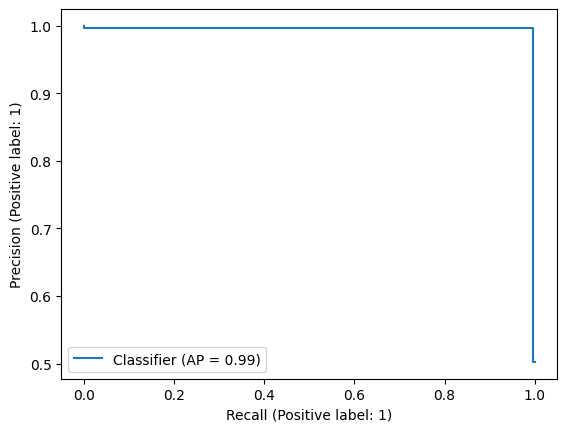

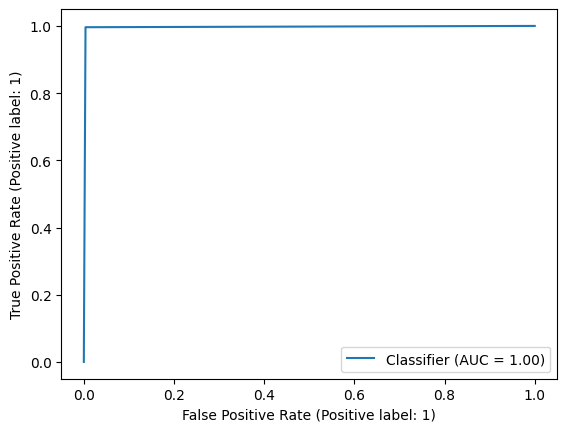

In [189]:
train_and_evaluate_model(BaggingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


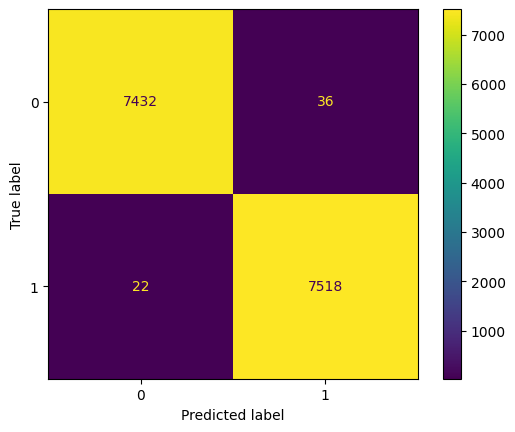

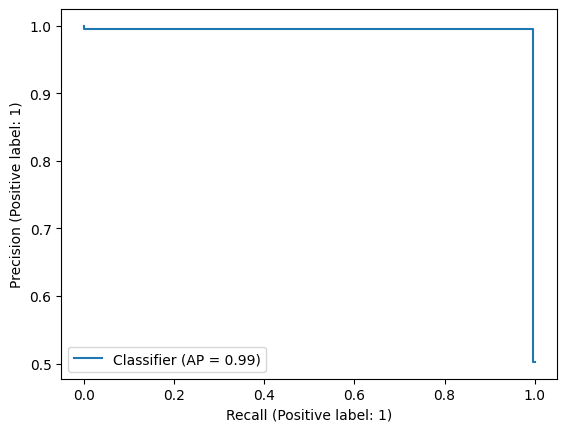

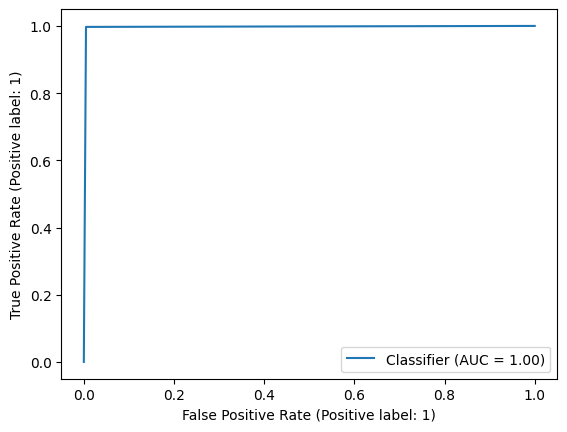

In [190]:
train_and_evaluate_model(HistGradientBoostingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7468
           1       0.96      0.95      0.95      7540

    accuracy                           0.95     15008
   macro avg       0.95      0.95      0.95     15008
weighted avg       0.95      0.95      0.95     15008

--------------------------------------------------


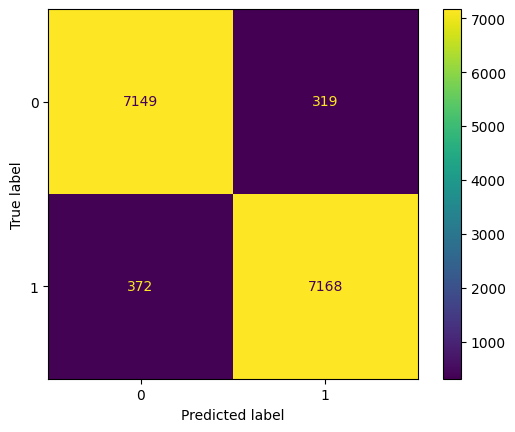

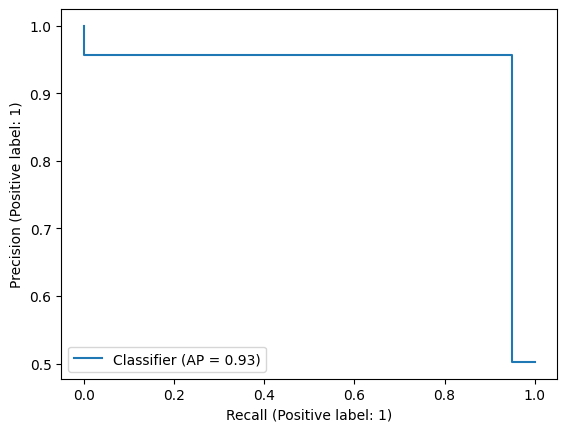

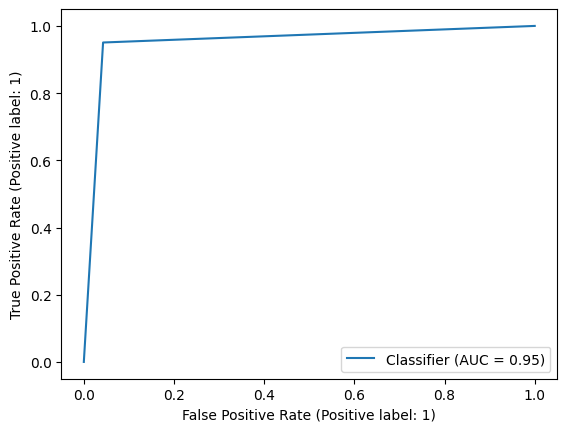

In [191]:
train_and_evaluate_model(AdaBoostClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7468
           1       0.97      0.97      0.97      7540

    accuracy                           0.97     15008
   macro avg       0.97      0.97      0.97     15008
weighted avg       0.97      0.97      0.97     15008

--------------------------------------------------


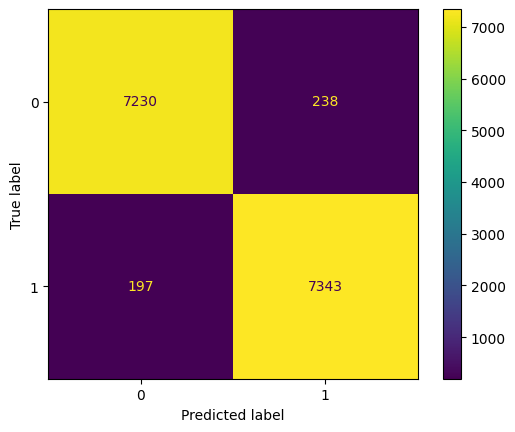

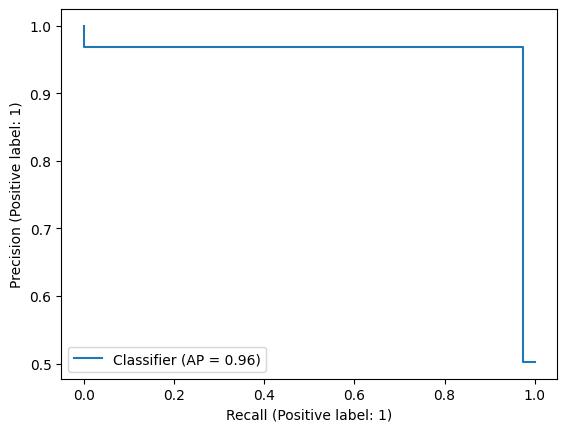

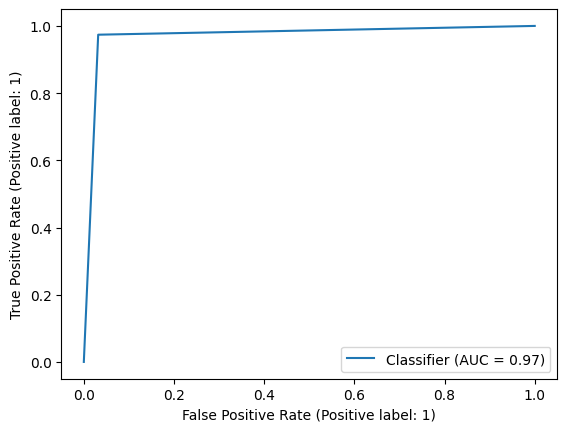

In [192]:
train_and_evaluate_model(GradientBoostingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7468
           1       1.00      0.99      0.99      7540

    accuracy                           0.99     15008
   macro avg       0.99      0.99      0.99     15008
weighted avg       0.99      0.99      0.99     15008

--------------------------------------------------


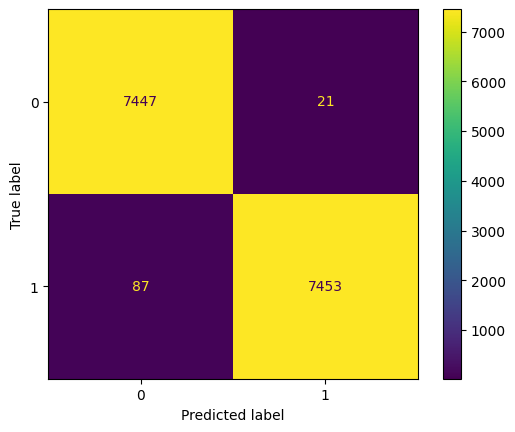

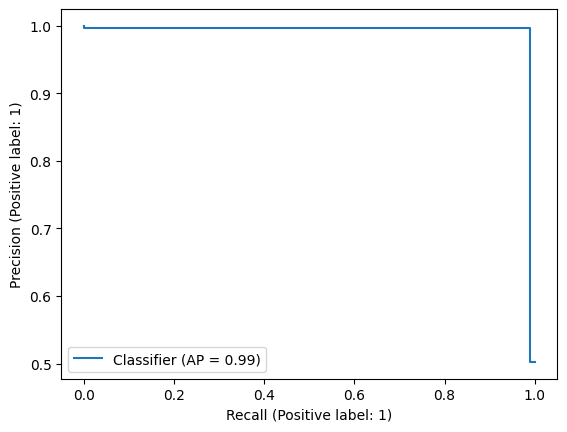

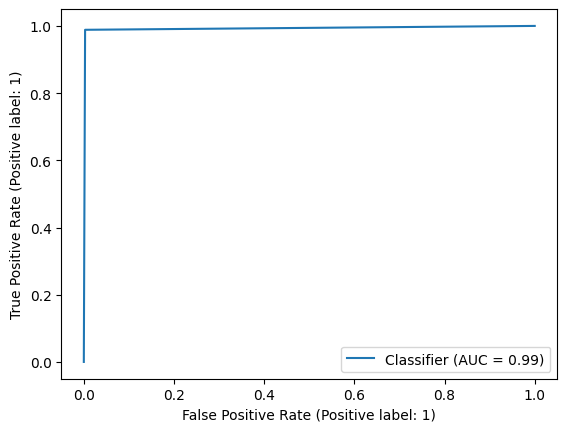

In [193]:
train_and_evaluate_model(MLPClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


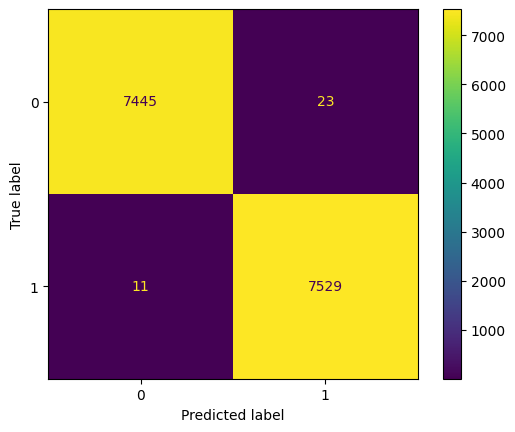

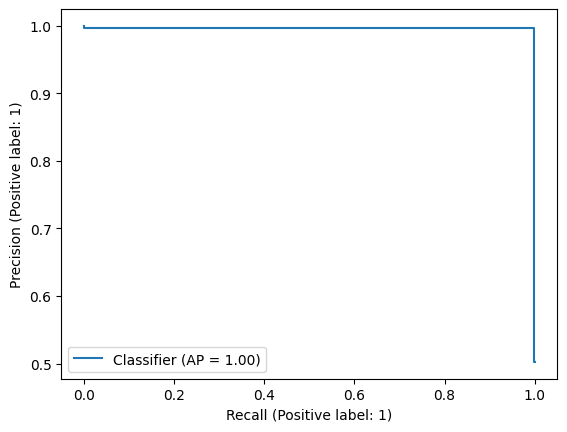

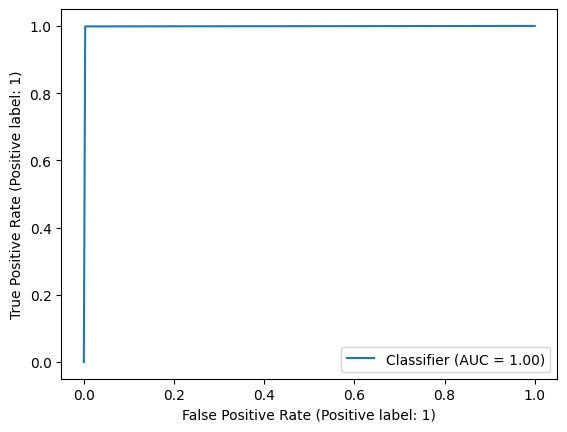

In [194]:
train_and_evaluate_model(XGBClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7468
           1       0.94      0.91      0.92      7540

    accuracy                           0.93     15008
   macro avg       0.93      0.93      0.93     15008
weighted avg       0.93      0.93      0.93     15008

--------------------------------------------------


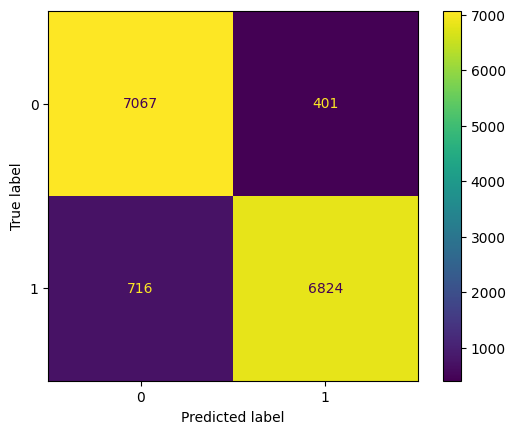

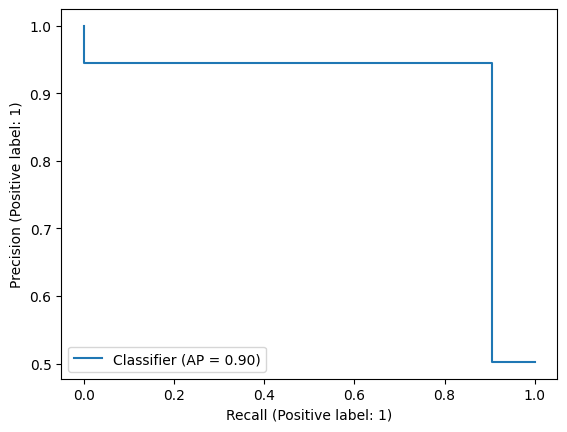

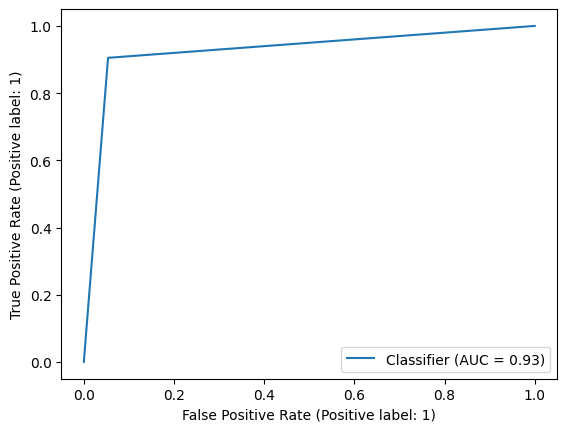

In [195]:
train_and_evaluate_model(XGBRFClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


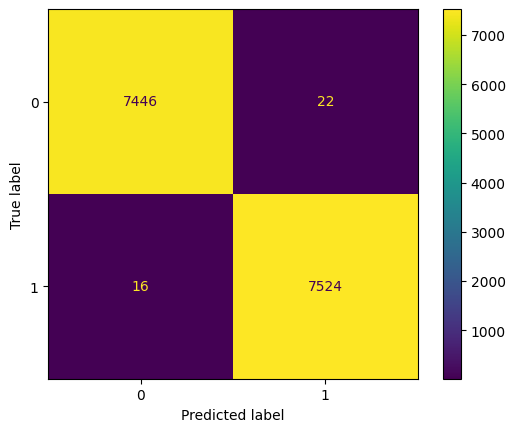

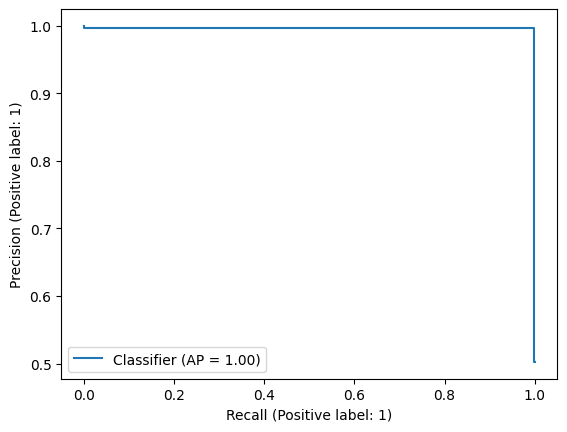

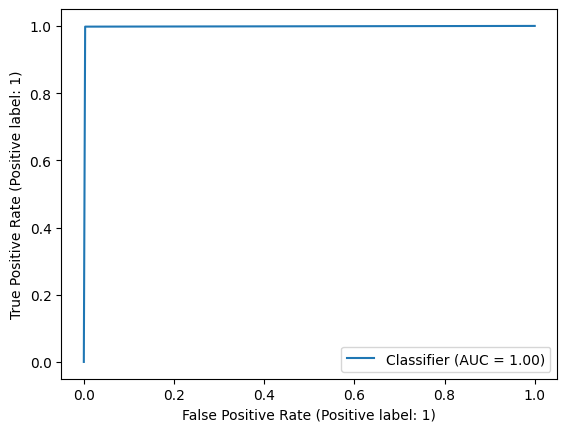

In [196]:
train_and_evaluate_model(LGBMClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


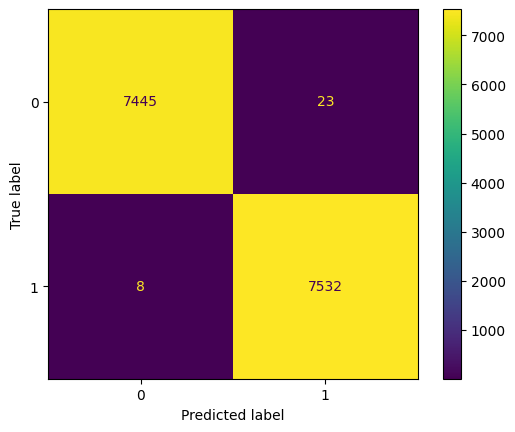

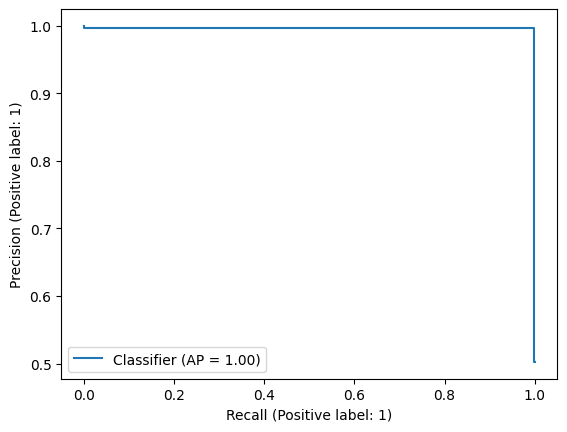

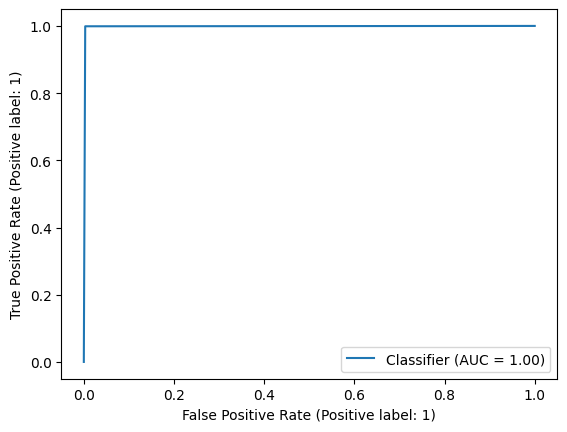

In [197]:
train_and_evaluate_model(CatBoostClassifier(silent=True))

[Voting] ...................... (1 of 4) Processing CAT, total=  10.4s
[Voting] ..................... (2 of 4) Processing LGBM, total=   0.2s
[Voting] ...................... (3 of 4) Processing XGB, total=   1.1s
[Voting] ...................... (4 of 4) Processing HGB, total=   0.9s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


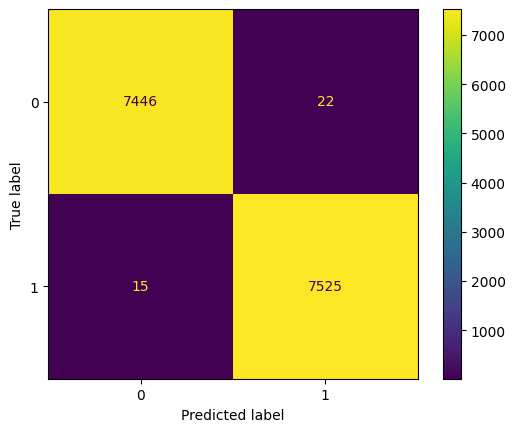

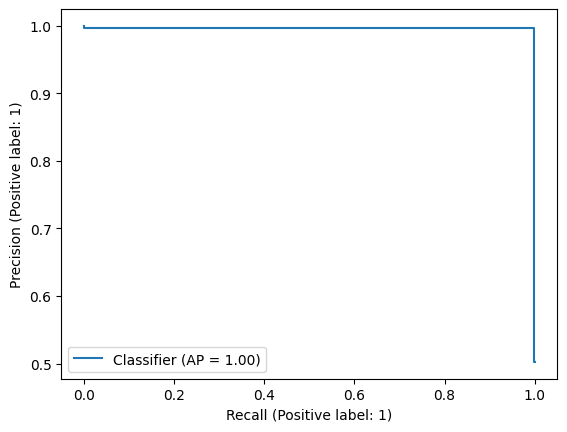

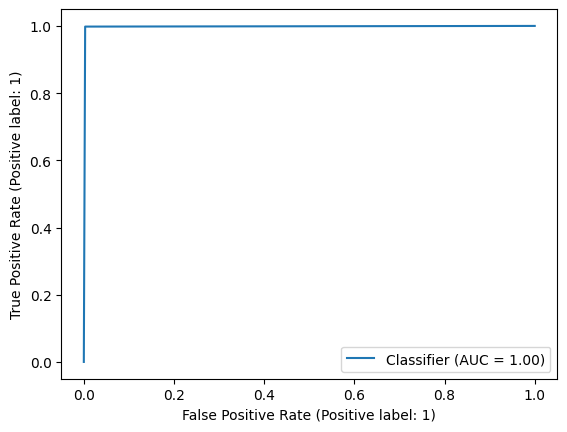

In [198]:
train_and_evaluate_model(VotingClassifier(estimators=[
    ('CAT',CatBoostClassifier(silent=True)),
    ('LGBM',LGBMClassifier()),
    ('XGB',XGBClassifier()),
    ('HGB',HistGradientBoostingClassifier())
],verbose=2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7468
           1       1.00      1.00      1.00      7540

    accuracy                           1.00     15008
   macro avg       1.00      1.00      1.00     15008
weighted avg       1.00      1.00      1.00     15008

--------------------------------------------------


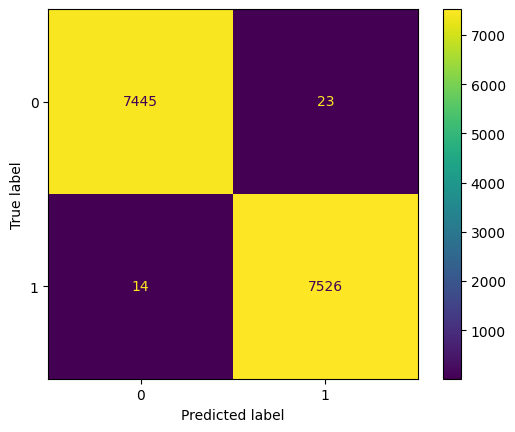

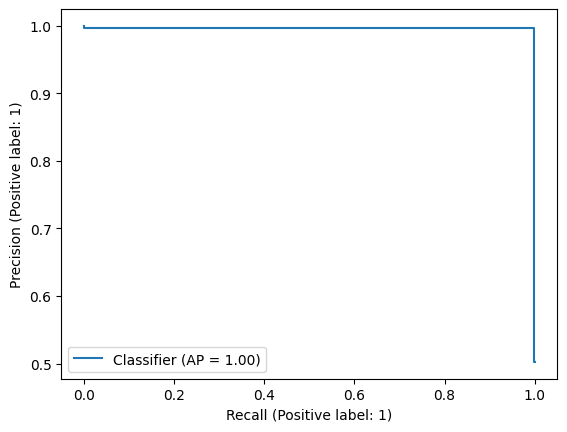

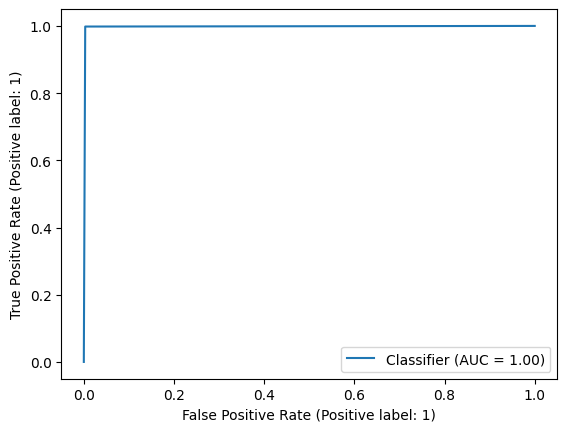

In [199]:
train_and_evaluate_model(StackingClassifier(estimators=[
    ('CAT',CatBoostClassifier(silent=True)),
    ('LGBM',LGBMClassifier()),
    ('XGB',XGBClassifier())
],final_estimator=HistGradientBoostingClassifier(),verbose=2))

## Baseline Models Performance Comparison

In [200]:
model_perfs = pd.DataFrame({'Model': models, 
                            'Accuracy': accuracy_scores, 
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0   <catboost.core.CatBoostClassifier object at 0x...  0.997934   0.997941   
1   (ExtraTreeClassifier(random_state=917412667), ...  0.997735   0.997734   
2   XGBClassifier(base_score=None, booster=None, c...  0.997735   0.997740   
3   VotingClassifier(estimators=[('CAT',\n        ...  0.997535   0.997537   
4   StackingClassifier(estimators=[('CAT',\n      ...  0.997535   0.997538   
5                                    LGBMClassifier()  0.997468   0.997470   
6   (DecisionTreeClassifier(random_state=271472357...  0.996202   0.996202   
7                    HistGradientBoostingClassifier()  0.996135   0.996141   
8   (DecisionTreeClassifier(max_features='auto', r...  0.996069   0.996085   
9                            DecisionTreeClassifier()  0.995136   0.995134   
10                                    MLPClassifier()  0.992804   0.992821   
11                             KNeighborsClassifier()  0.991671   0.991769   
12  ([DecisionTreeRegressor(criterion='friedman_ms...  0.971015   0.971040   
13                                              SVC()  0.969816   0.969982   
14  (DecisionTreeClassifier(max_depth=1, random_st...  0.953958   0.953966   
15  XGBRFClassifier(base_score=None, booster=None,...  0.925573   0.926251   
16                                            NuSVC()  0.881930   0.889899   
17                               LogisticRegression()  0.829757   0.834873   
18                                        LinearSVC()  0.829424   0.836477   
19                                    SGDClassifier()  0.815165   0.816954   
20                                  RidgeClassifier()  0.814432   0.841239   
21                      PassiveAggressiveClassifier()  0.799107   0.809109   
22                                       GaussianNB()  0.792977   0.805378   
23                                      BernoulliNB()  0.788713   0.807397   

      Recall        F1  
0   0.997930  0.997934  
1   0.997735  0.997734  
2   0.997731  0.997734  
3   0.997532  0.997535  
4   0.997532  0.997535  
5   0.997466  0.997468  
6   0.996202  0.996202  
7   0.996131  0.996135  
8   0.996059  0.996069  
9   0.995138  0.995136  
10  0.992825  0.992804  
11  0.991711  0.991671  
12  0.971002  0.971014  
13  0.969866  0.969815  
14  0.953974  0.953958  
15  0.925672  0.925554  
16  0.882274  0.881388  
17  0.830053  0.829190  
18  0.829771  0.828626  
19  0.815344  0.814960  
20  0.815103  0.810936  
21  0.799536  0.797624  
22  0.793458  0.791035  
23  0.789301  0.785681

The Cat Boost Classifier is the best performing model among all the baseline models as it achieves a stupendous accuracy of almost 99.8% on the test set. 

## Hyperparameter Optimization & Cross Validation

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.836 total time=   0.1s
[CV 2/5] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.831 total time=   0.0s
[CV 3/5] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.831 total time=   0.0s
[CV 5/5] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.2, multi_class

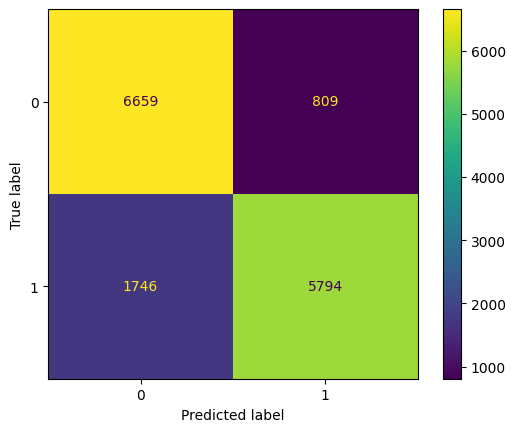

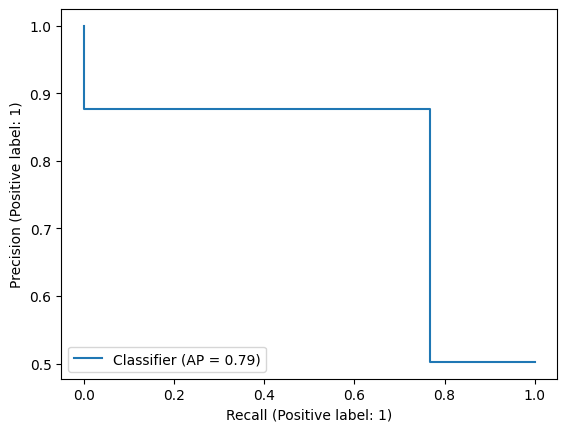

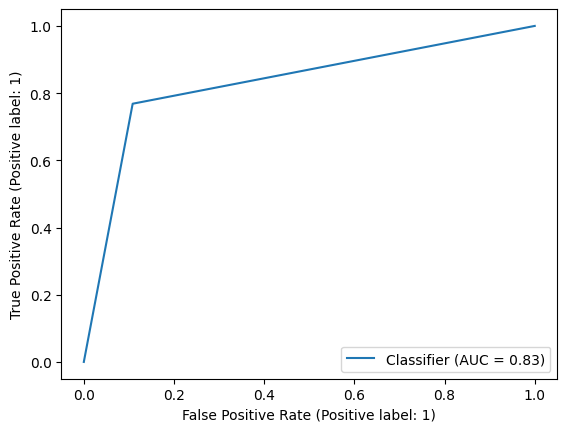

In [201]:
param_grid = {'penalty': ['l1','l2','elasticnet'],
              'C': [0.001,0.01,0.1,0.5],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'l1_ratio': [0.2,0.5,0.8]
             }

grid_lr = RandomizedSearchCV(LogisticRegression(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.001, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.001, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.0001, loss=

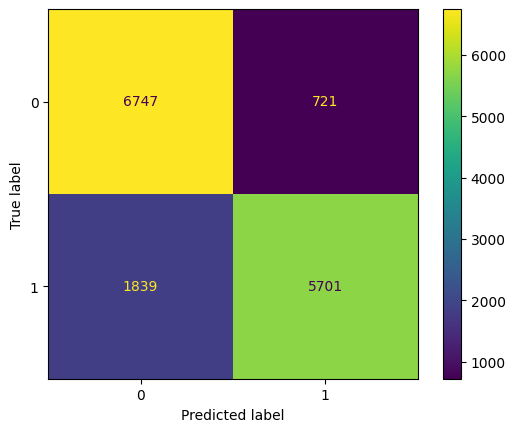

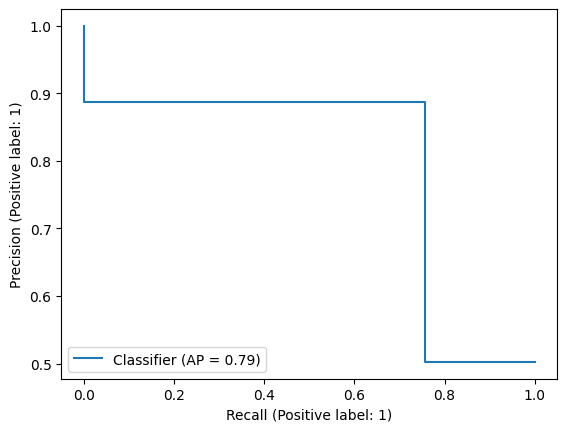

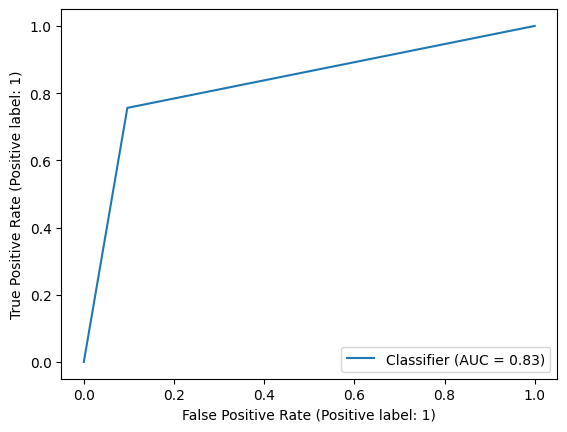

In [202]:
param_grid = {'penalty': ['l1','l2'],
             'loss': ['hinge','squared_hinge'],
             'C': [0.0001,0.001,0.01,0.1,1],
             'multi_class': ['ovr','crammer_singer']}

grid_lsvc = RandomizedSearchCV(LinearSVC(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_lsvc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_features=log2, splitter=random;, score=0.988 total time=   0.0s
[CV 2/5] END criterion=entropy, max_features=log2, splitter=random;, score=0.994 total time=   0.0s
[CV 3/5] END criterion=entropy, max_features=log2, splitter=random;, score=0.991 total time=   0.0s
[CV 4/5] END criterion=entropy, max_features=log2, splitter=random;, score=0.993 total time=   0.0s
[CV 5/5] END criterion=entropy, max_features=log2, splitter=random;, score=0.990 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_features=log2, splitter=best;, score=0.993 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_features=log2, splitter=best;, score=0.994 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_features=log2, splitter=best;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_features=log2, splitter=best;, score=0.993 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_featur

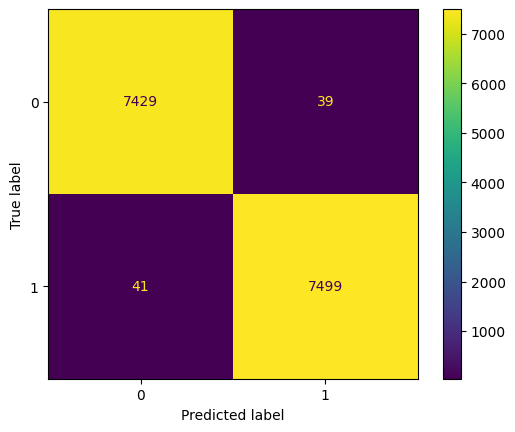

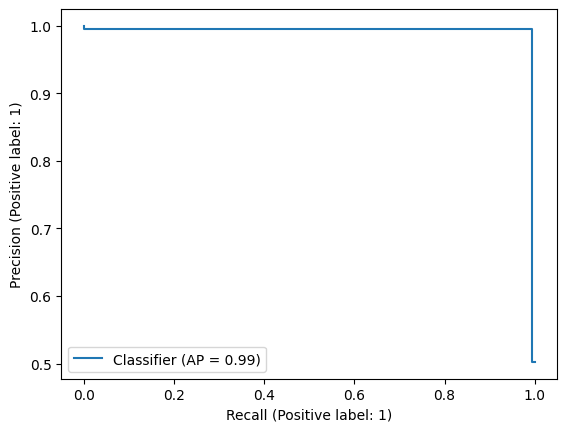

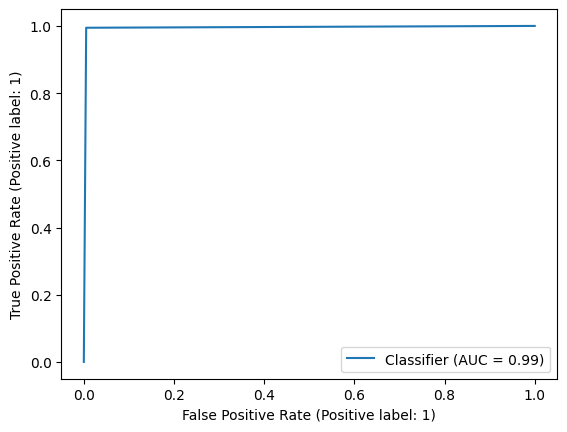

In [206]:
param_grid = {'criterion': ['gini','entropy','log_loss'],
              'splitter': ['best','random'],
              'max_features': ['auto','sqrt','log2']
             }

grid_dt = RandomizedSearchCV(DecisionTreeClassifier(),param_grid,verbose=4,cv=5)
train_and_evaluate_model(grid_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.001, degree=3, gamma=scale, kernel=poly, shrinking=True;, score=0.704 total time=   6.4s
[CV 2/5] END C=0.001, degree=3, gamma=scale, kernel=poly, shrinking=True;, score=0.689 total time=   5.9s
[CV 3/5] END C=0.001, degree=3, gamma=scale, kernel=poly, shrinking=True;, score=0.692 total time=   6.2s
[CV 4/5] END C=0.001, degree=3, gamma=scale, kernel=poly, shrinking=True;, score=0.695 total time=   5.8s
[CV 5/5] END C=0.001, degree=3, gamma=scale, kernel=poly, shrinking=True;, score=0.689 total time=   5.7s
[CV 1/5] END C=0.001, degree=3, gamma=auto, kernel=sigmoid, shrinking=False;, score=0.770 total time=   6.7s
[CV 2/5] END C=0.001, degree=3, gamma=auto, kernel=sigmoid, shrinking=False;, score=0.758 total time=   5.9s
[CV 3/5] END C=0.001, degree=3, gamma=auto, kernel=sigmoid, shrinking=False;, score=0.764 total time=   5.7s
[CV 4/5] END C=0.001, degree=3, gamma=auto, kernel=sigmoid, shrinking=False;, scor

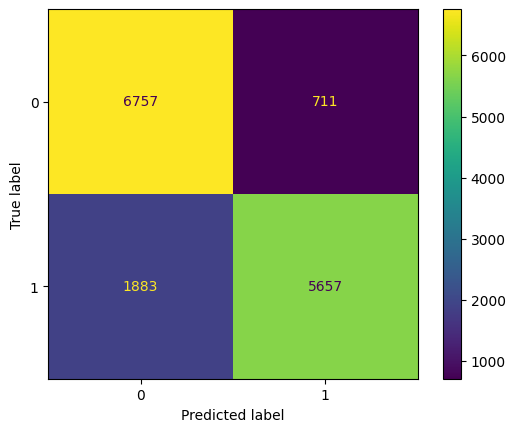

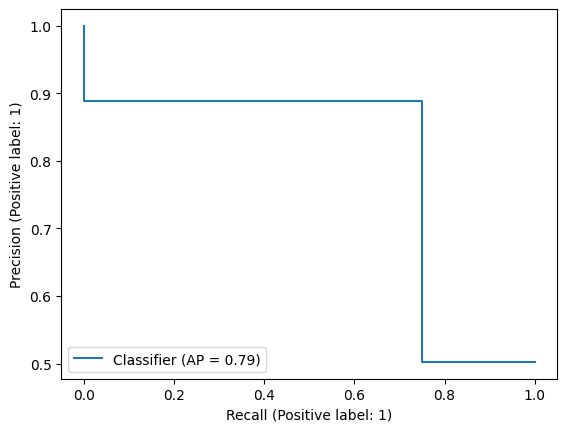

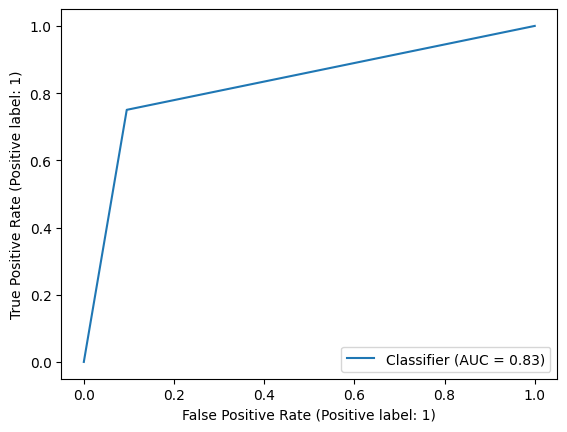

In [207]:
param_grid = {'C': [0.001,0.01,0.1,1,5],
             'gamma': ['scale','auto'],
             'kernel': ['linear','poly','rbf','sigmoid'],
             'degree': [2,3,4,5],
             'shrinking': [True,False]
             }

grid_svm = RandomizedSearchCV(SVC(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_svm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.9s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.9s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.9s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.9s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.8s
[CV] END ...learning_rate=0.2, loss=categorical_crossentropy; total time=   0.0s
[CV] END ...learning_rate=0.2, loss=categorical_crossentropy; total time=   0.0s
[CV] END ...learning_rate=0.2, loss=categorical_crossentropy; total time=   0.0s
[CV] END ...learning_rate=0.2, loss=categorical_crossentropy; total time=   0.0s
[CV] END ...learning_rate=0.2, loss=categorical_crossentropy; total time=   0.0s
[CV] END ........learning_rate=0.4, loss=binary_crossentropy; total time=   0.5s
[CV] END ........learning_rate=0.4, loss=binary_

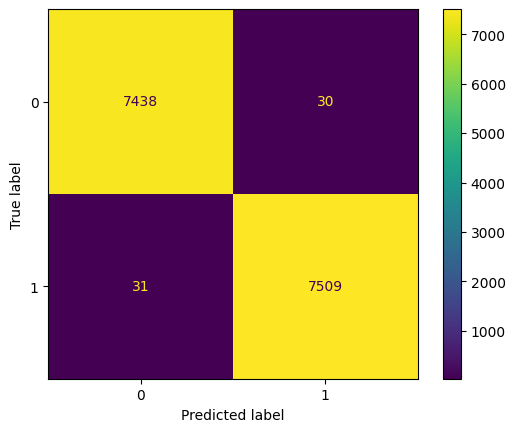

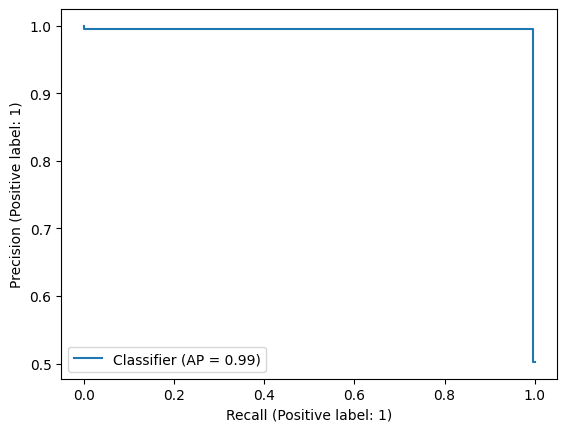

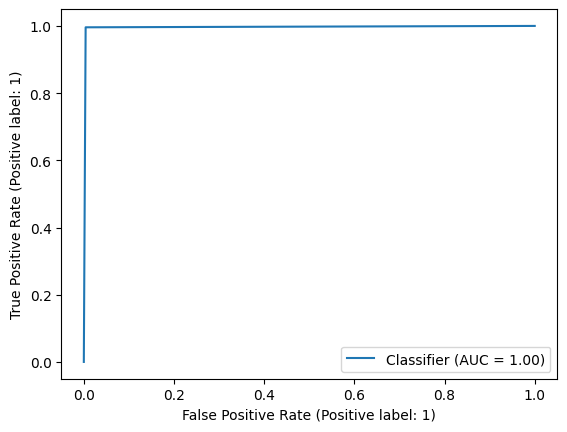

In [208]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['binary_crossentropy', 'categorical_crossentropy']}

grid_hgb = RandomizedSearchCV(HistGradientBoostingClassifier(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_hgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=5, 

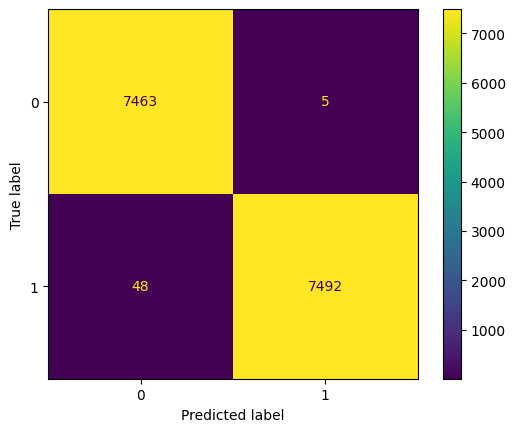

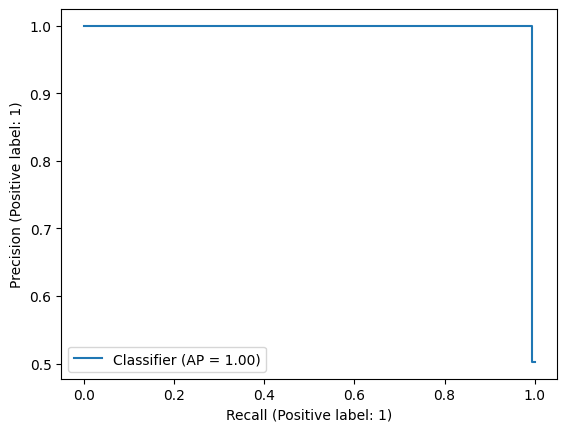

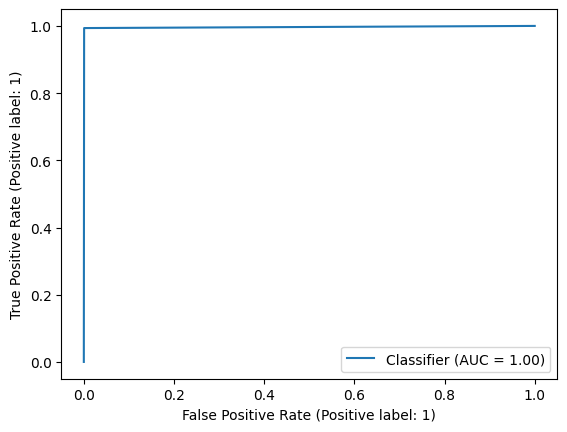

In [209]:
param_grid = {'n_neighbors': [2,5,8,12,20],
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski','manhattan','euclidean','chebyshev']
             }

grid_knn = RandomizedSearchCV(KNeighborsClassifier(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=log2, n_estimators=1000, oob_score=False; total time=  47.8s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=log2, n_estimators=1000, oob_score=False; total time=  47.8s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=log2, n_estimators=1000, oob_score=False; total time=  47.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=log2, n_estimators=1000, oob_score=False; total time=  47.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_features=log2, n_estimators=1000, oob_score=False; total time=  47.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=1000, oob_score=False; total time=  50.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=l

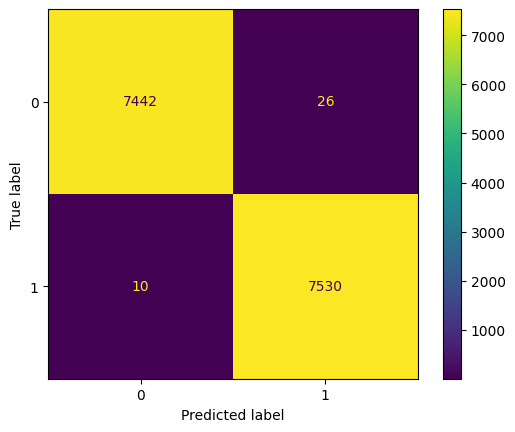

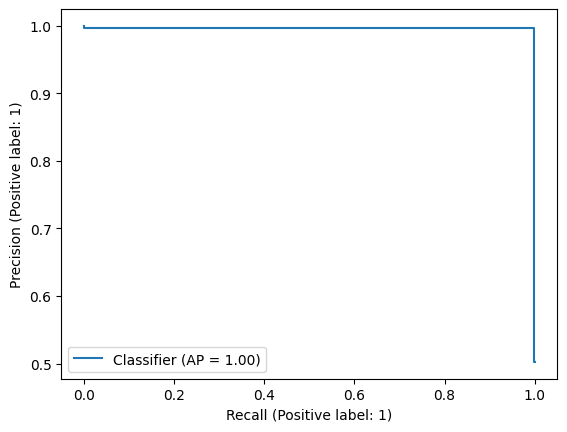

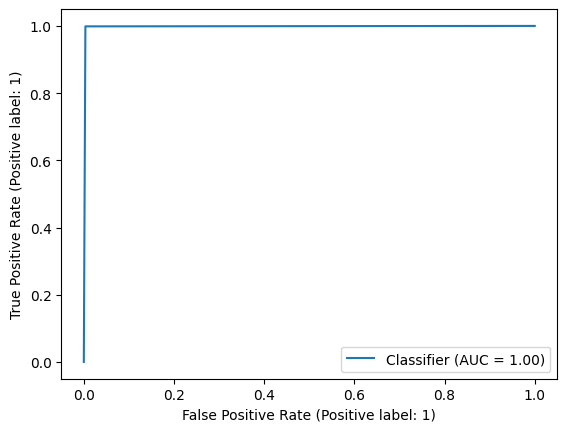

In [211]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy','log_loss'],
              'max_features': ['auto','sqrt','log2'],
              'bootstrap': [True,False],
              'oob_score': [True,False],
              'class_weight': ['balanced','balanced_subsample']}

grid_rf = RandomizedSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=absolute_error, learning_rate=0.2, loss=exponential, max_features=auto, n_estimators=800;, score=nan total time=   0.0s
[CV 2/5] END criterion=absolute_error, learning_rate=0.2, loss=exponential, max_features=auto, n_estimators=800;, score=nan total time=   0.0s
[CV 3/5] END criterion=absolute_error, learning_rate=0.2, loss=exponential, max_features=auto, n_estimators=800;, score=nan total time=   0.0s
[CV 4/5] END criterion=absolute_error, learning_rate=0.2, loss=exponential, max_features=auto, n_estimators=800;, score=nan total time=   0.0s
[CV 5/5] END criterion=absolute_error, learning_rate=0.2, loss=exponential, max_features=auto, n_estimators=800;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.7, loss=deviance, max_features=log2, n_estimators=100;, score=0.996 total time=   2.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.7, loss=deviance, max_features=

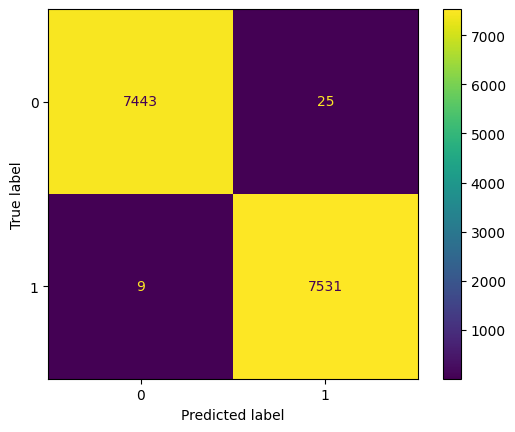

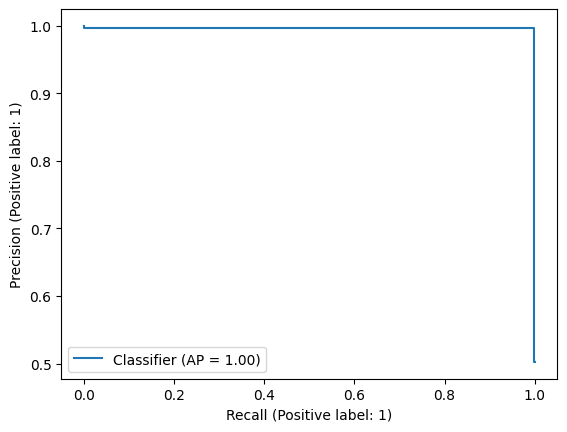

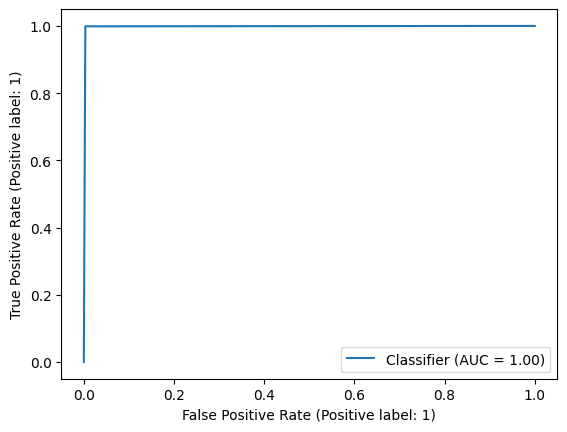

In [212]:
param_grid = {'loss': ['log_loss','deviance','exponential'],
              'n_estimators': [100,400,800,1000],
              'learning_rate': [0.2,0.4,0.7,1],
              'criterion': ['absolute_error','friedman_mse', 'squared_error'],
              'max_features': ['auto','sqrt','log2']
             }

grid_gb = RandomizedSearchCV(GradientBoostingClassifier(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_gb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................learning_rate=0.4, n_estimators=200; total time=   3.4s
[CV] END ................learning_rate=0.4, n_estimators=200; total time=   3.7s
[CV] END ................learning_rate=0.4, n_estimators=200; total time=   3.6s
[CV] END ................learning_rate=0.4, n_estimators=200; total time=   3.4s
[CV] END ................learning_rate=0.4, n_estimators=200; total time=   3.3s
[CV] END ...............learning_rate=0.4, n_estimators=1000; total time=  12.8s
[CV] END ...............learning_rate=0.4, n_estimators=1000; total time=  12.2s
[CV] END ...............learning_rate=0.4, n_estimators=1000; total time=  12.4s
[CV] END ...............learning_rate=0.4, n_estimators=1000; total time=  12.6s
[CV] END ...............learning_rate=0.4, n_estimators=1000; total time=  12.6s
[CV] END ..................learning_rate=1, n_estimators=500; total time=   6.6s
[CV] END ..................learning_rate=1, n_es

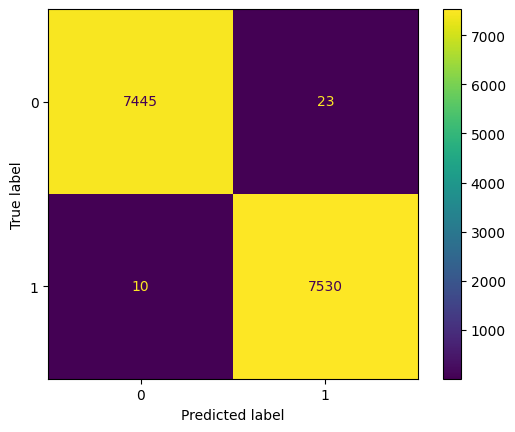

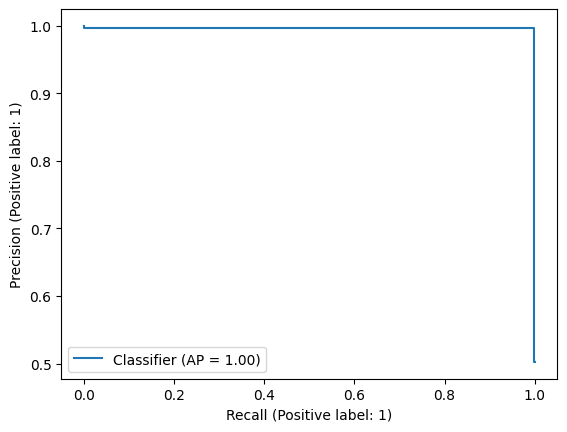

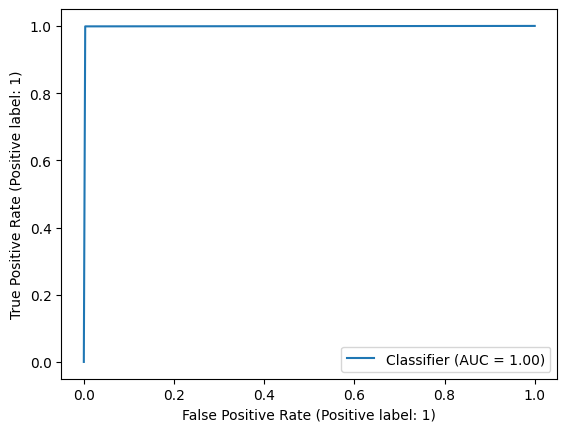

In [213]:
param_grid = {'learning_rate': [0.2,0.4,0.7,1],
              'n_estimators': [200,500,1000]
             }

grid_cat = RandomizedSearchCV(CatBoostClassifier(silent=True),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_features=1.0, max_samples=0.0, n_estimators=1000, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=1.0, max_samples=0.0, n_estimators=1000, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=1.0, max_samples=0.0, n_estimators=1000, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=1.0, max_samples=0.0, n_estimators=1000, oob_score=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=1.0, max_samples=0.0, n_estimators=1000, oob_score=True;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=0.25, max_samples=0.75, n_estimators=800, oob_score=False;, score=0.975 total time=  24.1s
[CV 2/5] END bootstrap=True, max_features=0.25, max_samples=0.75, n_estimators=800, oob_score=False;, score=0.971 total time=  24.4s
[CV 3/5] END bootstrap=True,

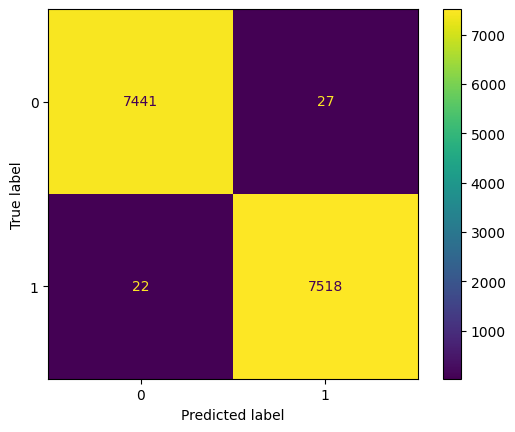

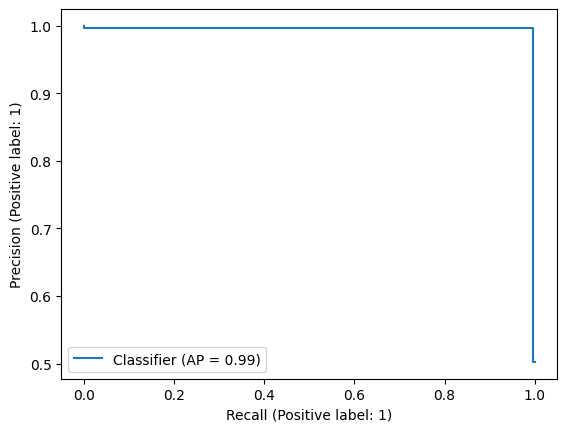

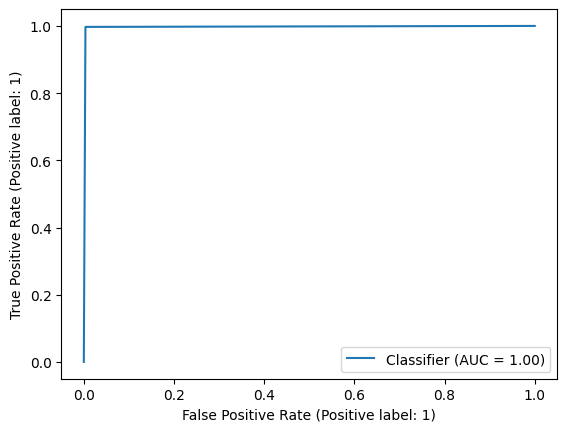

In [214]:
param_grid = {'n_estimators': [200,500,800,1000],
              'max_samples': [0.24,0.58,0.71,0.96],
              'max_features': np.linspace(0,1,5),
              'max_samples': np.linspace(0,1,5),
              'bootstrap': [True,False],
              'oob_score': [True,False]
             }

grid_bag = RandomizedSearchCV(BaggingClassifier(),param_grid,verbose=4)
train_and_evaluate_model(grid_bag)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END boosting_type=goss, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=0.68, n_estimators=500;, score=0.996 total time=   0.7s
[CV 2/5] END boosting_type=goss, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=0.68, n_estimators=500;, score=0.997 total time=   0.7s
[CV 3/5] END boosting_type=goss, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=0.68, n_estimators=500;, score=0.997 total time=   0.7s
[CV 4/5] END boosting_type=goss, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=0.68, n_estimators=500;, score=0.997 total time=   0.7s
[CV 5/5] END boosting_type=goss, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=0.68, n_estimators=500;, score=0.997 total time=   0.7s
[CV 1/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=0.87, n_estimators=500;, score=0.843 total time=  

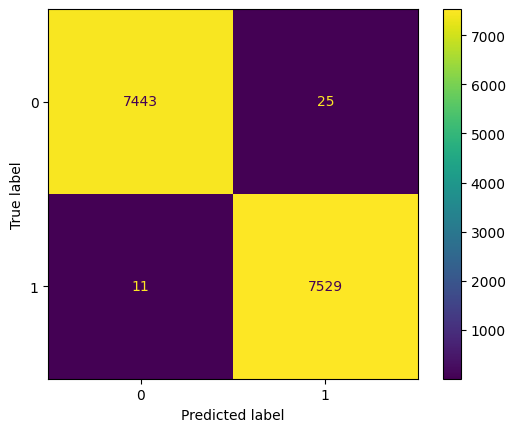

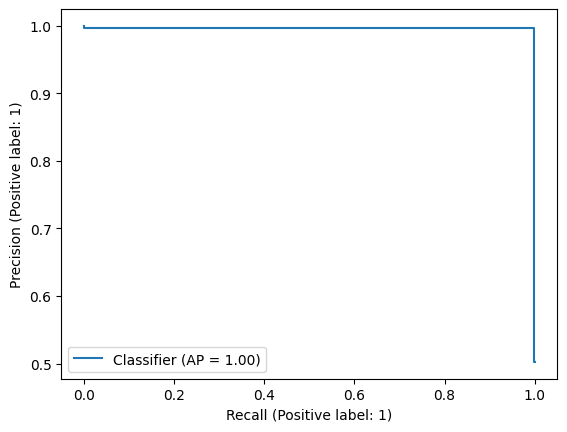

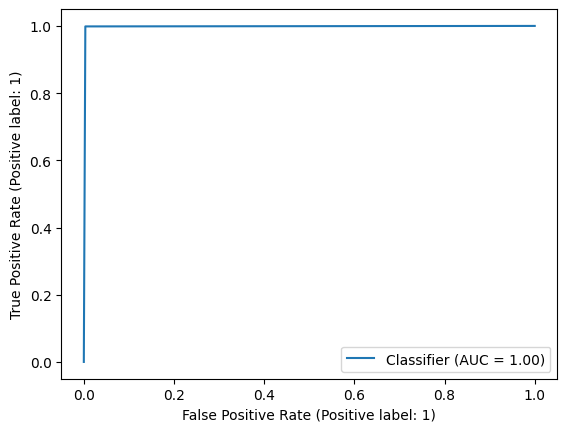

In [215]:
param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
              'learning_rate': np.linspace(0,1,6)[1:],
              'n_estimators': [200,500,600,1000],
              'importance_type': ['split','gain'],
              'min_split_gain': [0.68,0.79,0.87,1]}

grid_lgbm = RandomizedSearchCV(LGBMClassifier(),param_grid,verbose=3)
train_and_evaluate_model(grid_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=auto, max_samples=0.4, n_estimators=1000, oob_score=False, warm_start=False;, score=0.997 total time=  22.8s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=auto, max_samples=0.4, n_estimators=1000, oob_score=False, warm_start=False;, score=0.997 total time=  22.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=auto, max_samples=0.4, n_estimators=1000, oob_score=False, warm_start=False;, score=0.996 total time=  22.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=auto, max_samples=0.4, n_estimators=1000, oob_score=False, warm_start=False;, score=0.996 total time=  22.8s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=auto, max_samples=0.4, n_estimators=1000, oob_score=False, warm_start=False;, score

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, max_samples=0.4, n_estimators=100, oob_score=False, warm_start=False;, score=0.997 total time=   2.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, max_samples=0.4, n_estimators=100, oob_score=False, warm_start=False;, score=0.997 total time=   2.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, max_samples=0.4, n_estimators=100, oob_score=False, warm_start=False;, score=0.997 total time=   2.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, max_samples=0.4, n_estimators=100, oob_score=False, warm_start=False;, score=0.996 total time=   2.6s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, max_samples=0.4, n_estimators=100, oob_score=False, warm_start=False;, score=0.998 total time=   1.6s
Classification Report:
              precision    recal

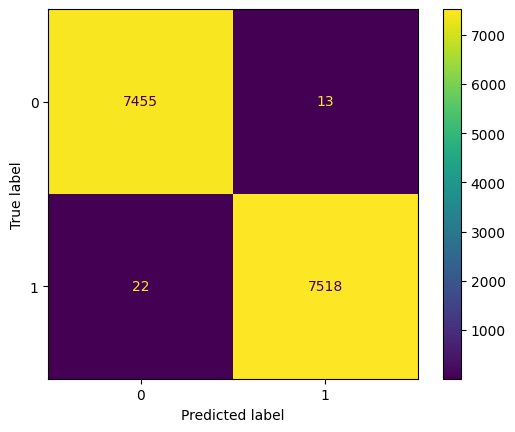

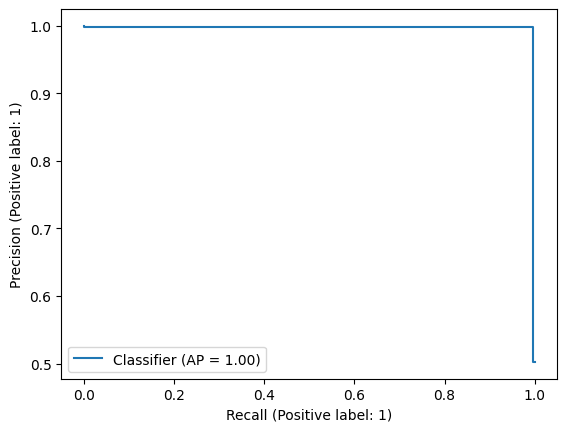

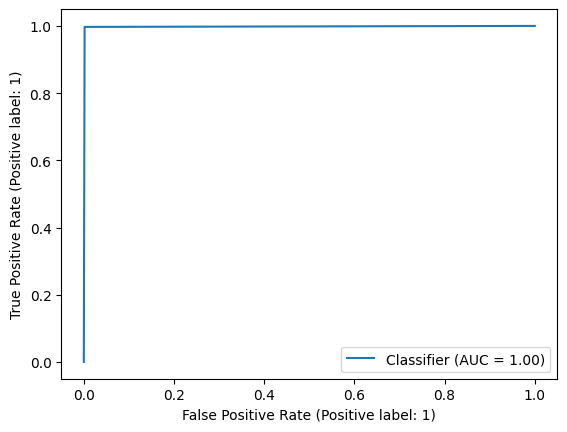

In [216]:
param_grid = {'n_estimators': [100,300,600,1000],
             'criterion': ['gini','entropy','log_loss'],
             'max_features': ['auto','sqrt','log2'],
             'bootstrap': [True,False],
             'class_weight': ['balanced','balanced_subsample'],
             'oob_score': [True,False],
             'warm_start': [True,False],
             'max_samples': [0.2,0.4,0.7,1]
             }

grid_et = RandomizedSearchCV(ExtraTreesClassifier(),param_grid,verbose=4)
train_and_evaluate_model(grid_et)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.2, binarize=0.75, fit_prior=False;, score=0.735 total time=   0.0s
[CV 2/5] END alpha=0.2, binarize=0.75, fit_prior=False;, score=0.735 total time=   0.0s
[CV 3/5] END alpha=0.2, binarize=0.75, fit_prior=False;, score=0.736 total time=   0.0s
[CV 4/5] END alpha=0.2, binarize=0.75, fit_prior=False;, score=0.734 total time=   0.0s
[CV 5/5] END alpha=0.2, binarize=0.75, fit_prior=False;, score=0.728 total time=   0.0s
[CV 1/5] END alpha=0.4, binarize=0.25, fit_prior=False;, score=0.784 total time=   0.0s
[CV 2/5] END alpha=0.4, binarize=0.25, fit_prior=False;, score=0.774 total time=   0.0s
[CV 3/5] END alpha=0.4, binarize=0.25, fit_prior=False;, score=0.782 total time=   0.0s
[CV 4/5] END alpha=0.4, binarize=0.25, fit_prior=False;, score=0.783 total time=   0.0s
[CV 5/5] END alpha=0.4, binarize=0.25, fit_prior=False;, score=0.774 total time=   0.0s
[CV 1/5] END alpha=0.6000000000000001, binarize=0.25, fit_p

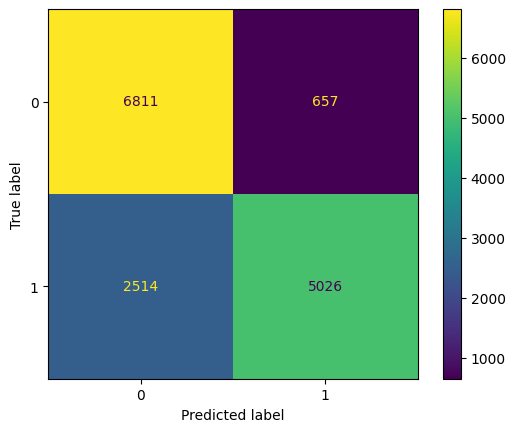

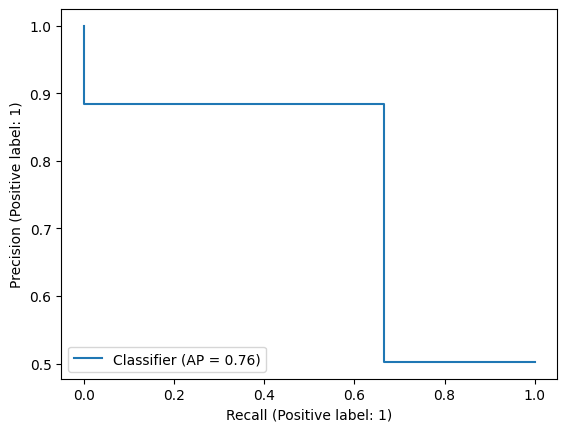

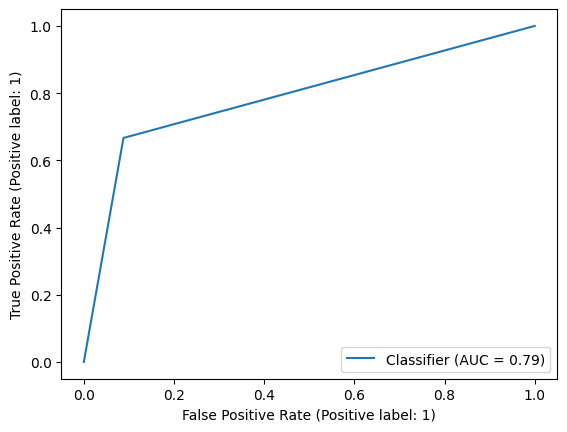

In [217]:
param_grid = {'alpha': np.linspace(0,1,6),
              'binarize': np.linspace(0,1,5),
              'fit_prior': [True,False]
             }

grid_bnb = RandomizedSearchCV(BernoulliNB(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_bnb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.75, fit_intercept=False, positive=False, solver=saga; total time=   0.2s
[CV] END alpha=0.75, fit_intercept=False, positive=False, solver=saga; total time=   0.2s
[CV] END alpha=0.75, fit_intercept=False, positive=False, solver=saga; total time=   0.2s
[CV] END alpha=0.75, fit_intercept=False, positive=False, solver=saga; total time=   0.2s
[CV] END alpha=0.75, fit_intercept=False, positive=False, solver=saga; total time=   0.2s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.25, fit

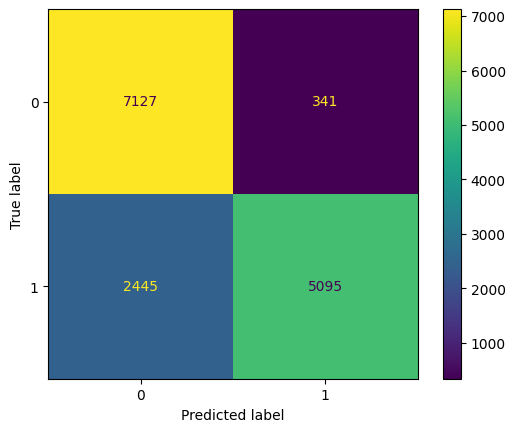

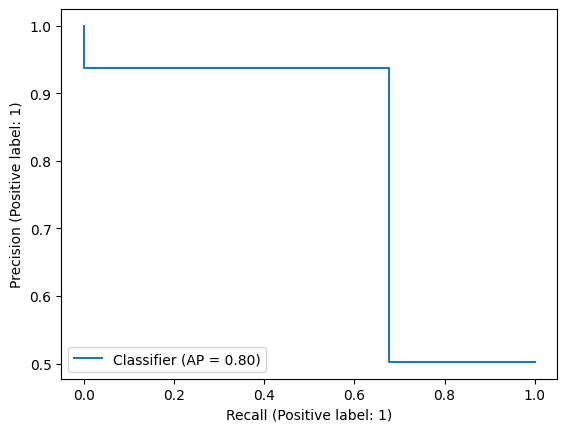

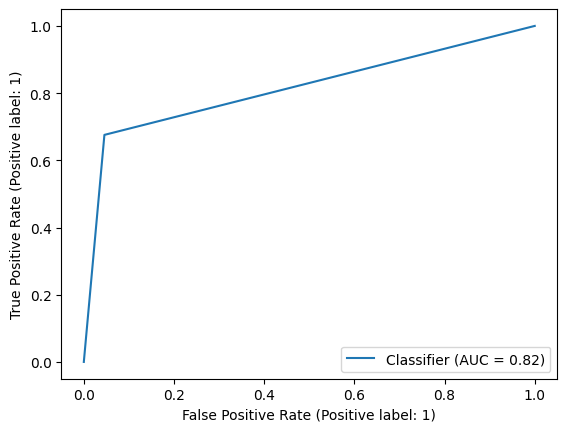

In [218]:
param_grid = {'alpha': np.linspace(0,1,5),
              'fit_intercept': [True,False],
              'positive': [True,False],
              'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

grid_ridge = RandomizedSearchCV(RidgeClassifier(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ridge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=SAMME, learning_rate=0.4, n_estimators=1000; total time=  42.9s
[CV] END algorithm=SAMME, learning_rate=0.4, n_estimators=1000; total time=  48.3s
[CV] END algorithm=SAMME, learning_rate=0.4, n_estimators=1000; total time=  48.3s
[CV] END algorithm=SAMME, learning_rate=0.4, n_estimators=1000; total time=  48.0s
[CV] END algorithm=SAMME, learning_rate=0.4, n_estimators=1000; total time=  48.3s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  29.7s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  29.0s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  28.9s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  29.2s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  29.1s
[CV] END algorithm=SAMME, learning_rate=0.7, n_estimators=500; total time=  24.6s
[CV] END algorithm=SAMME, learni

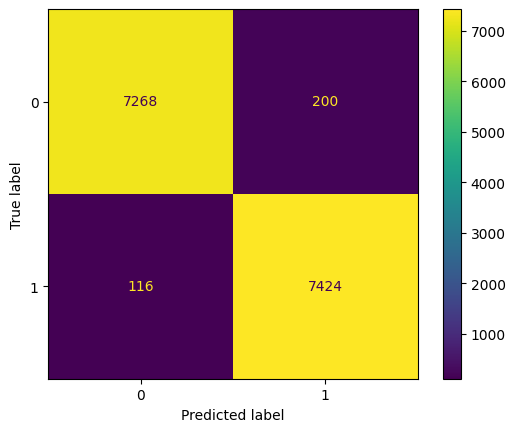

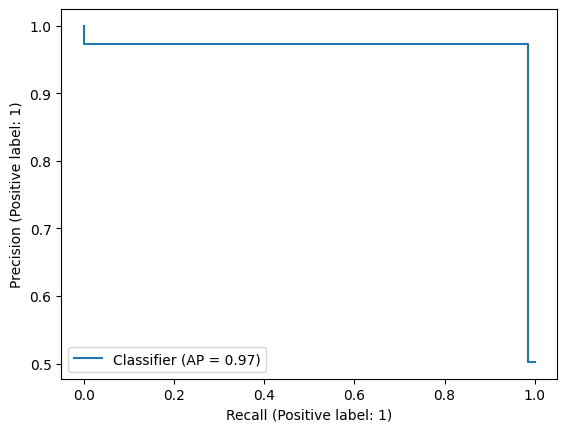

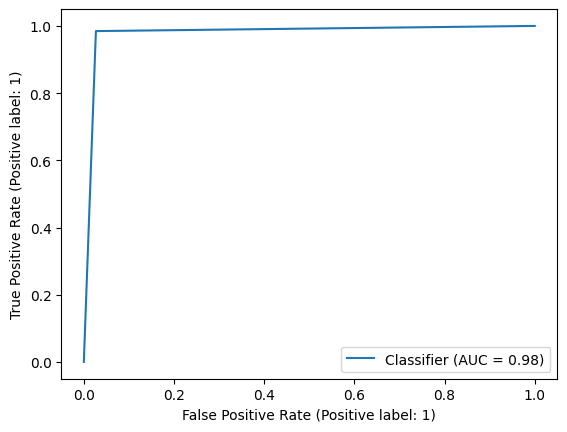

In [219]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'learning_rate': [0.1,0.4,0.7,1],
    'algorithm': ['SAMME','SAMME.R']
}

grid_ab = RandomizedSearchCV(AdaBoostClassifier(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ab)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END booster=dart, grow_policy=1, importance_type=weight, learning_rate=0.2, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, grow_policy=1, importance_type=weight, learning_rate=0.2, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, grow_policy=1, importance_type=weight, learning_rate=0.2, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, grow_policy=1, importance_type=weight, learning_rate=0.2, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, grow_policy=1, importance_type=weight, learning_rate=0.2, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, grow_policy=1, importance_type=total_gain, learning_rate=1, n_estimators=200, sampling_method=uniform;, score=nan tot

[CV 4/5] END booster=gblinear, grow_policy=0, importance_type=total_gain, learning_rate=0.2, n_estimators=200, sampling_method=uniform;, score=0.831 total time=   0.5s
[03:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "grow_policy", "sampling_method" } are not used.

[CV 5/5] END booster=gblinear, grow_policy=0, importance_type=total_gain, learning_rate=0.2, n_estimators=200, sampling_method=uniform;, score=0.825 total time=   0.5s
[CV 1/5] END booster=dart, grow_policy=1, importance_type=cover, learning_rate=0.8, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, grow_policy=1, importance_type=cover, learning_rate=0.8, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, grow_policy=1, importance_type=cover, learning_rate=0.8, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 4/5] END booster=dart,

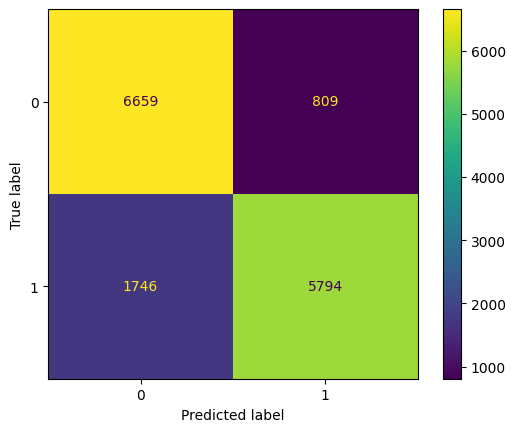

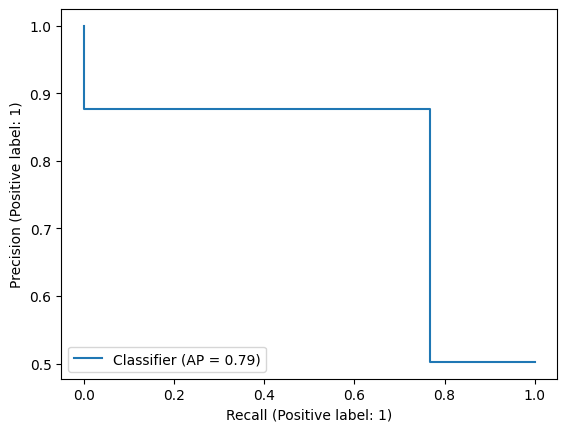

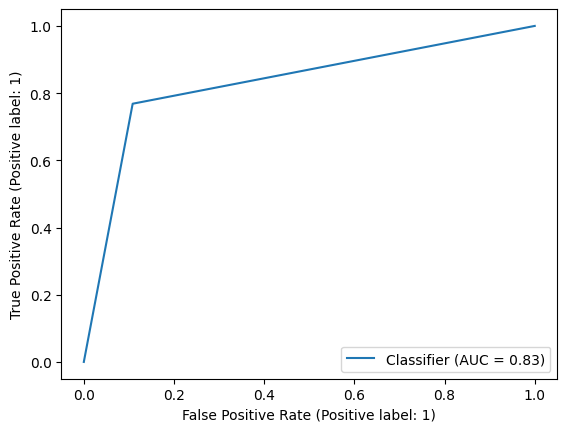

In [220]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'learning_rate': [0.2,0.5,0.8,1],
    'booster': ['gbtree','gblinear','dart'],
    'importance_type': ['gain','weight','cover','total_gain','total_cover'],
    'sampling_method': ['uniform','gradient_based'],
    'grow_policy': [0,1]
}

grid_xgb = RandomizedSearchCV(XGBClassifier(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_xgb)

## Optimized Models Performance Comparison

In [221]:
model_perfs = pd.DataFrame({'Model': models, 
                            'Accuracy': accuracy_scores, 
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0   <catboost.core.CatBoostClassifier object at 0x...  0.997934   0.997941   
1   RandomizedSearchCV(cv=5,\n                   e...  0.997801   0.997807   
2   XGBClassifier(base_score=None, booster=None, c...  0.997735   0.997740   
3   RandomizedSearchCV(cv=5, estimator=GradientBoo...  0.997735   0.997742   
4   (ExtraTreeClassifier(random_state=917412667), ...  0.997735   0.997734   
5   RandomizedSearchCV(estimator=ExtraTreesClassif...  0.997668   0.997666   
6   RandomizedSearchCV(cv=5, estimator=RandomFores...  0.997601   0.997609   
7   RandomizedSearchCV(estimator=LGBMClassifier(),...  0.997601   0.997607   
8   StackingClassifier(estimators=[('CAT',\n      ...  0.997535   0.997538   
9   VotingClassifier(estimators=[('CAT',\n        ...  0.997535   0.997537   
10                                   LGBMClassifier()  0.997468   0.997470   
11  RandomizedSearchCV(estimator=BaggingClassifier...  0.996735   0.996737   
12  RandomizedSearchCV(cv=5, estimator=KNeighborsC...  0.996469   0.996471   
13  (DecisionTreeClassifier(random_state=271472357...  0.996202   0.996202   
14                   HistGradientBoostingClassifier()  0.996135   0.996141   
15  (DecisionTreeClassifier(max_features='auto', r...  0.996069   0.996085   
16  RandomizedSearchCV(cv=5, estimator=HistGradien...  0.995936   0.995935   
17                           DecisionTreeClassifier()  0.995136   0.995134   
18  RandomizedSearchCV(cv=5, estimator=DecisionTre...  0.994670   0.994669   
19                                    MLPClassifier()  0.992804   0.992821   
20                             KNeighborsClassifier()  0.991671   0.991769   
21  RandomizedSearchCV(cv=5, estimator=AdaBoostCla...  0.978945   0.979029   
22  ([DecisionTreeRegressor(criterion='friedman_ms...  0.971015   0.971040   
23                                              SVC()  0.969816   0.969982   
24  (DecisionTreeClassifier(max_depth=1, random_st...  0.953958   0.953966   
25  XGBRFClassifier(base_score=None, booster=None,...  0.925573   0.926251   
26                                            NuSVC()  0.881930   0.889899   
27                               LogisticRegression()  0.829757   0.834873   
28  RandomizedSearchCV(cv=5, estimator=LogisticReg...  0.829757   0.834873   
29  RandomizedSearchCV(cv=5,\n                   e...  0.829757   0.834873   
30  RandomizedSearchCV(cv=5, estimator=LinearSVC()...  0.829424   0.836772   
31                                        LinearSVC()  0.829424   0.836477   
32  RandomizedSearchCV(cv=5, estimator=SVC(),\n   ...  0.827159   0.835204   
33                                    SGDClassifier()  0.815165   0.816954   
34                                  RidgeClassifier()  0.814432   0.841239   
35  RandomizedSearchCV(cv=5, estimator=RidgeClassi...  0.814366   0.840919   
36                      PassiveAggressiveClassifier()  0.799107   0.809109   
37                                       GaussianNB()  0.792977   0.805378   
38                                      BernoulliNB()  0.788713   0.807397   
39  RandomizedSearchCV(cv=5, estimator=BernoulliNB...  0.788713   0.807397   

      Recall        F1  
0   0.997930  0.997934  
1   0.997797  0.997801  
2   0.997731  0.997734  
3   0.997729  0.997734  
4   0.997735  0.997734  
5   0.997671  0.997668  
6   0.997596  0.997601  
7   0.997597  0.997601  
8   0.997532  0.997535  
9   0.997532  0.997535  
10  0.997466  0.997468  
11  0.996733  0.996735  
12  0.996482  0.996469  
13  0.996202  0.996202  
14  0.996131  0.996135  
15  0.996059  0.996069  
16  0.995936  0.995935  
17  0.995138  0.995136  
18  0.994670  0.994669  
19  0.992825  0.992804  
20  0.991711  0.991671  
21  0.978917  0.978942  
22  0.971002  0.971014  
23  0.969866  0.969815  
24  0.953974  0.953958  
25  0.925672  0.925554  
26  0.882274  0.881388  
27  0.830053  0.829190  
28  0.830053  0.829190  
29  0.830053  0.829190  
30  0.829778  0.828592  
31  0.829771  0.828626  
32  0.827530  0.826225  

In [222]:
best_model = model_perfs.iloc[0]['Model']
best_model

In [223]:
avg_cv_scores = cross_val_score(best_model,final_X_test,y_test,scoring='accuracy',cv=5,verbose=2)
mean_score = round(np.mean(avg_cv_scores),4)
print(f"Mean Cross Validation Performance of Extra Trees Classifier: {mean_score*100}%")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  15.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s


[CV] END .................................................... total time=  15.4s
[CV] END .................................................... total time=  15.9s
[CV] END .................................................... total time=  16.3s
[CV] END .................................................... total time=  16.0s
Mean Cross Validation Performance of Extra Trees Classifier: 99.57000000000001%


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


## Saving the best performing model for deployment into production

In [224]:
pipeline = Pipeline([
    ('transformer',transformer),
    ('scaler',scaler),
    ('model',best_model)
])
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Years_of_Working']),
                                                 ('sqrt_transform',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['Total_Children']),
                                                 ('power_transform',
                                                  PowerTransformer(),
                                                  ['Total_Income'])])),
                ('scaler', StandardScaler()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000020CEE1A3F70>)])

In [225]:
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']

In [226]:
joblib.load('pipeline.pkl')

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Years_of_Working']),
                                                 ('sqrt_transform',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['Total_Children']),
                                                 ('power_transform',
                                                  PowerTransformer(),
                                                  ['Total_Income'])])),
                ('scaler', StandardScaler()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000020CEE401690>)])

In [227]:
gc.collect()

12197

In [228]:
for col in final_X_train.columns:
    print(f"Minimum value of {col}:",df[col].min())
    print(f"Maximum value of {col}:",df[col].max())

Minimum value of Total_Good_Debt: 1
Maximum value of Total_Good_Debt: 61
Minimum value of Applicant_Gender_M: 0.0
Maximum value of Applicant_Gender_M: 1.0
Minimum value of Income_Type_Working: 0.0
Maximum value of Income_Type_Working: 1.0
Minimum value of Job_Title_Laborers: 0.0
Maximum value of Job_Title_Laborers: 1.0
Minimum value of Family_Status_Married: 0.0
Maximum value of Family_Status_Married: 1.0
Minimum value of Total_Income: 27000
Maximum value of Total_Income: 360000
Minimum value of Total_Children: 0.0
Maximum value of Total_Children: 2.5
Minimum value of Years_of_Working: 1.0
Maximum value of Years_of_Working: 20.5
Minimum value of Applicant_Age: 21
Maximum value of Applicant_Age: 68
Minimum value of Income_Type_State servant: 0.0
Maximum value of Income_Type_State servant: 1.0


In [230]:
final_X_train.columns

Index(['Total_Good_Debt', 'Applicant_Gender_M', 'Income_Type_Working',
       'Job_Title_Laborers', 'Family_Status_Married', 'Total_Income',
       'Total_Children', 'Years_of_Working', 'Applicant_Age',
       'Income_Type_State servant'],
      dtype='object')